In [1]:
import pandas as pd
import numpy as np
from open import Open_file
from gzip import open # NB: overrides standard open()
import pickle as pkl
import pandas as pd
import warnings 
from glob import glob
import os
from npls import npls
from signal_noise import signal_noise
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc,  time
import psutil
import threading



In [2]:
# import importlib
# import sys
# importlib.reload(sys.modules['box_training_algorithm'])
from box_training_algorithm import Box_training_algorithm as box
from box_training_algorithm import Box_training_algorithm_pls as box_pls

In [15]:
nodel=box(file_name='marat',number_of_components=[i for i in range(1,5)],l2_coefs=np.array([0]),
            # number_of_column=k,snr=91.7332,norm_func=['evklid'])
            number_of_column=0,snr=-100,norm_func=['evklid'])
nodel.calc()
nodel.best_params()
resp=nodel.return_resoults()

Q2_CV marat 0 -904944001.8274869 1 -inf
RMSE_CV  5071.1220160541125
RMSE_P  218.87997203284272
Q2_P  -1751106.7312808137





/home/ferubkomsu/Рабочий стол/new_n_pls/box_training_algorithm.py:251: RuntimeWarning: divide by zero encountered in log10
  self.number_of_components[i],np.log10([self.l2_coefs[j]])[0])


In [3]:
nodel=box_pls(file_name='marat',number_of_components=[i for i in range(1,5)]
            # number_of_column=k,snr=91.7332,norm_func=['evklid'])
            )
nodel.calc()
nodel.best_params()
resp=nodel.return_resoults()

Q2_CV marat 0 0.554385195817755 3
RMSE_CV  0.10981447805402389
RMSE_P  0.07760048344634707
Q2_P  0.7798951206785082





In [22]:
resp[0].shape

(4, 1)

In [3]:
from paint_scripts.rmse_plot import Rmse_Plot_new as pl
from paint_scripts.rmse_plot import Rmse_Plot_pls as pl_pls

In [7]:
def fir(st,resp_without,k):
    print(st,k,"Q2P=",resp_without[0]," rmsep=",resp_without[1])
    print("rmsecv=",min(((resp_without[2].cv_results_[ "mean_test_mse" ])**0.5)/resp_without[5]))
    print("q2cv= ",max(resp_without[2].cv_results_[ "mean_test_r2" ]))
    for i in range(len(resp_without[2].cv_results_[ "mean_test_r2" ])):
        if resp_without[2].cv_results_[ "mean_test_r2" ][i]==max(resp_without[2].cv_results_[ "mean_test_r2" ]):
            print(i+1)
            break
    print("n_comp=")

In [5]:
model_without=
resp_without=model_without.main()

ValueError: 
All the 270 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ferubkomsu/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ferubkomsu/.local/lib/python3.10/site-packages/npls/npls.py", line 89, in fit
    response=self.check_smooth_loadings(w_i=w_i[:,0],excitation_wavelenth=self.excitation_wavelenth,
  File "/home/ferubkomsu/.local/lib/python3.10/site-packages/npls/npls.py", line 27, in check_smooth_loadings
    for j in range(len(resp_emission[self.crash_norm_name])):
TypeError: unhashable type: 'list'


In [4]:
l2_1=[1,-5,-5]
l2_2=[-5,1,-5]
n_2=[2,2,3]
n_1=[3,3,4]

In [4]:
def monitor():
    # Пороговое значение для загрузки процессора (в процентах)
    threshold = 93

    while True:
        # Получаем текущую загрузку процессора
        cpu_percent = psutil.cpu_percent(interval=None)

        # Если текущая загрузка процессора превышает пороговое значение
        if cpu_percent > threshold:
            print("High CPU load detected. Cooling down...")
            time.sleep(40)
            print("Resuming execution.")

        # Пауза перед следующей проверкой
        time.sleep(29)

In [5]:
def calculate():
        for k in range(3):
                print(k)
                nodel1=box(file_name='marat',number_of_components=[i for i in range(1,11)],l2_coefs=np.array([10**l2_1[k]]),
                        # number_of_column=k,snr=91.7332,norm_func=['evklid'])
                        number_of_column=k,snr=-100,norm_func=['evklid'])
                nodel1.calc()
                nodel1.best_params()
                resp1=nodel1.return_resoults()

                nodel2=box(file_name='marat',number_of_components=[i for i in range(1,11)],l2_coefs=np.array([10**l2_2[k]]),
                        number_of_column=k,snr=91.7332,norm_func=['evklid'])
                        # number_of_column=k,snr=-100,norm_func=['evklid'])
                nodel2.calc()
                nodel2.best_params()
                resp2=nodel2.return_resoults()

                paint=pl()
                paint.main(l21=l2_1[k],l22=l2_2[k],snr=91.7332,rmse_l2=resp1[1],rmse_l2_snr=resp2[1],
                                n_comp=np.array([i for i in range(1,11)]),data_set_name="marat_",fluorophore_name=str(k),
                                save=True)
    
    
    
    

In [4]:
def calculate_pls_():
        for k in range(1,30):
                print(k)
                nodel1=box_pls(file_name='marat',number_of_components=[i for i in range(1,11)],
                               number_of_column=0)
                nodel1.calc(random=10*k)
                nodel1.best_params()
                resp1=nodel1.return_resoults()

In [5]:
def calculate_pls():
        # for k in range(3):
        #         print(k)
        #         nodel1=box_pls(file_name='marat',number_of_components=[i for i in range(1,11)],
        #                        number_of_column=k)
        #         nodel1.calc(random=40)
        #         nodel1.best_params()
        #         resp1=nodel1.return_resoults()

        #         paint=pl_pls()
        #         paint.main(rmse=resp1[1], q2=resp1[3],
        #                         n_comp=np.array([i for i in range(1,11)]),data_set_name="marat_",fluorophore_name=str(k),
        #                         save=True)
        for k in range(6):
                print(k)
                nodel1=box_pls(file_name='asmund',number_of_components=[i for i in range(1,11)],
                               number_of_column=k)
                nodel1.calc(random=40)
                nodel1.best_params()
                resp1=nodel1.return_resoults()

                paint=pl_pls()
                paint.main(rmse=resp1[1], q2=resp1[3],
                                n_comp=np.array([i for i in range(1,11)]),data_set_name="asmund_",fluorophore_name=str(k),
                                save=True)
        for k in range(4):
                print(k)
                nodel1=box_pls(file_name='dorrit',number_of_components=[i for i in range(1,11)],
                               number_of_column=k)
                nodel1.calc(random=40)
                nodel1.best_params()
                resp1=nodel1.return_resoults()

                paint=pl_pls()
                paint.main(rmse=resp1[1], q2=resp1[3],
                                n_comp=np.array([i for i in range(1,11)]),data_set_name="dorrit_",fluorophore_name=str(k),
                                save=True)
        for k in range(4):
                print(k)
                nodel1=box_pls(file_name='syn',number_of_components=[i for i in range(1,11)],
                               number_of_column=k)
                nodel1.calc(random=40)
                nodel1.best_params()
                resp1=nodel1.return_resoults()

                paint=pl_pls()
                paint.main(rmse=resp1[1], q2=resp1[3],
                                n_comp=np.array([i for i in range(1,11)]),data_set_name="syn_",fluorophore_name=str(k),
                                save=True)

0
High CPU load detected. Cooling down...
Q2_CV asmund 0 0.9882301935466365 10
RMSE_CV  0.03601869701472516
RMSE_P  0.09931478040953527
Q2_P  0.9343291221941915





/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:232: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:233: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:276: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


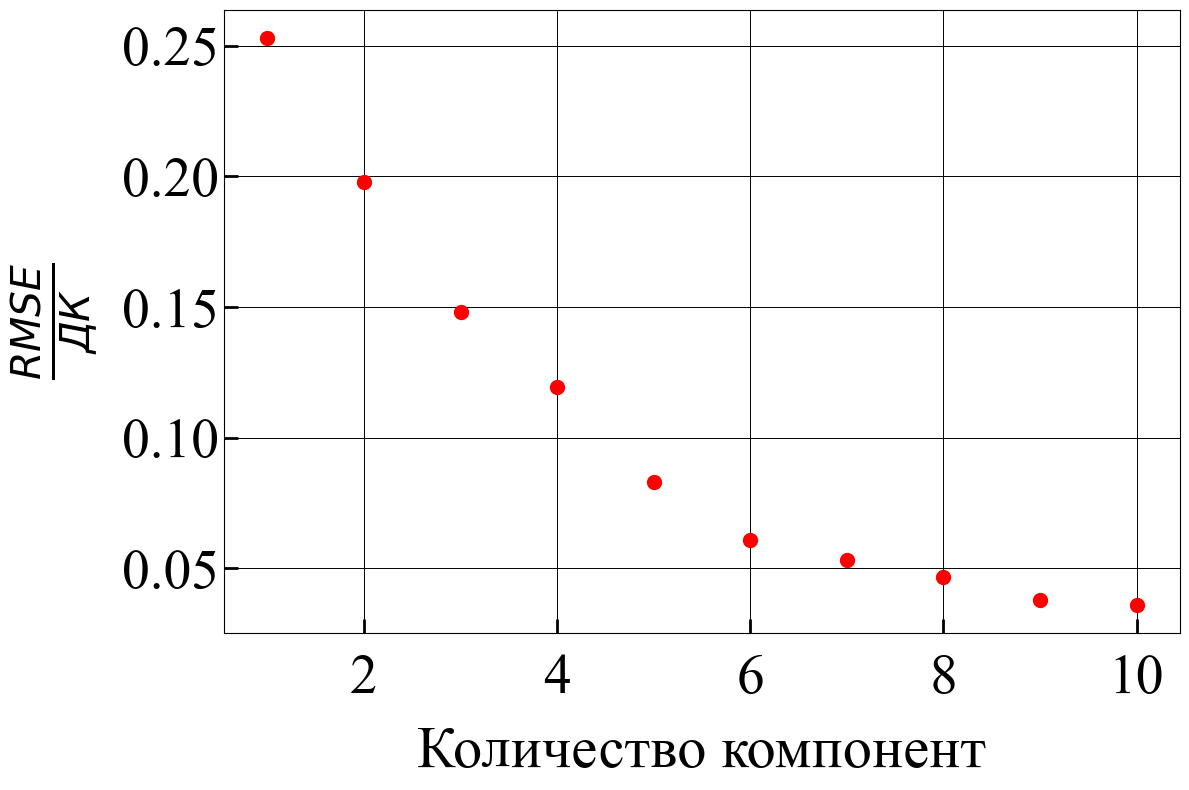

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:232: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:233: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:276: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


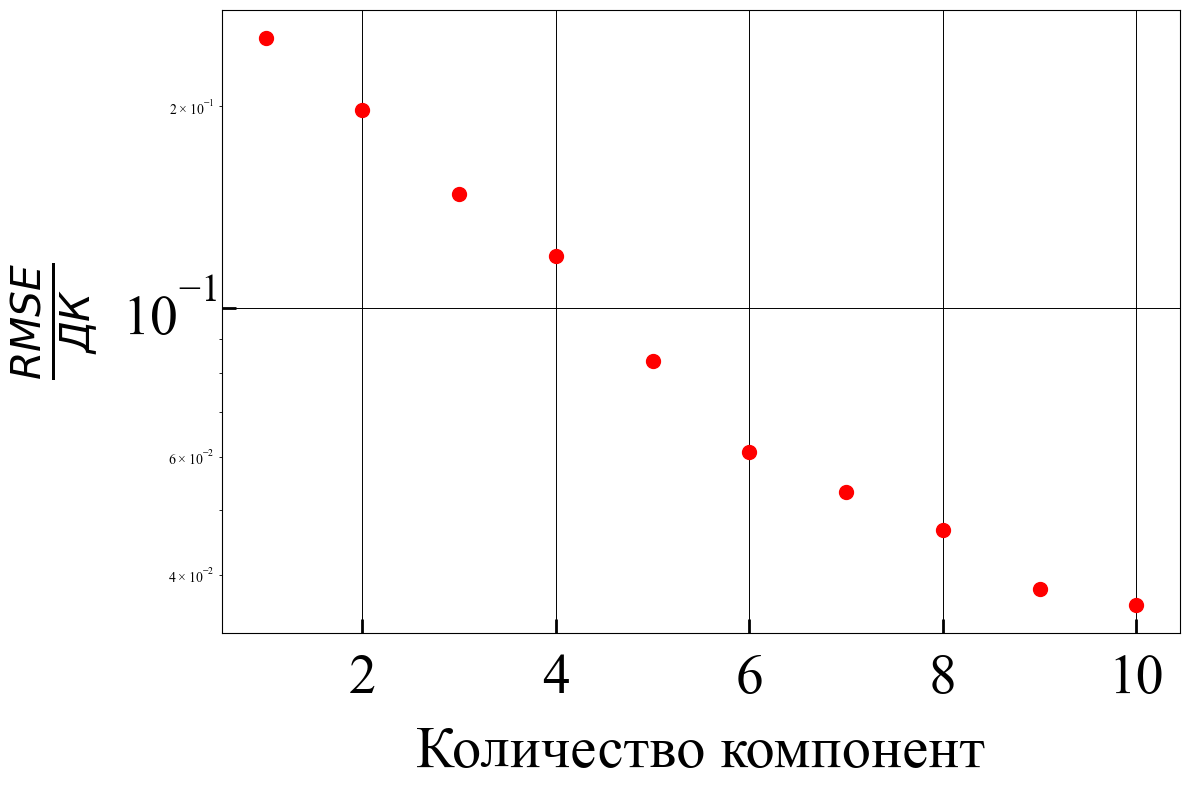

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:261: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:262: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:296: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


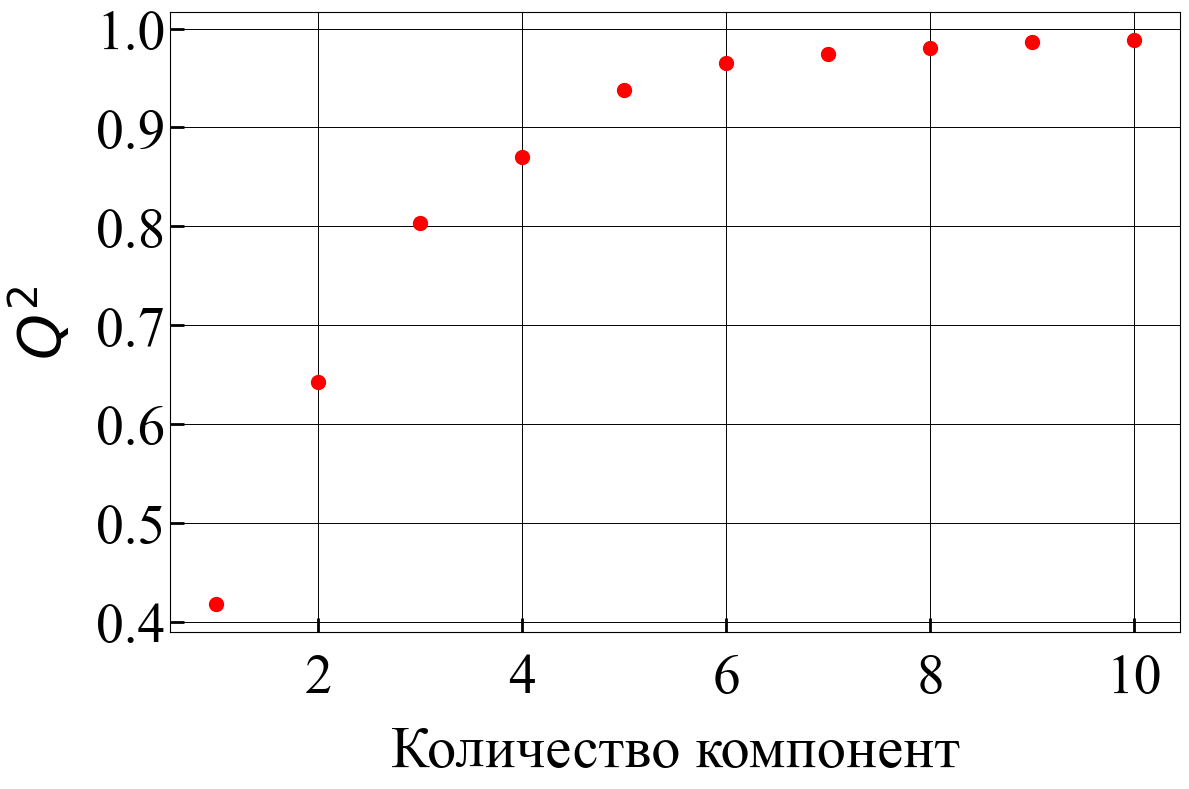

1
Resuming execution.
Q2_CV asmund 1 0.9580397782951633 8
RMSE_CV  0.06519329287416101
RMSE_P  0.03729084678121959
Q2_P  0.988252725638258





/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:232: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:233: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:276: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


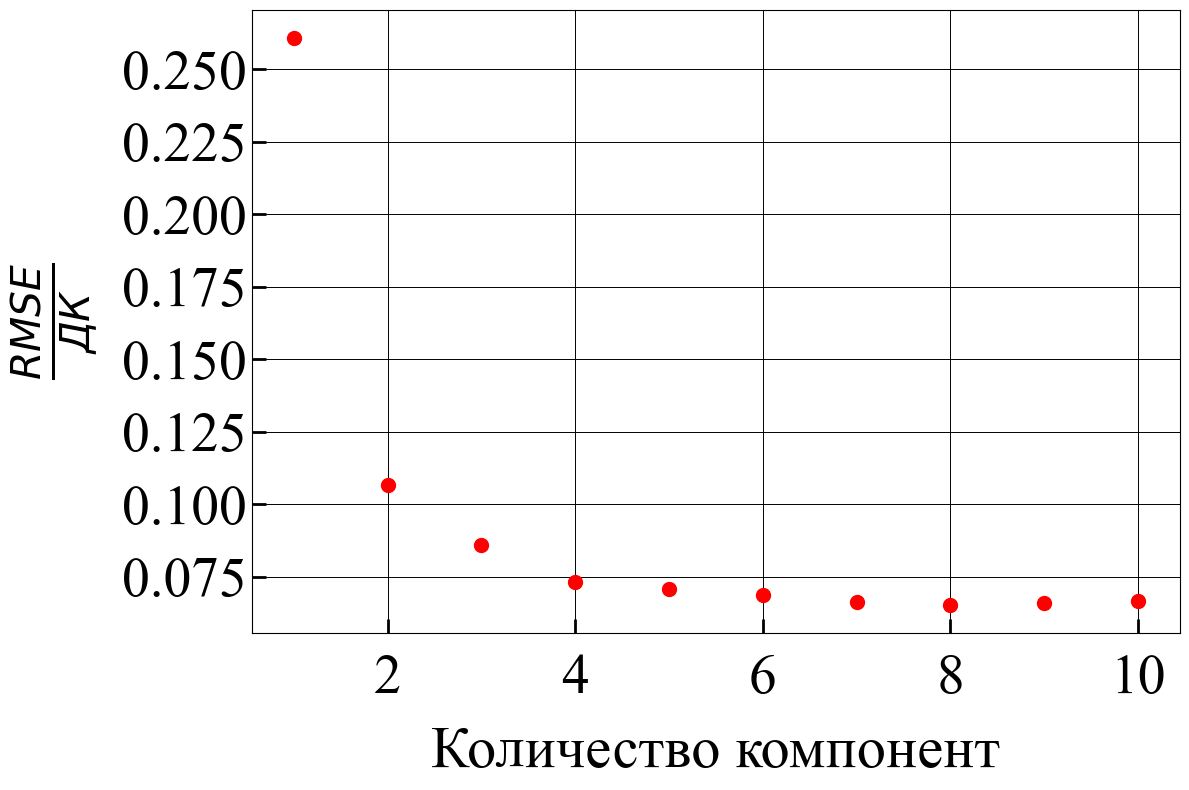

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:232: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:233: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:276: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


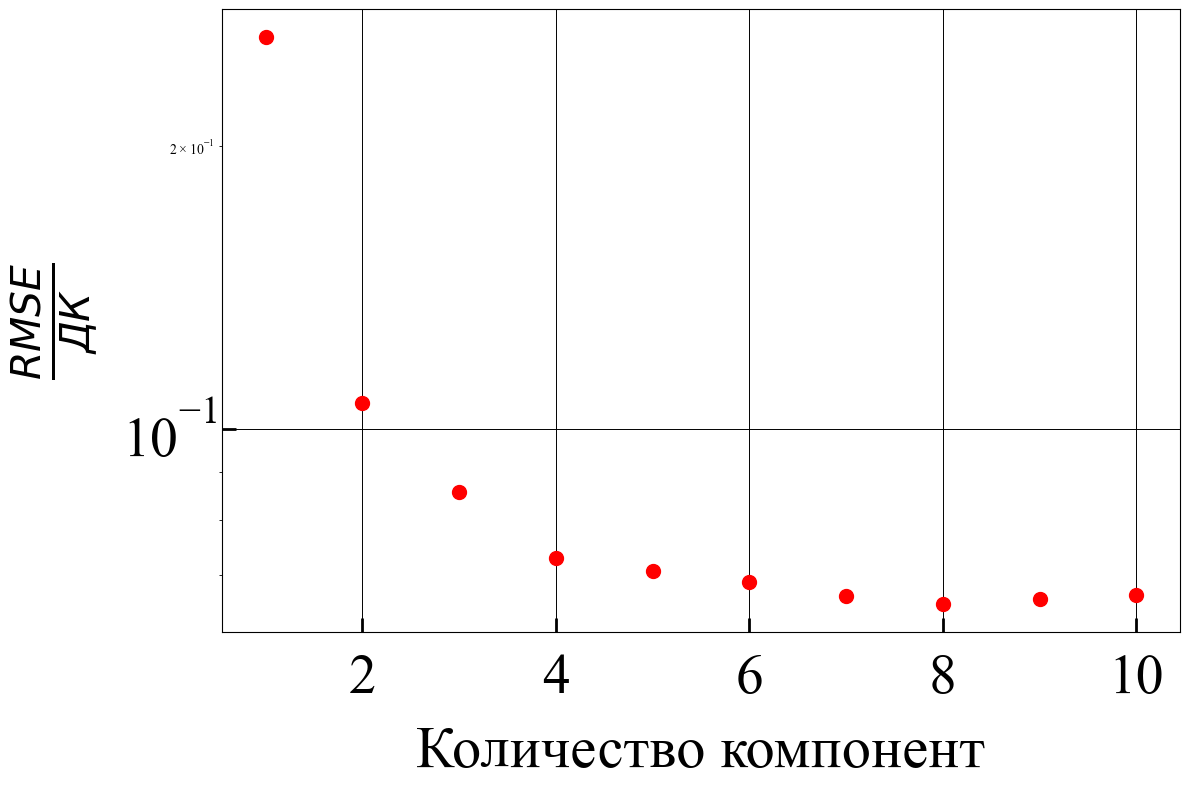

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:261: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:262: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:296: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


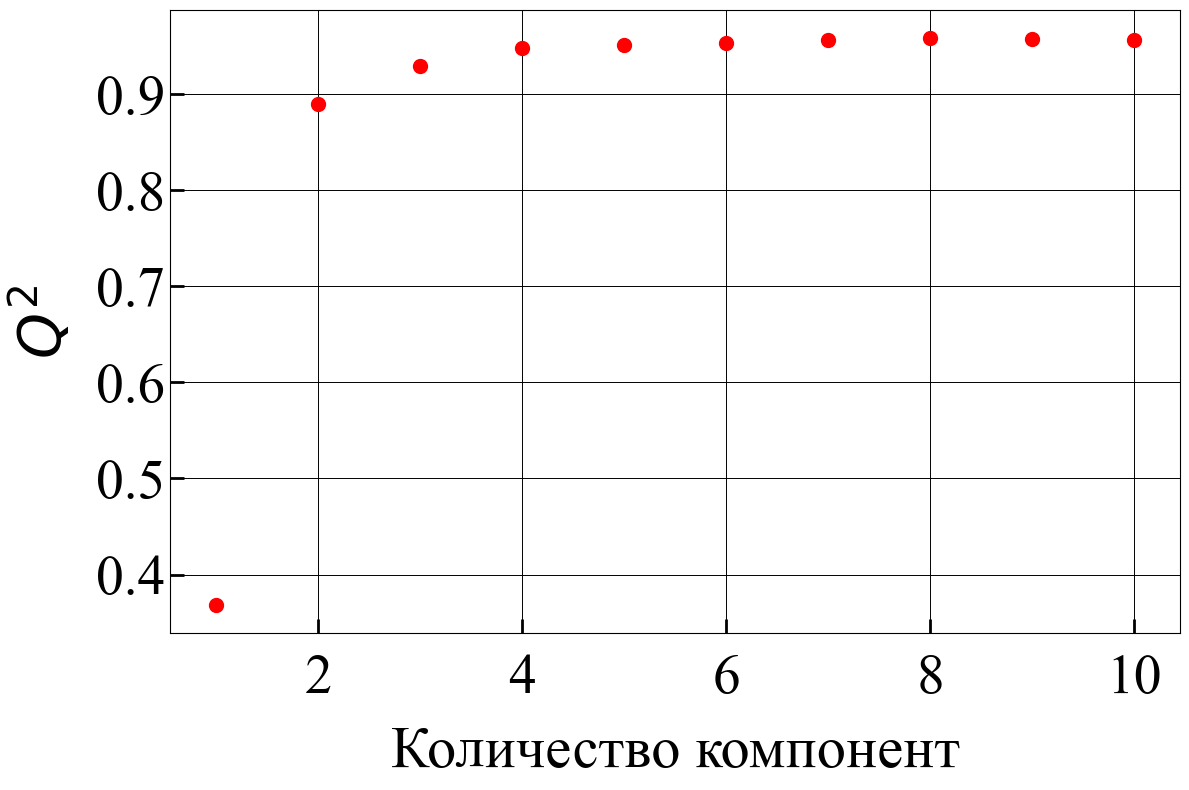

2
High CPU load detected. Cooling down...
Resuming execution.
Q2_CV asmund 2 0.9871084191148355 10
RMSE_CV  0.036849786311881294
RMSE_P  0.08229911990165308
Q2_P  0.9295408077048335





/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:232: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:233: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:276: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


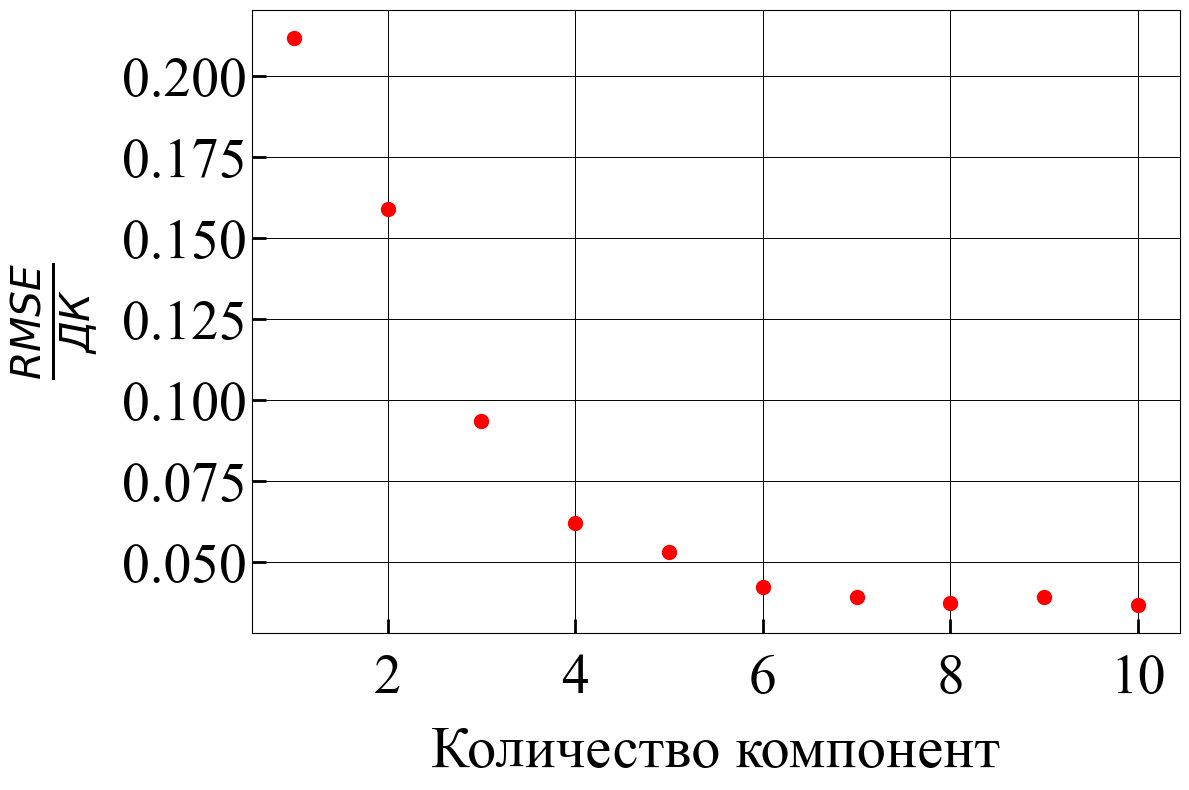

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:232: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:233: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:276: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


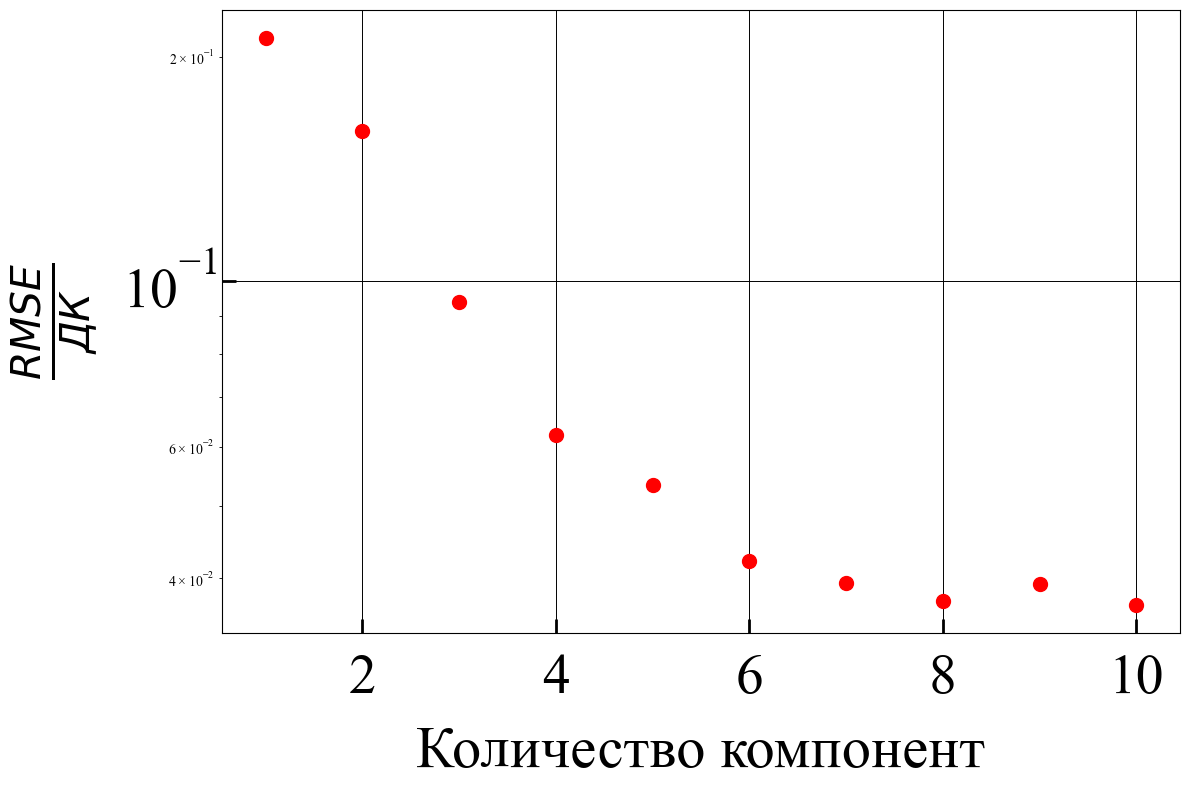

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:261: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:262: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:296: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


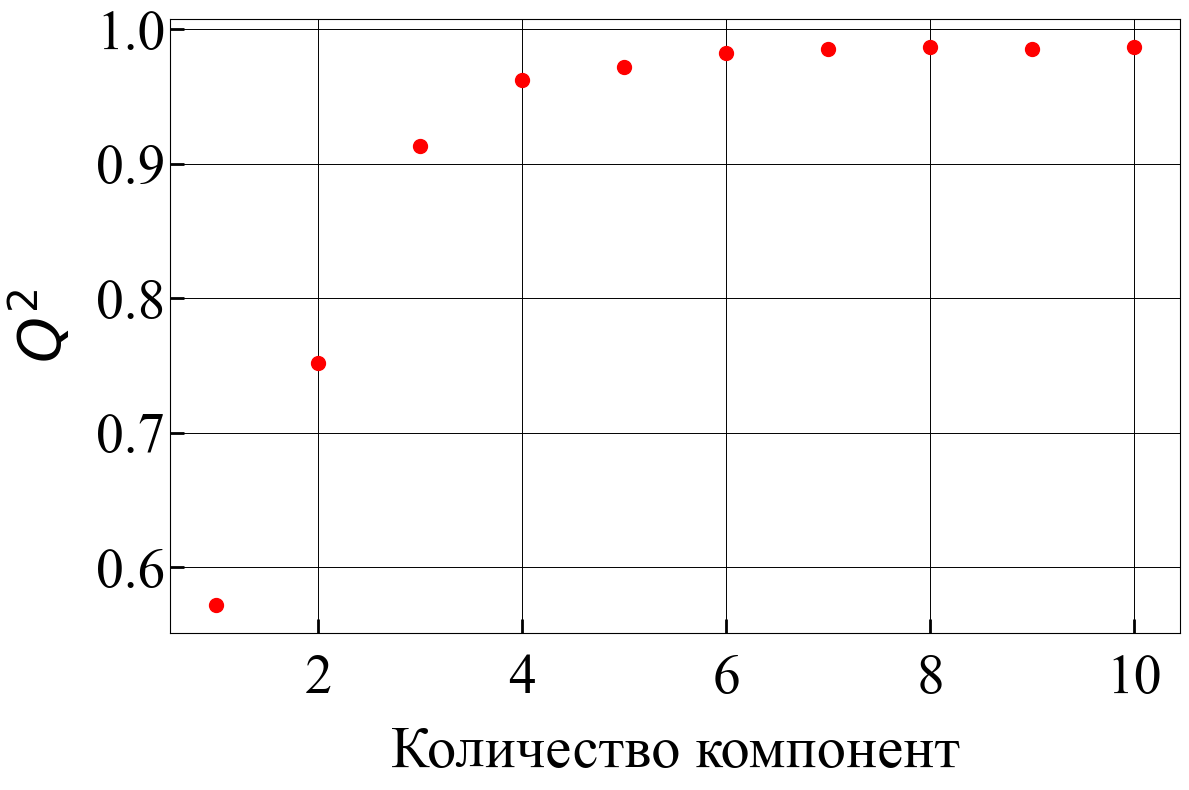

3
High CPU load detected. Cooling down...
Q2_CV asmund 3 0.8436291919466159 10
RMSE_CV  0.044849040756297996
RMSE_P  0.04328111598934148
Q2_P  0.9572045512779936





/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:232: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:233: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:276: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


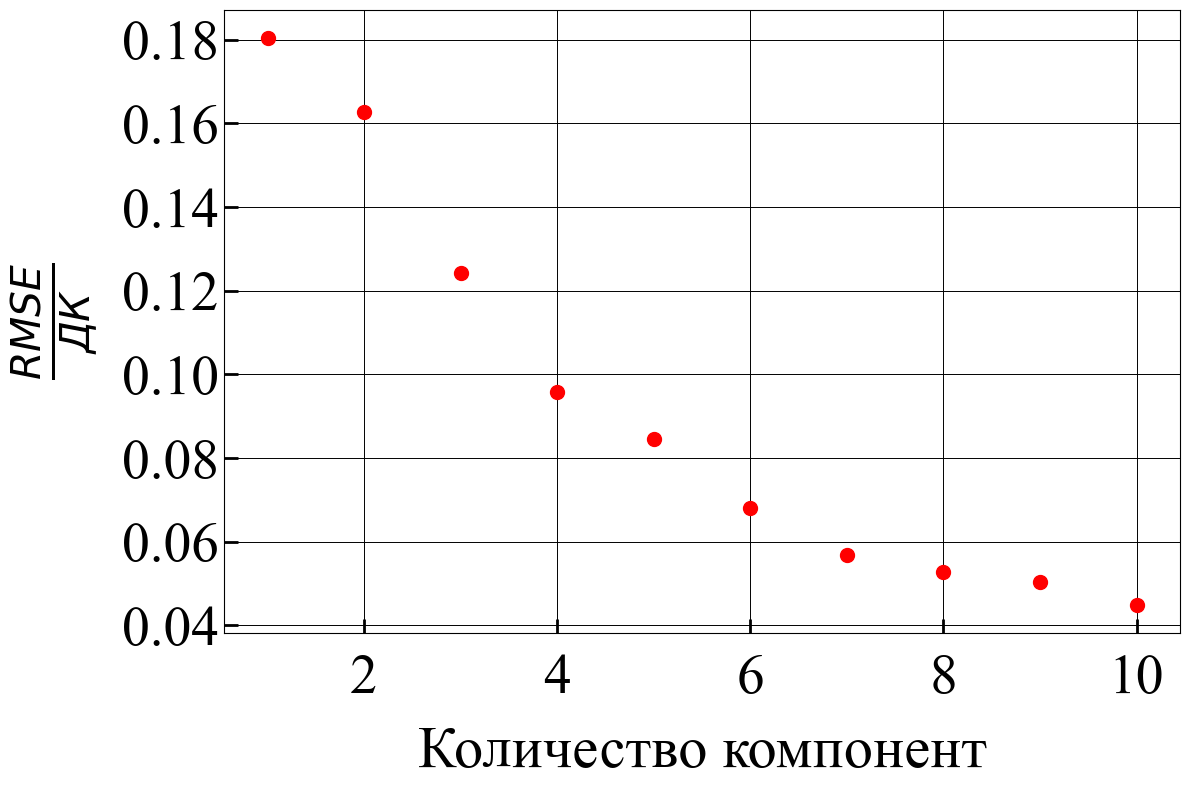

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:232: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:233: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:276: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


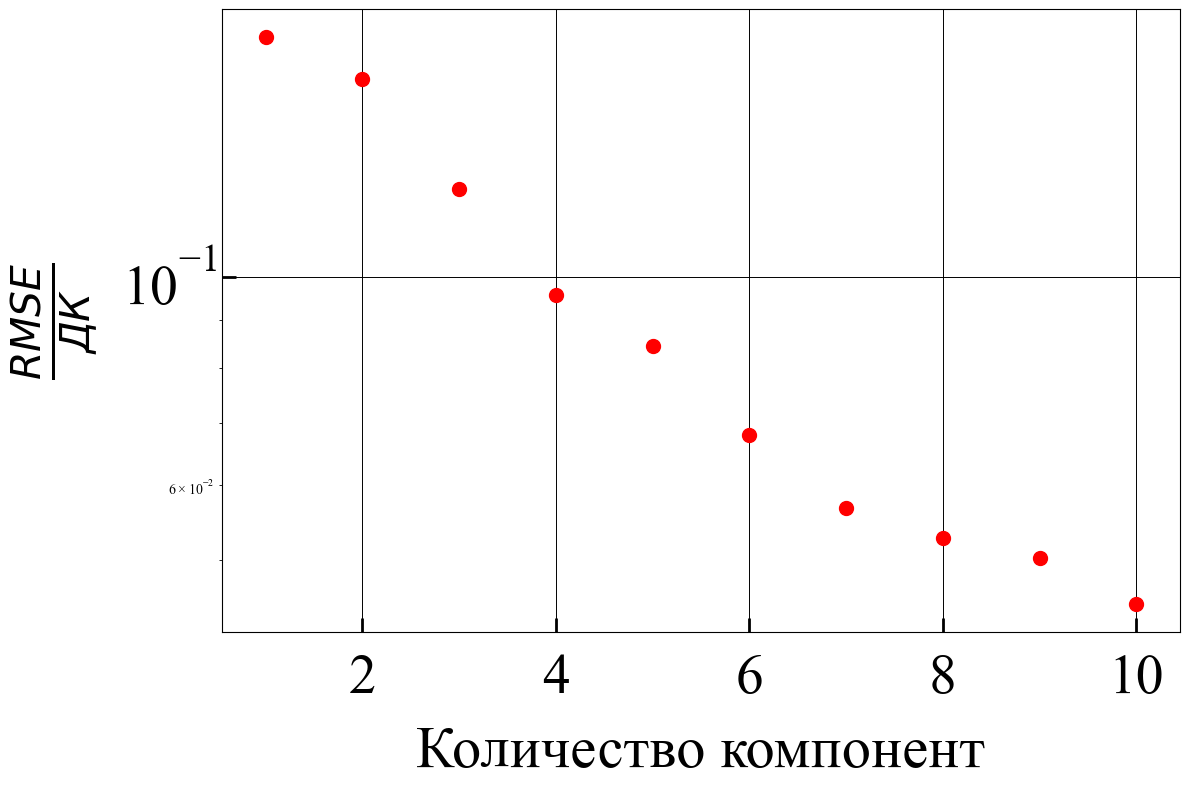

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:261: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:262: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:296: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


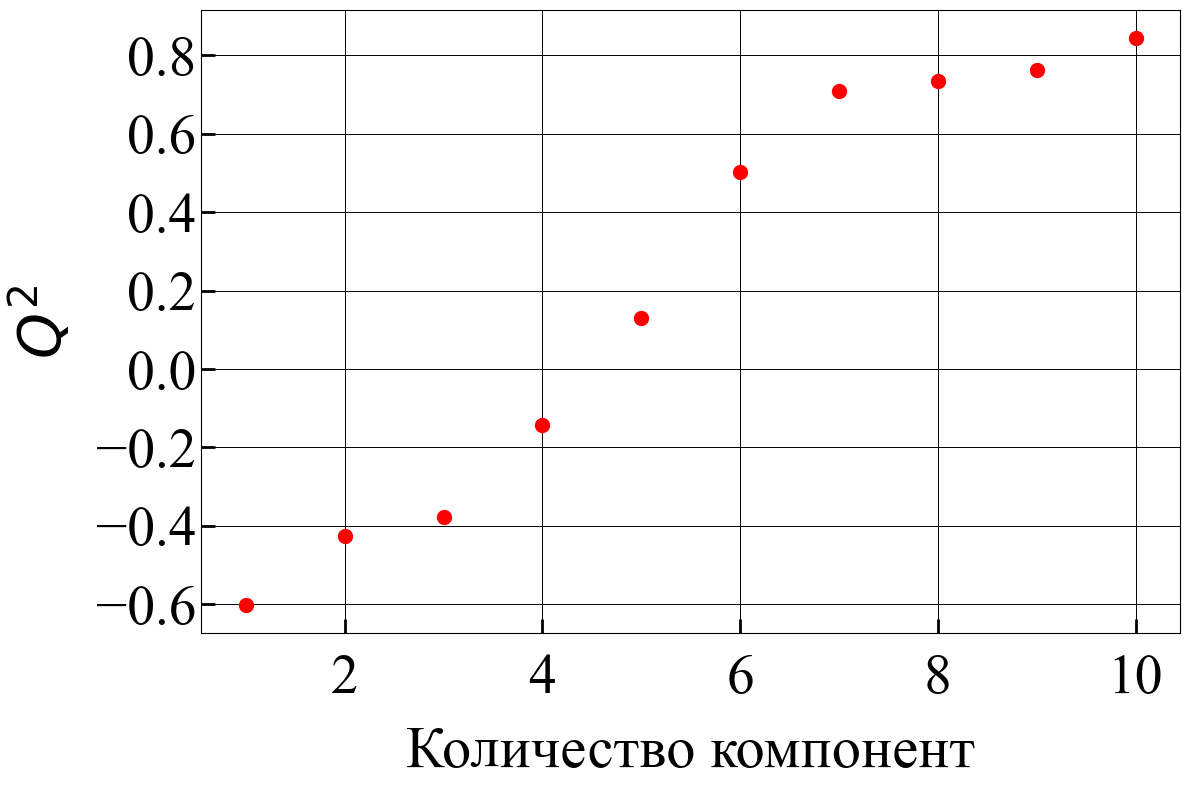

4
Resuming execution.
High CPU load detected. Cooling down...
Q2_CV asmund 4 0.9943069526885568 10
RMSE_CV  0.02153221852747443
RMSE_P  0.02165120834923971
Q2_P  0.9965181367809323





/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:232: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:233: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:276: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


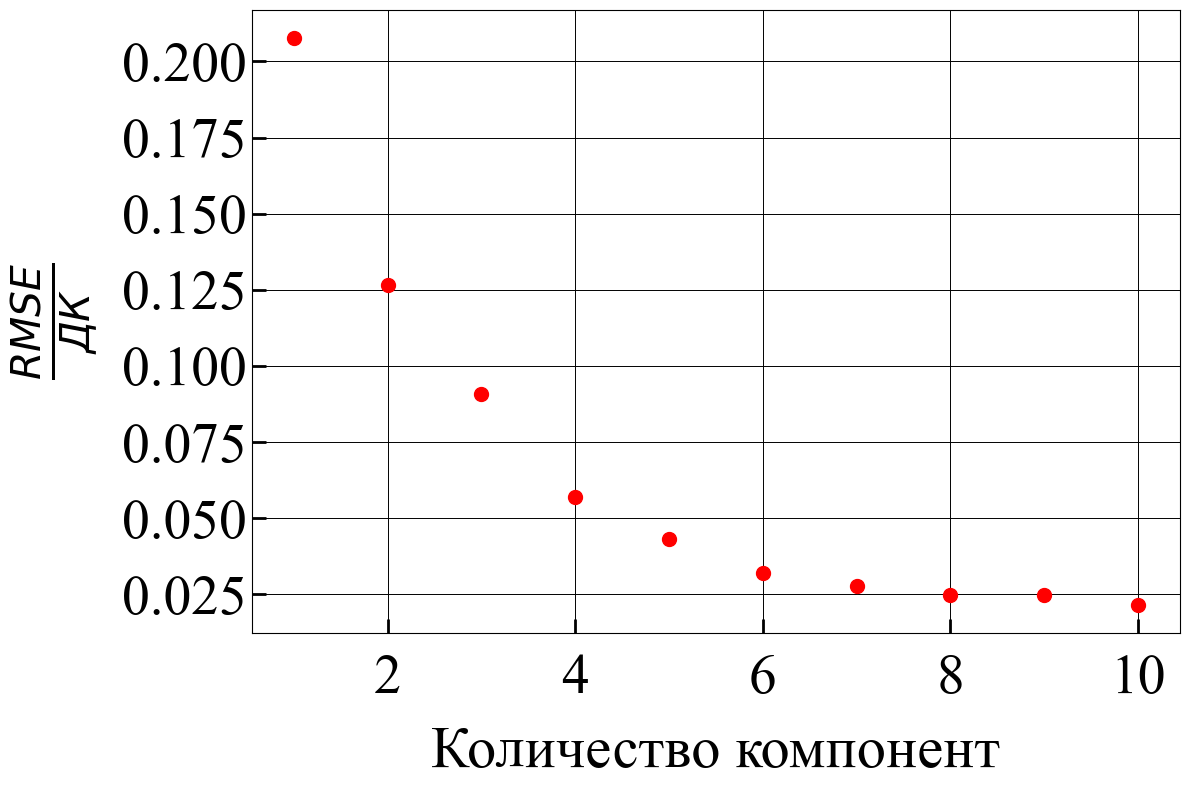

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:232: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:233: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:276: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


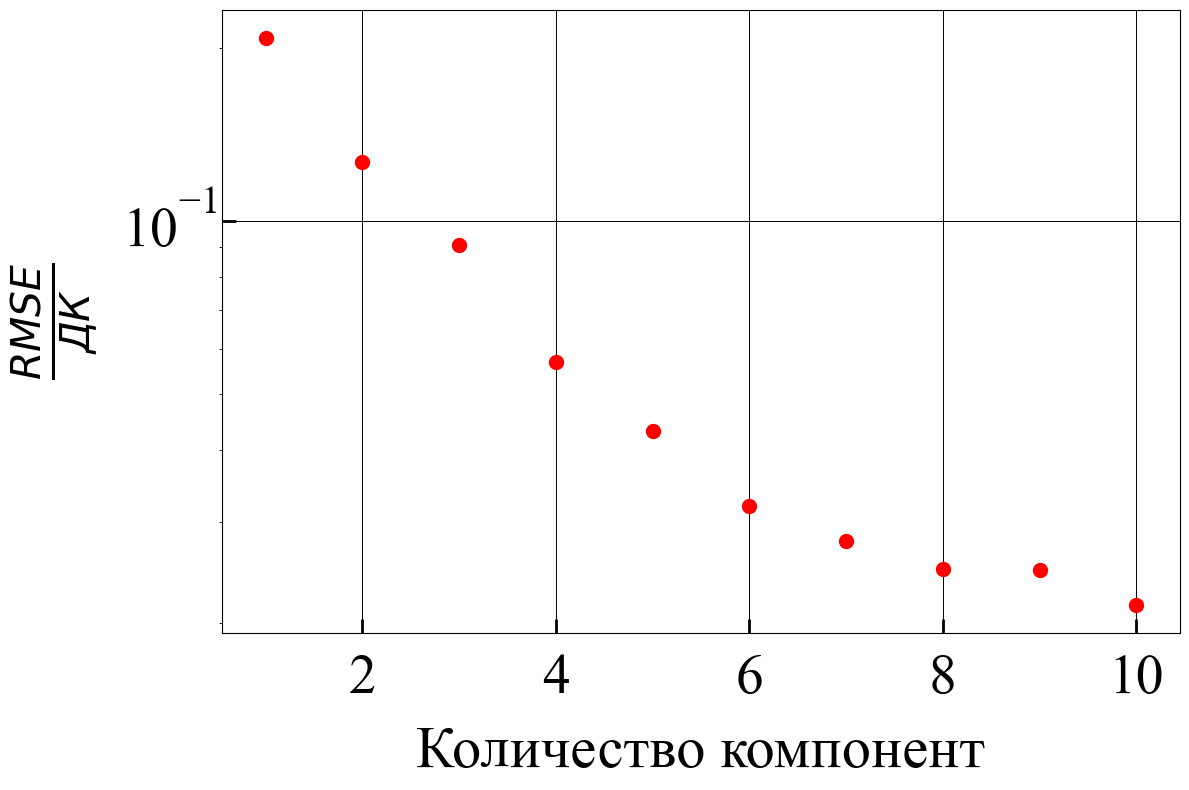

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:261: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:262: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:296: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


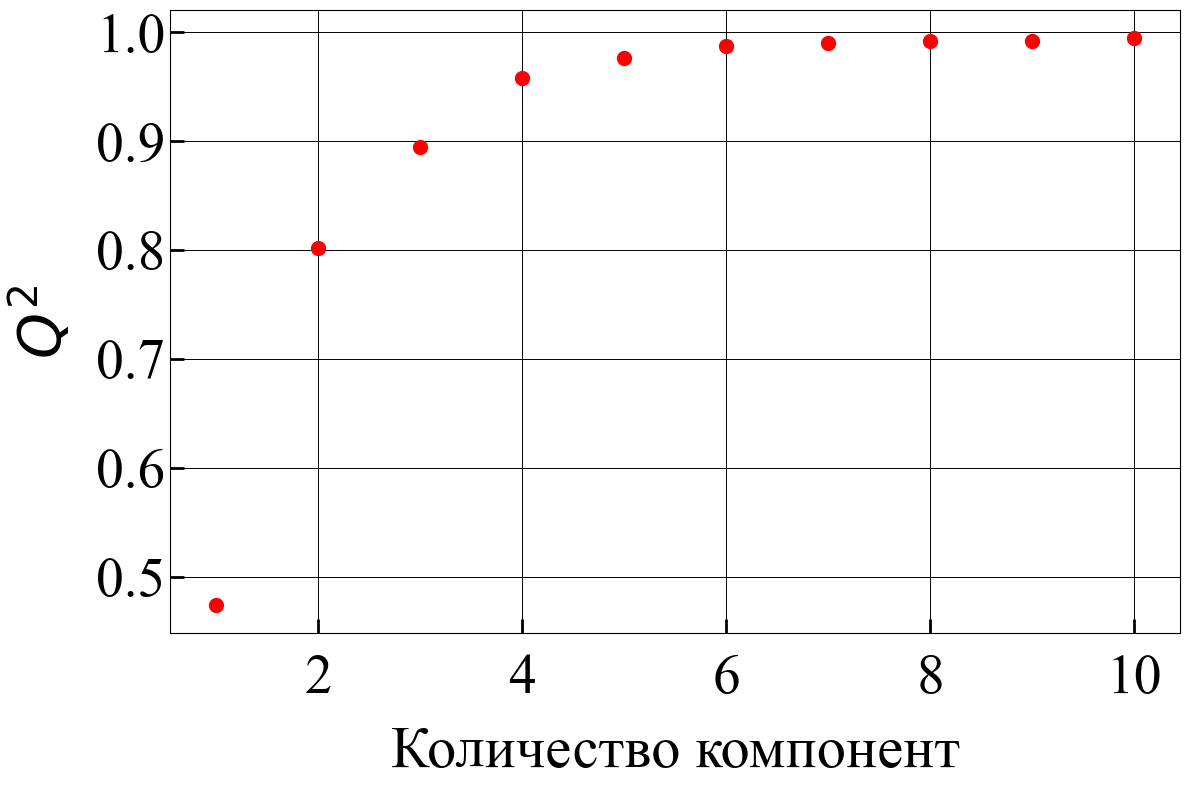

5
Resuming execution.
Q2_CV asmund 5 0.9704316472348729 10
RMSE_CV  0.05983018185972608
RMSE_P  0.05277596411237282
Q2_P  0.9788013997361185





/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:232: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:233: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:276: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


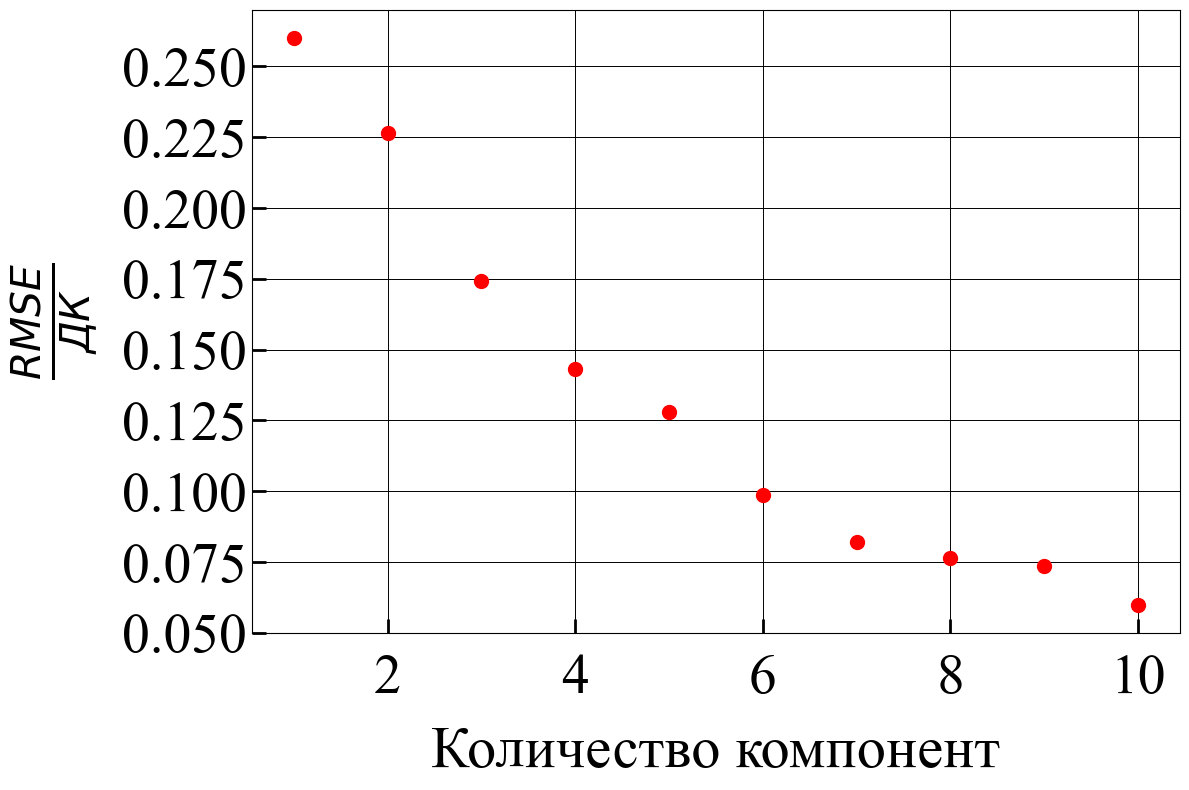

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:232: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:233: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:276: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


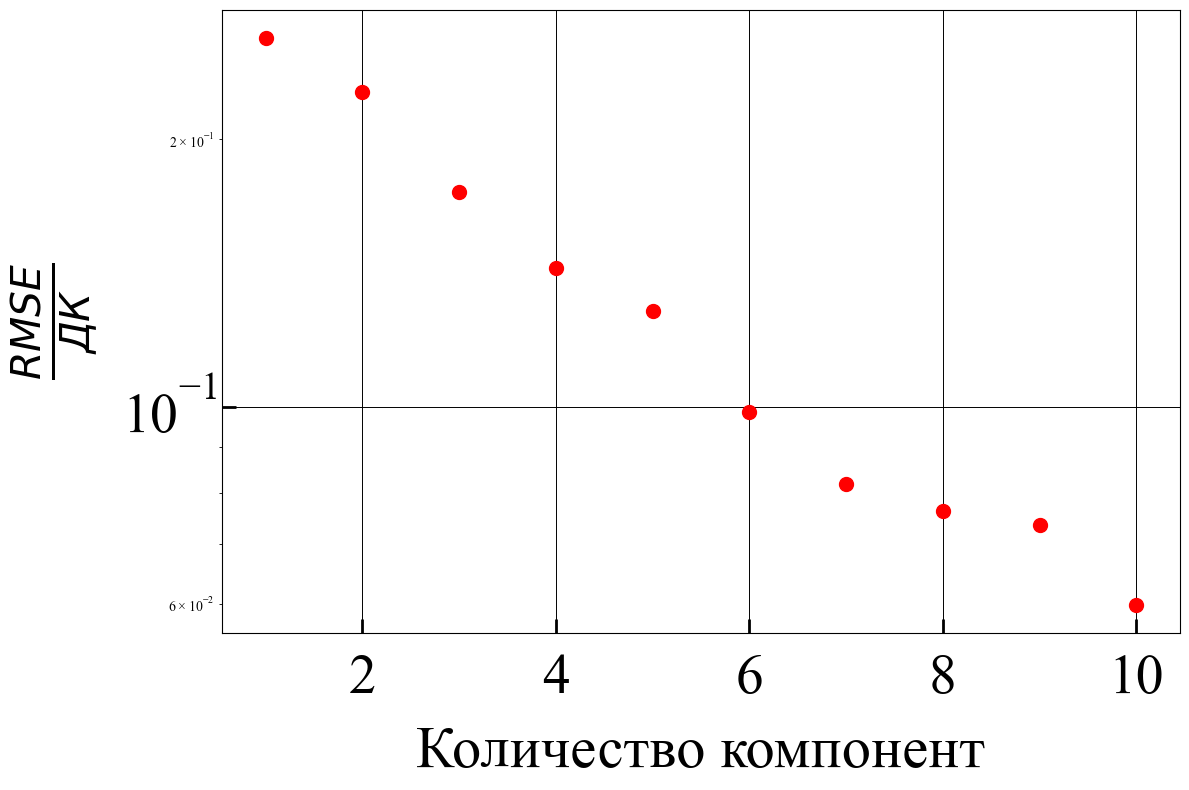

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:261: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:262: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:296: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


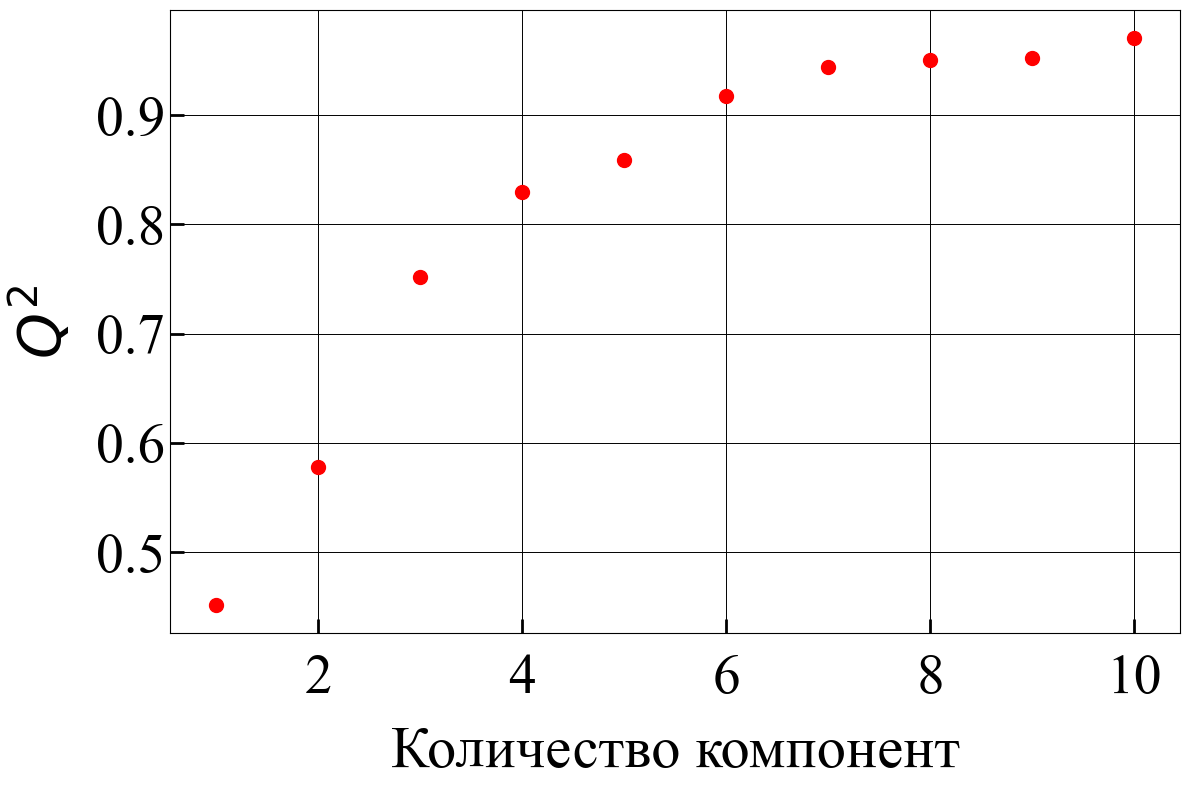

0
Q2_CV dorrit 0 -7.0623547727768035 8
RMSE_CV  0.05137471887798873
RMSE_P  0.011421699569345408
Q2_P  0.9256822893251478





/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:232: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:233: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:276: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


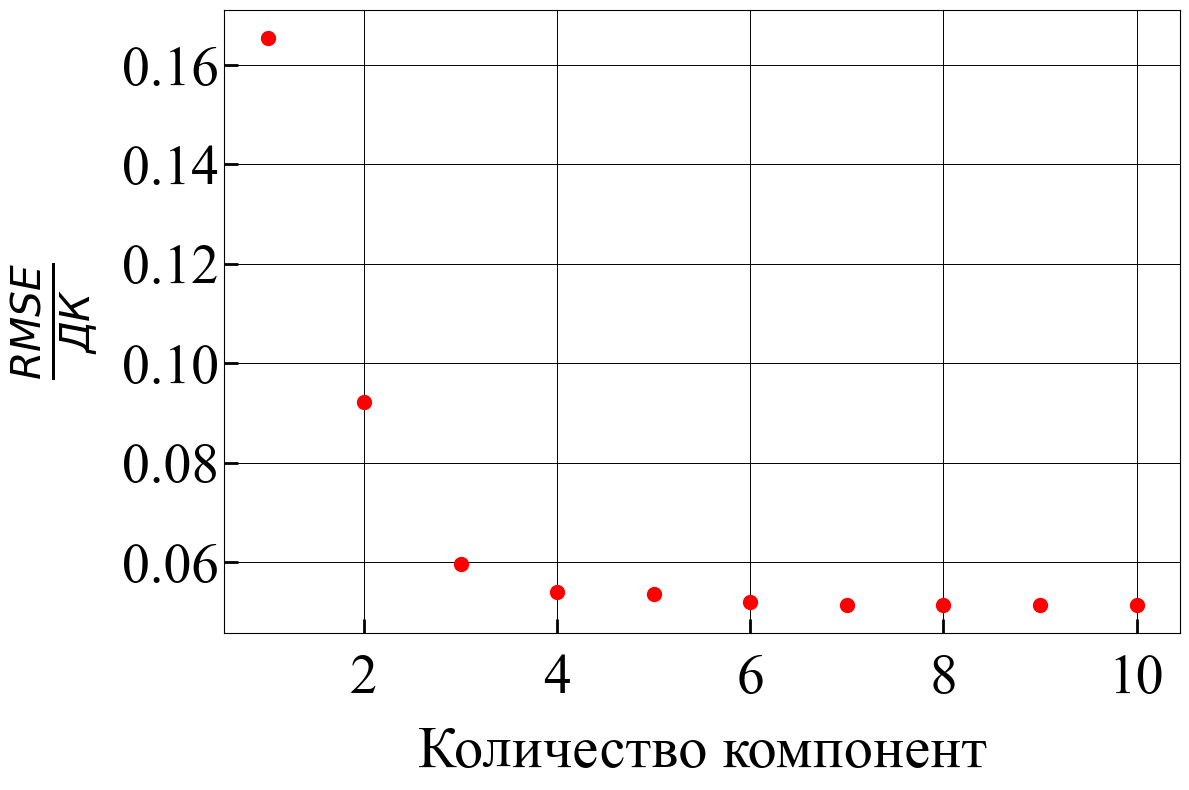

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:232: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:233: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:276: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


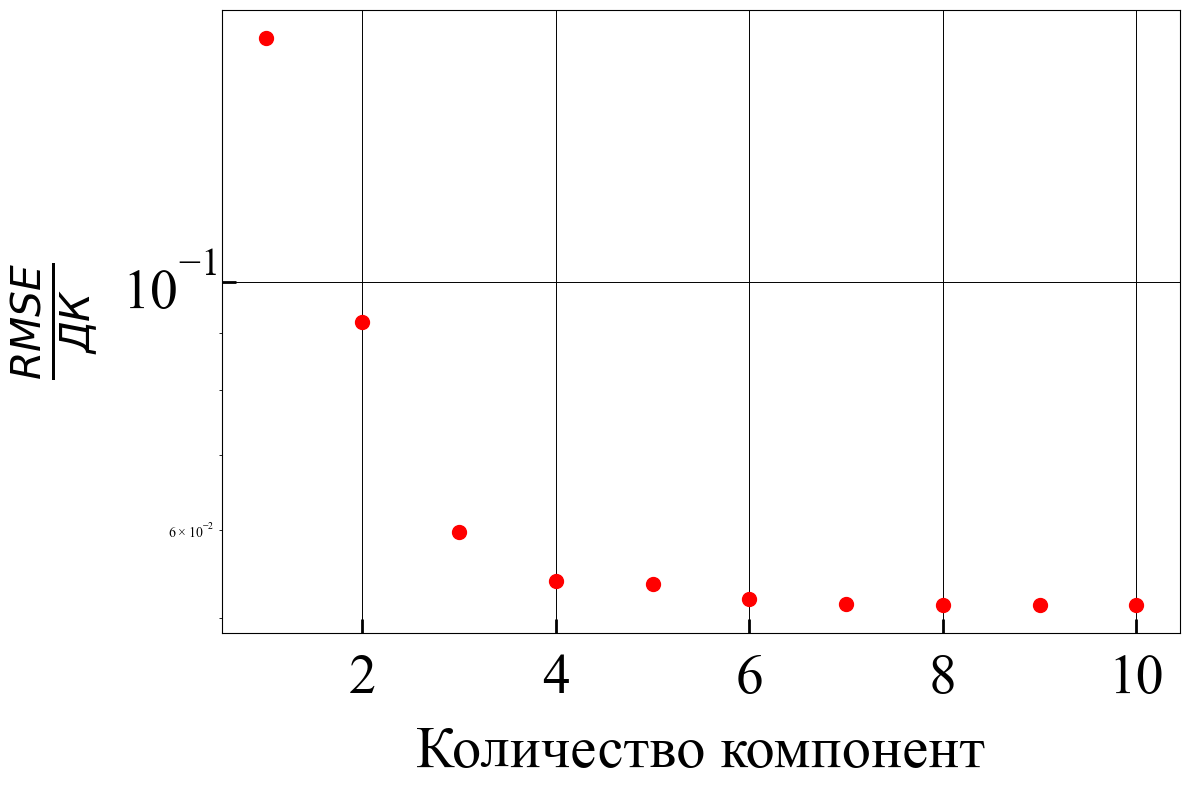

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:261: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:262: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:296: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


High CPU load detected. Cooling down...


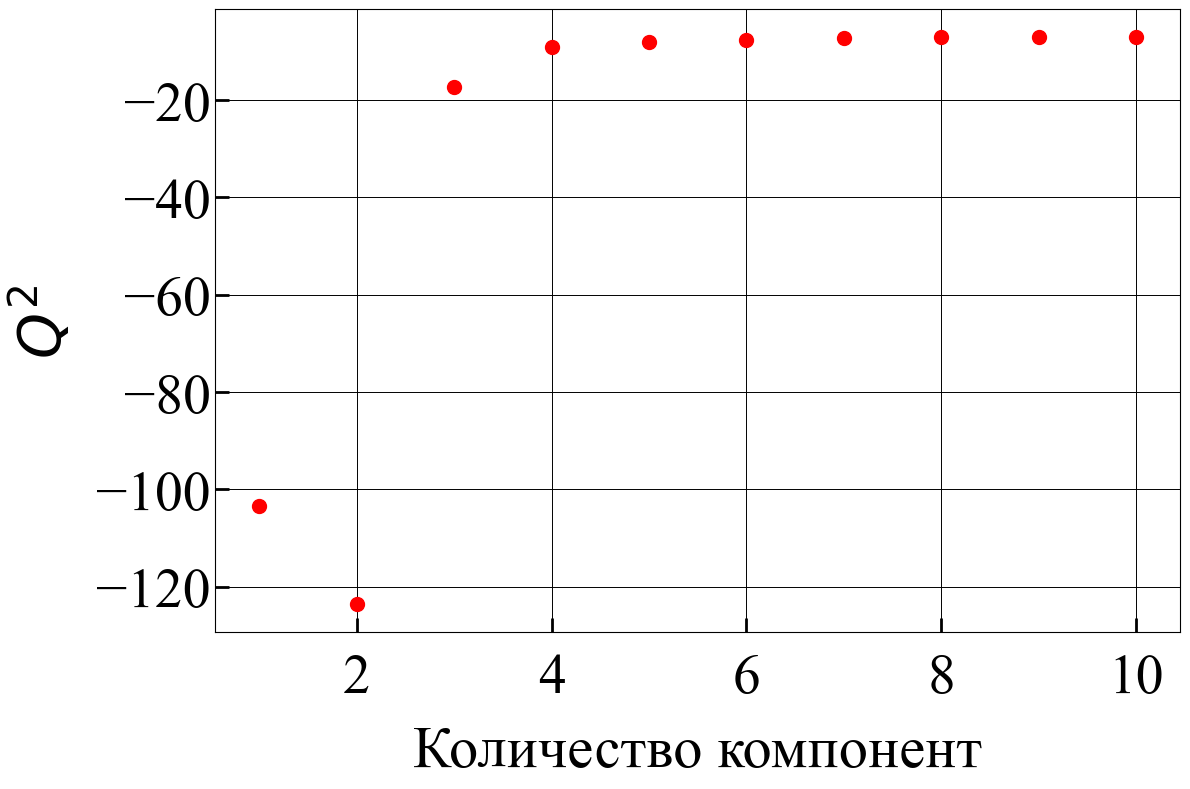

1
Q2_CV dorrit 1 -64.44086210821796 7
RMSE_CV  0.5338485756905706
RMSE_P  0.04233714660833461
Q2_P  0.8957887219223477





/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:232: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:233: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:276: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


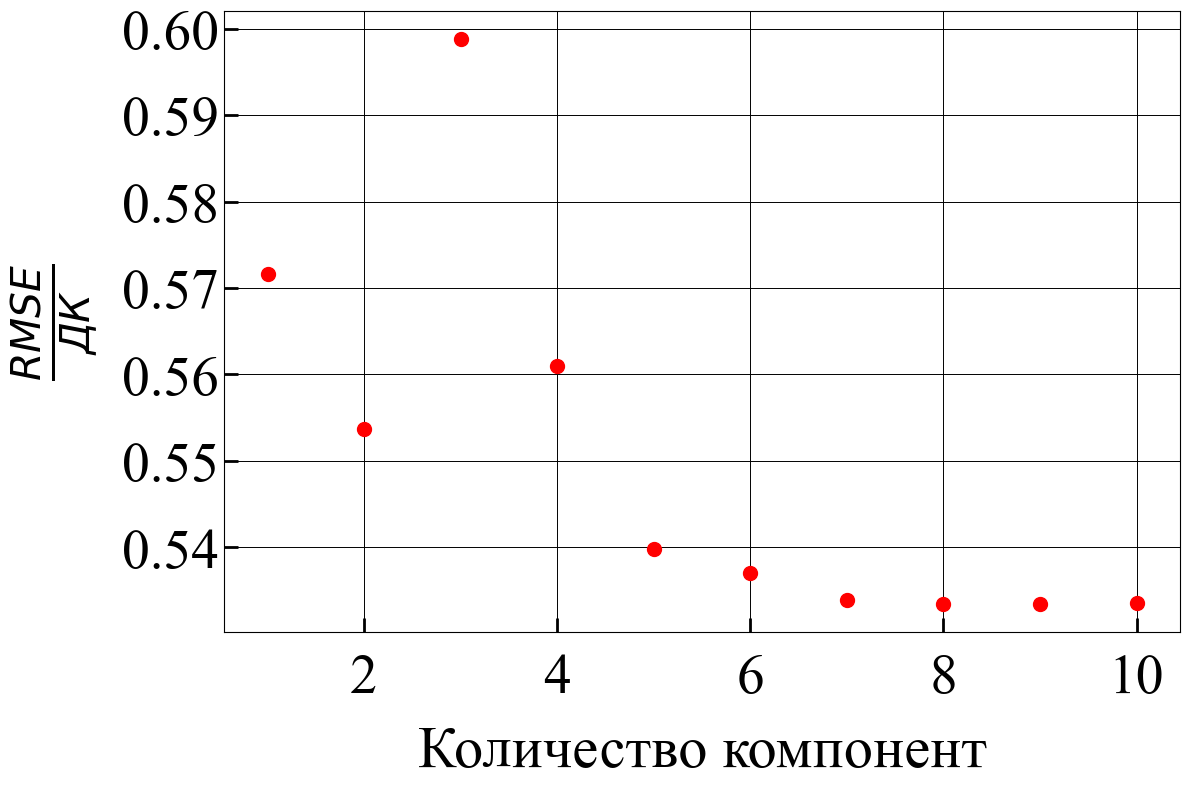

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:232: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:233: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:276: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


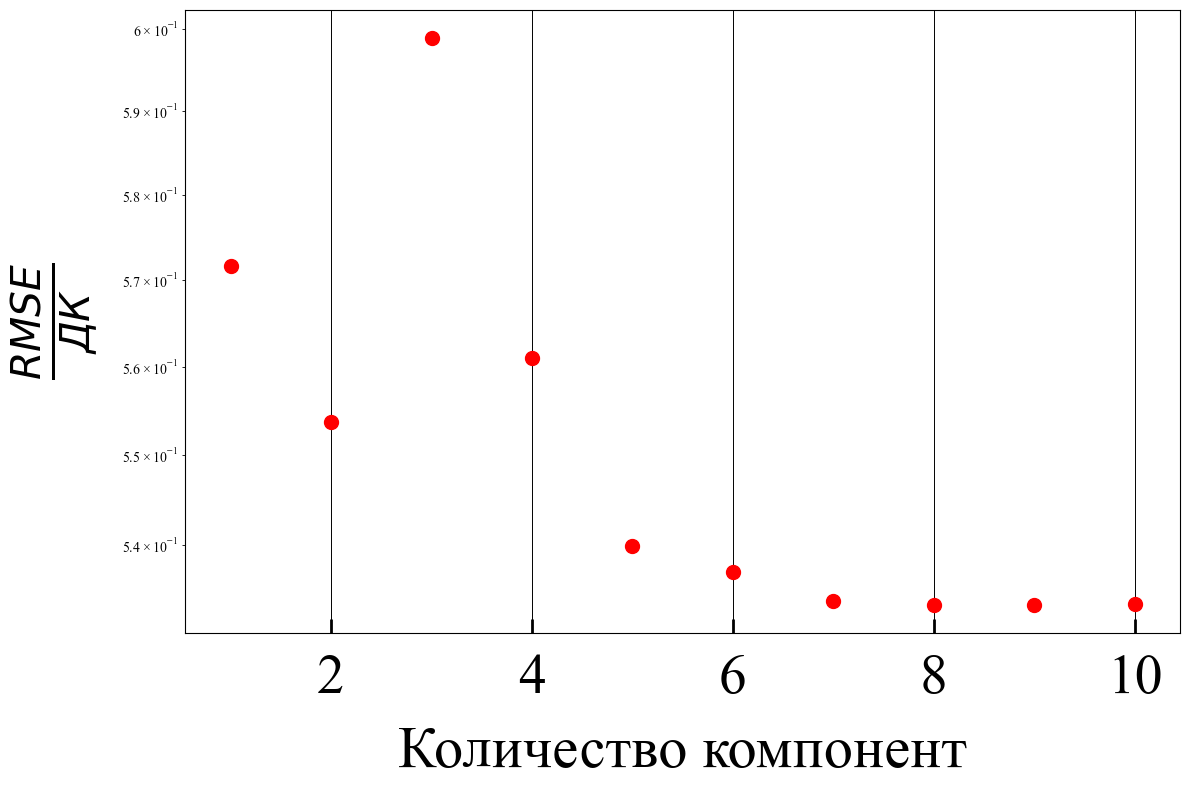

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:261: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:262: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:296: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


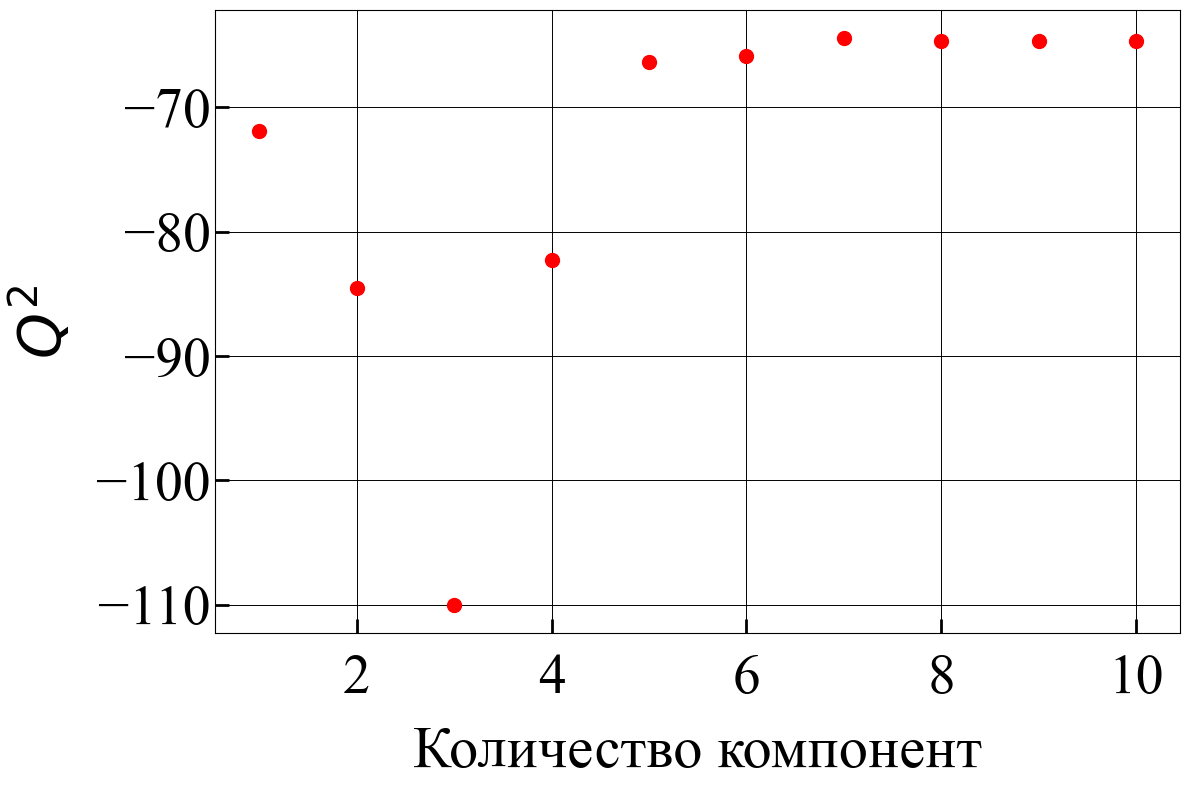

2
Q2_CV dorrit 2 -2.185201292222667 4
RMSE_CV  0.12049625920705957
RMSE_P  0.05409652355471649
Q2_P  0.9806666563008842





/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:232: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:233: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:276: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


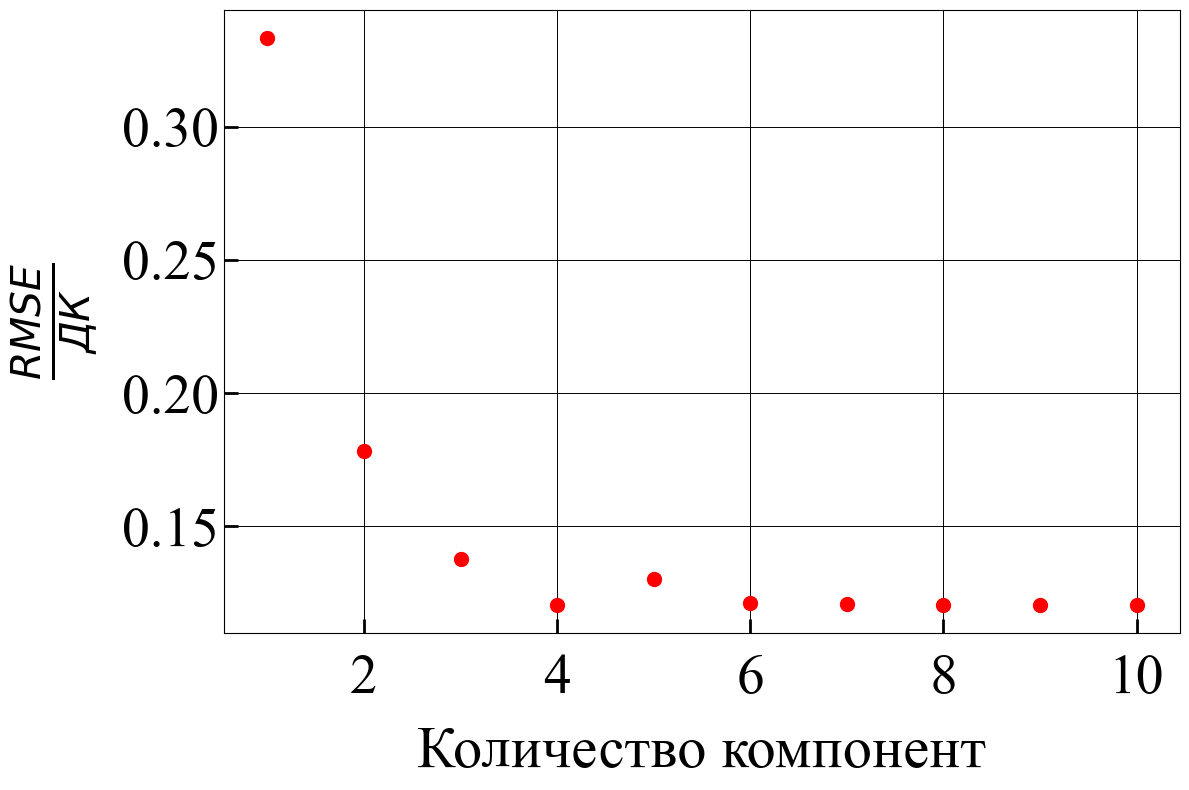

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:232: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:233: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:276: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


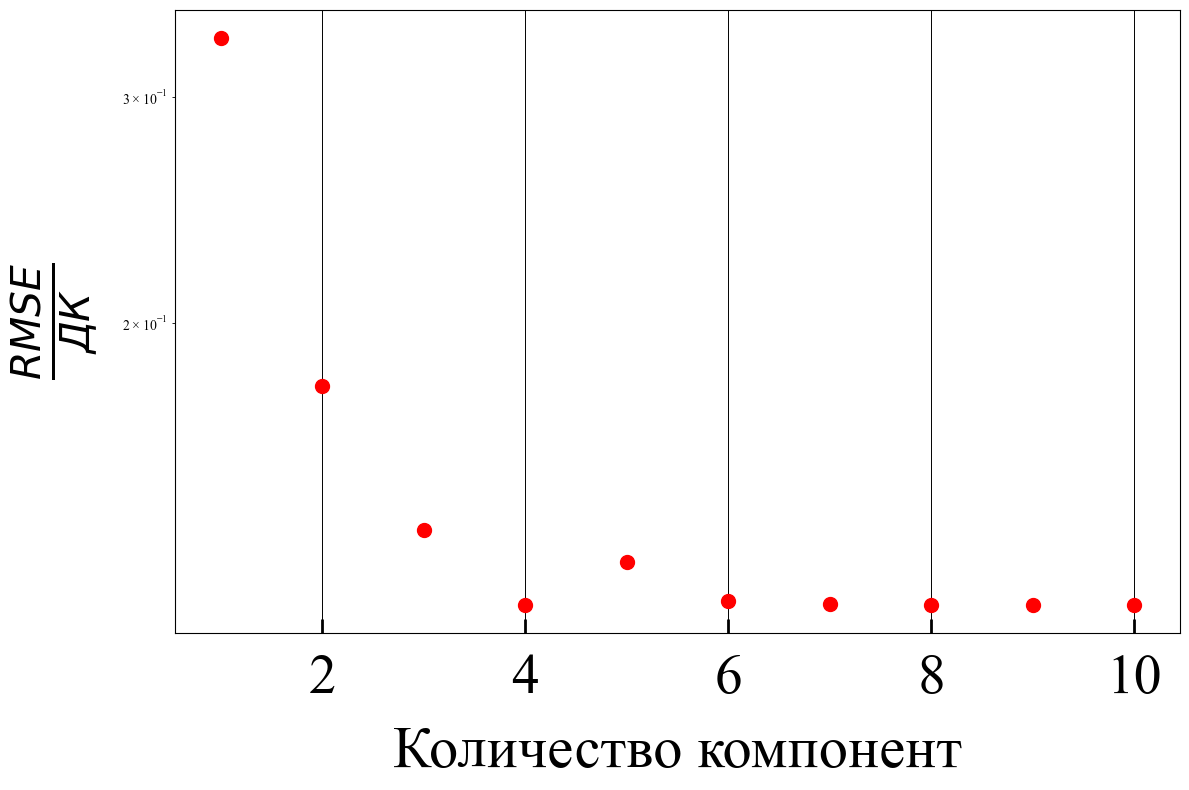

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:261: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:262: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:296: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


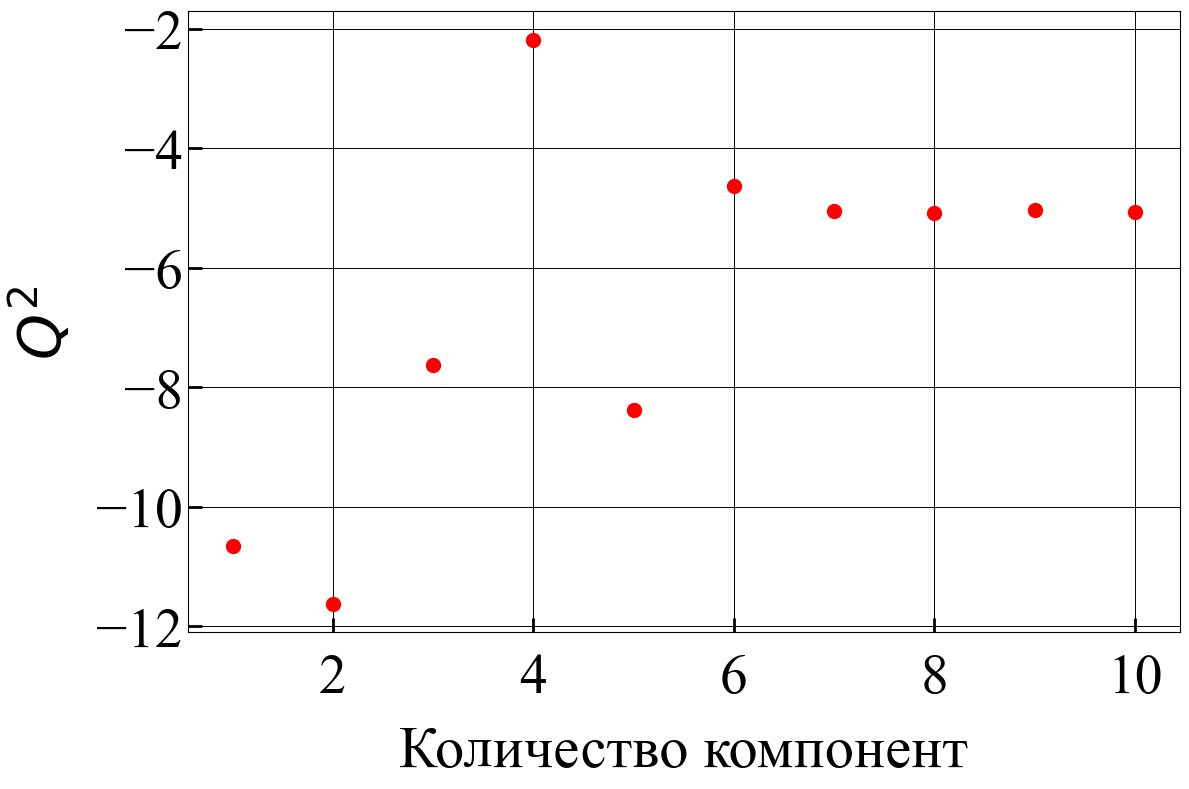

3
Q2_CV dorrit 3 0.22827104984653313 6
RMSE_CV  0.05352581699451343
RMSE_P  0.012902419806281125
Q2_P  0.9700682017407801





/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:232: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:233: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:276: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


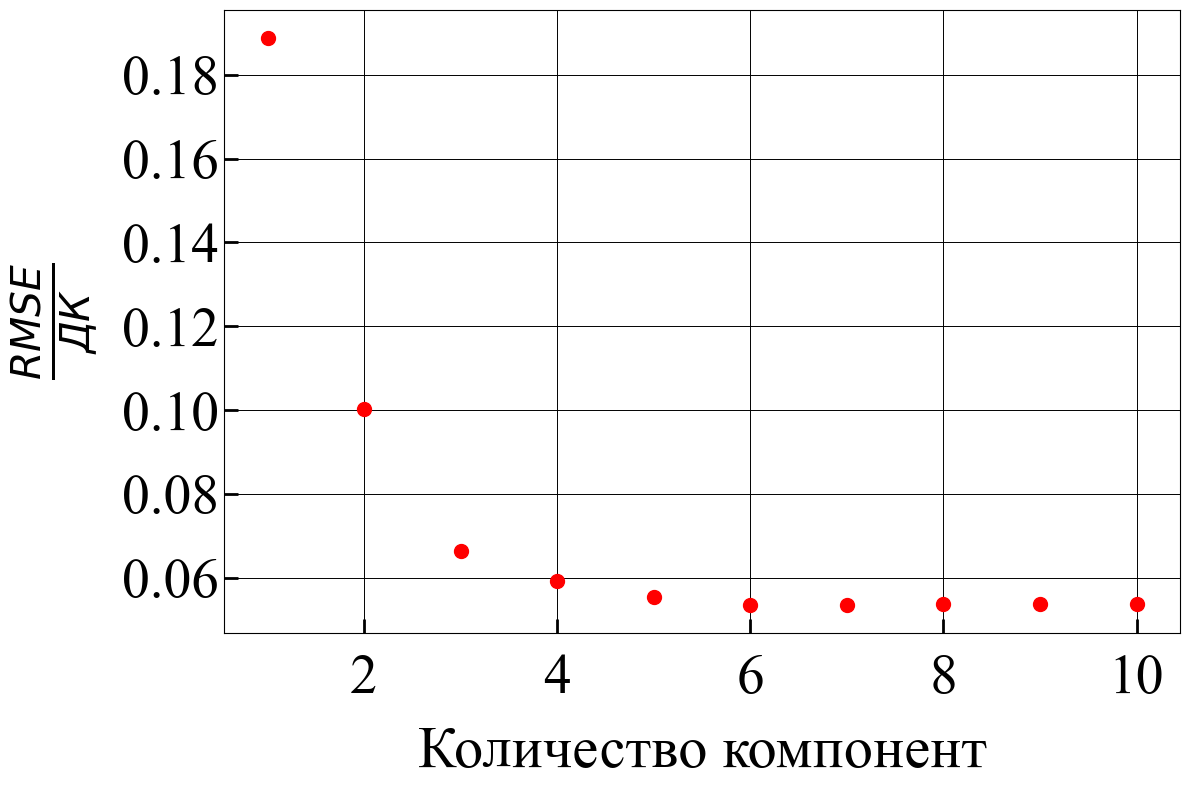

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:232: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:233: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:276: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


Resuming execution.


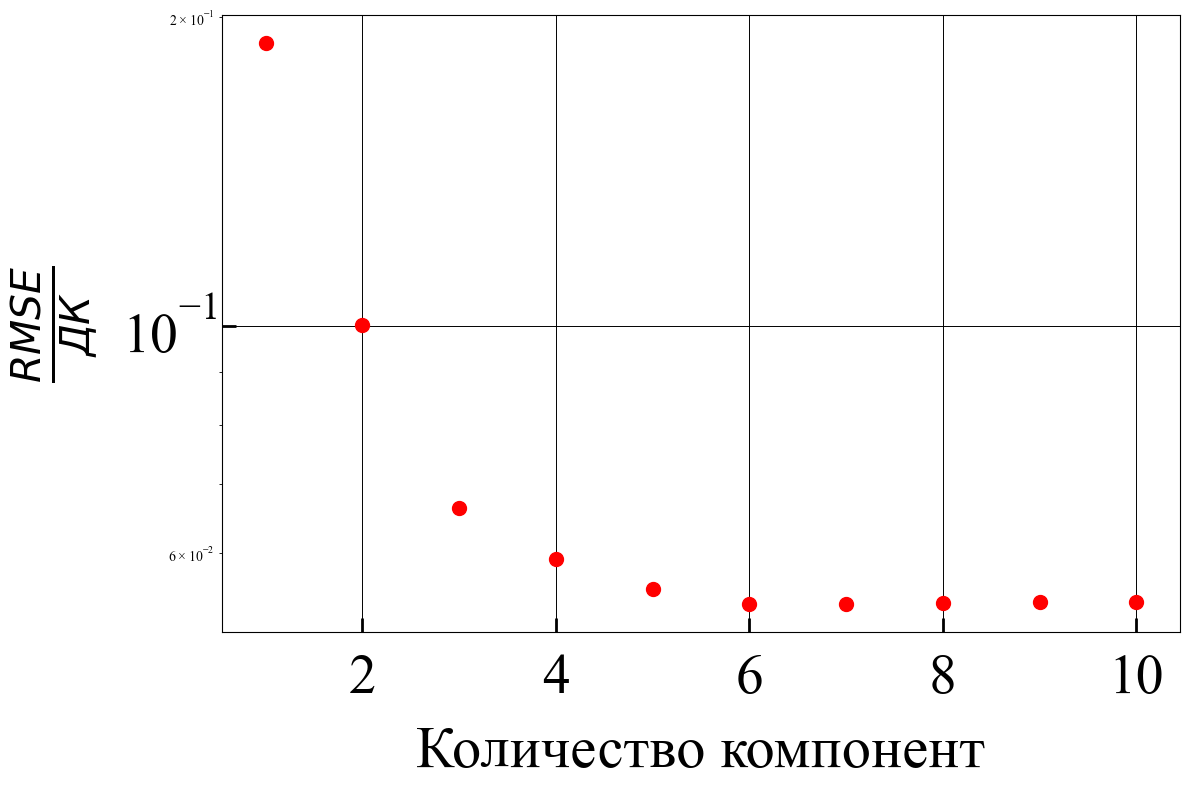

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:261: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:262: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:296: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


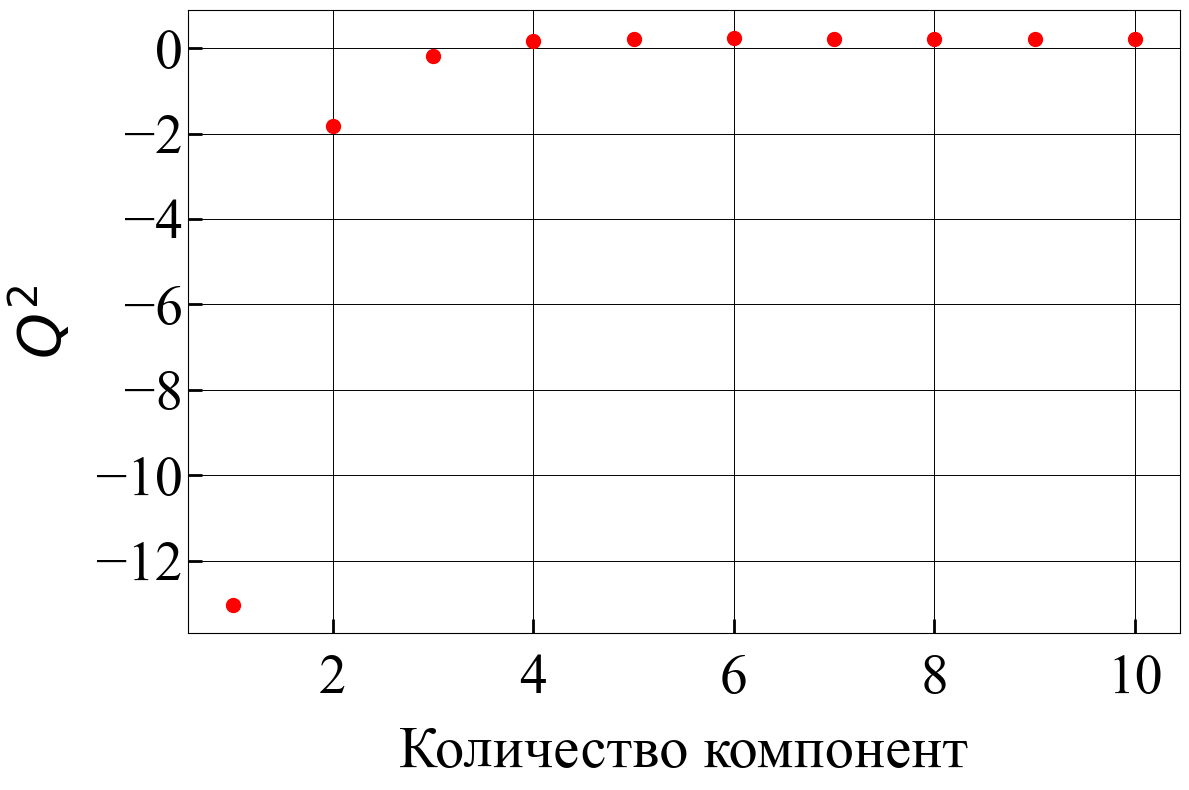

0


/home/ferubkomsu/.local/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/home/ferubkomsu/.local/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/home/ferubkomsu/.local/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/home/ferubkomsu/.local/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/home/ferubkomsu/.local/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is con

Q2_CV syn 0 1.0 4
RMSE_CV  6.6420157262113e-16
RMSE_P  2.531423817423675e-16
Q2_P  1.0





/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:232: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:233: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:276: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


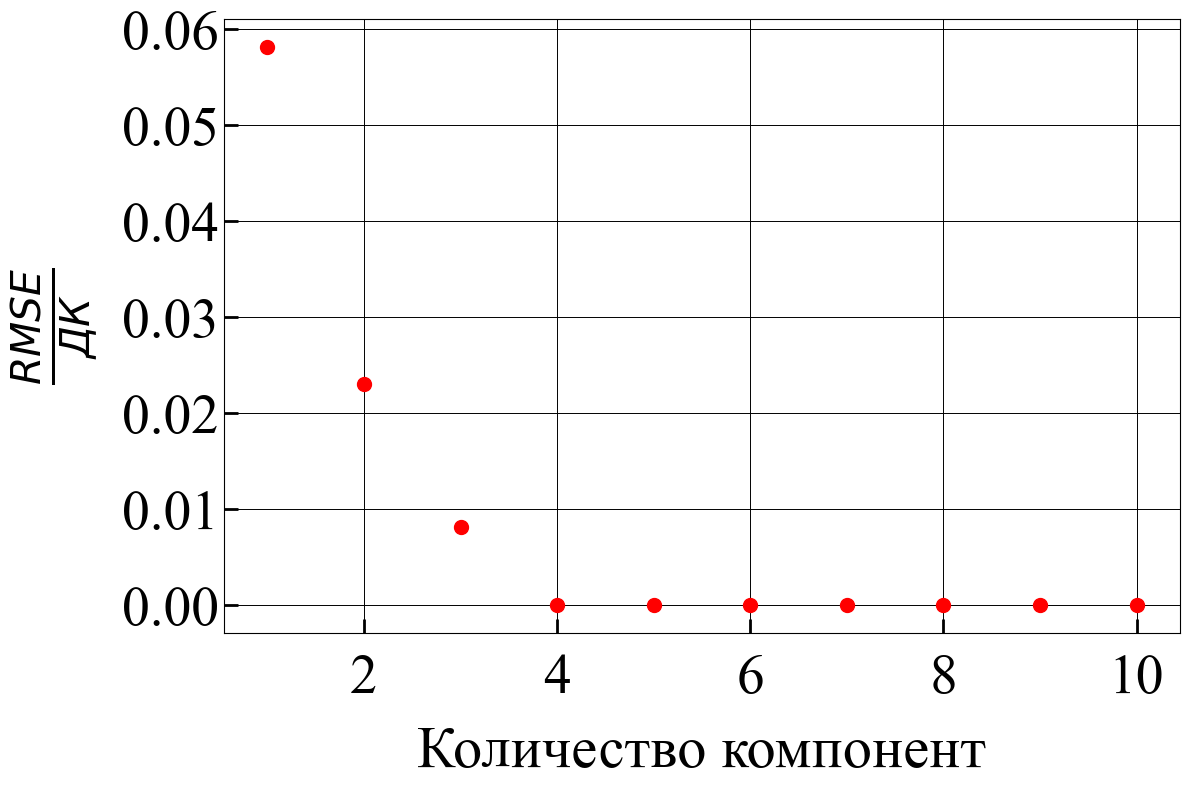

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:232: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:233: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:276: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


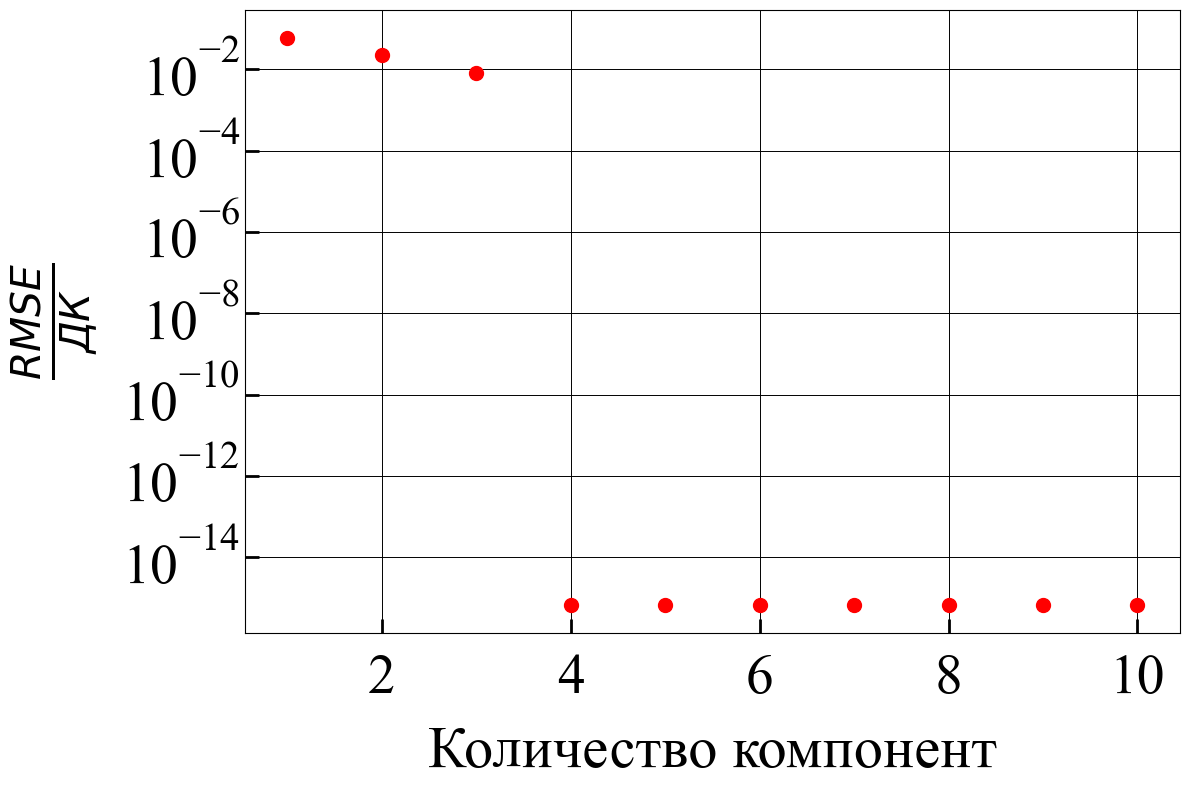

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:261: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:262: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:296: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


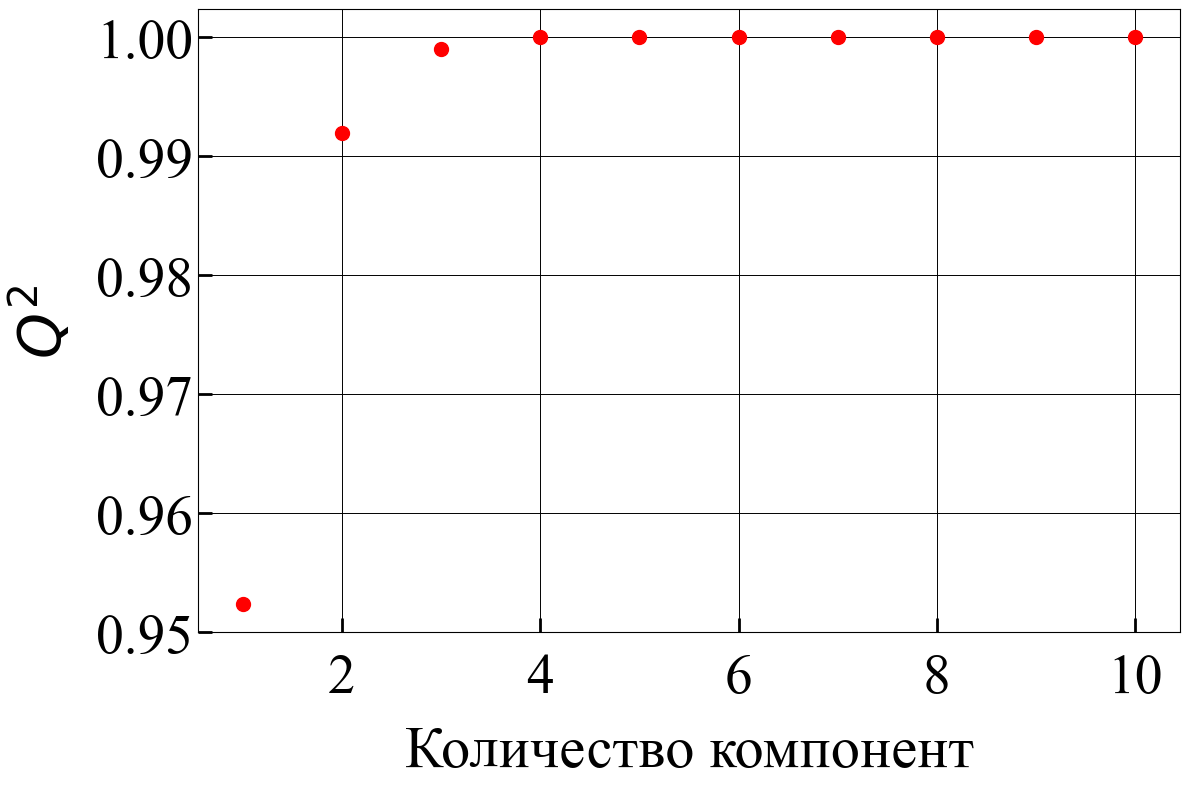

1
High CPU load detected. Cooling down...


/home/ferubkomsu/.local/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/home/ferubkomsu/.local/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/home/ferubkomsu/.local/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/home/ferubkomsu/.local/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/home/ferubkomsu/.local/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is con

Q2_CV syn 1 1.0 4
RMSE_CV  2.360371374881053e-16
RMSE_P  1.2404367101072682e-16
Q2_P  1.0





/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:232: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:233: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:276: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


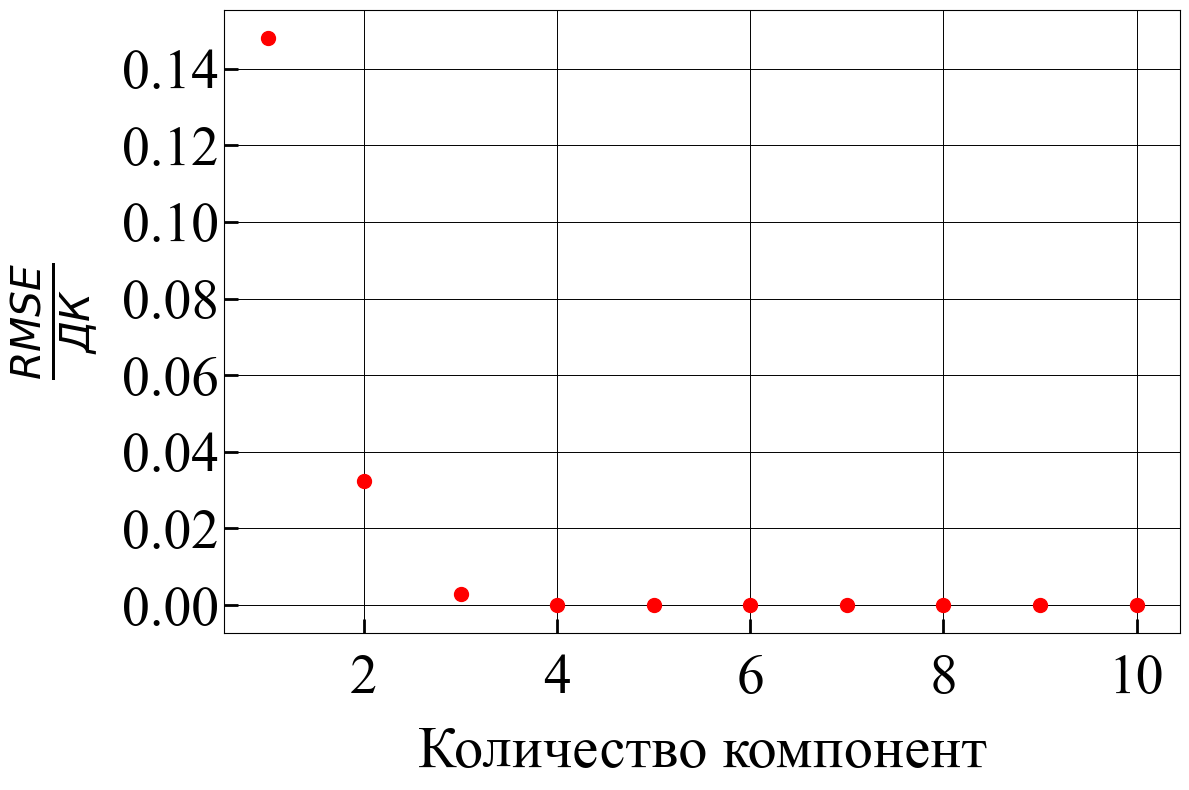

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:232: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:233: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:276: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


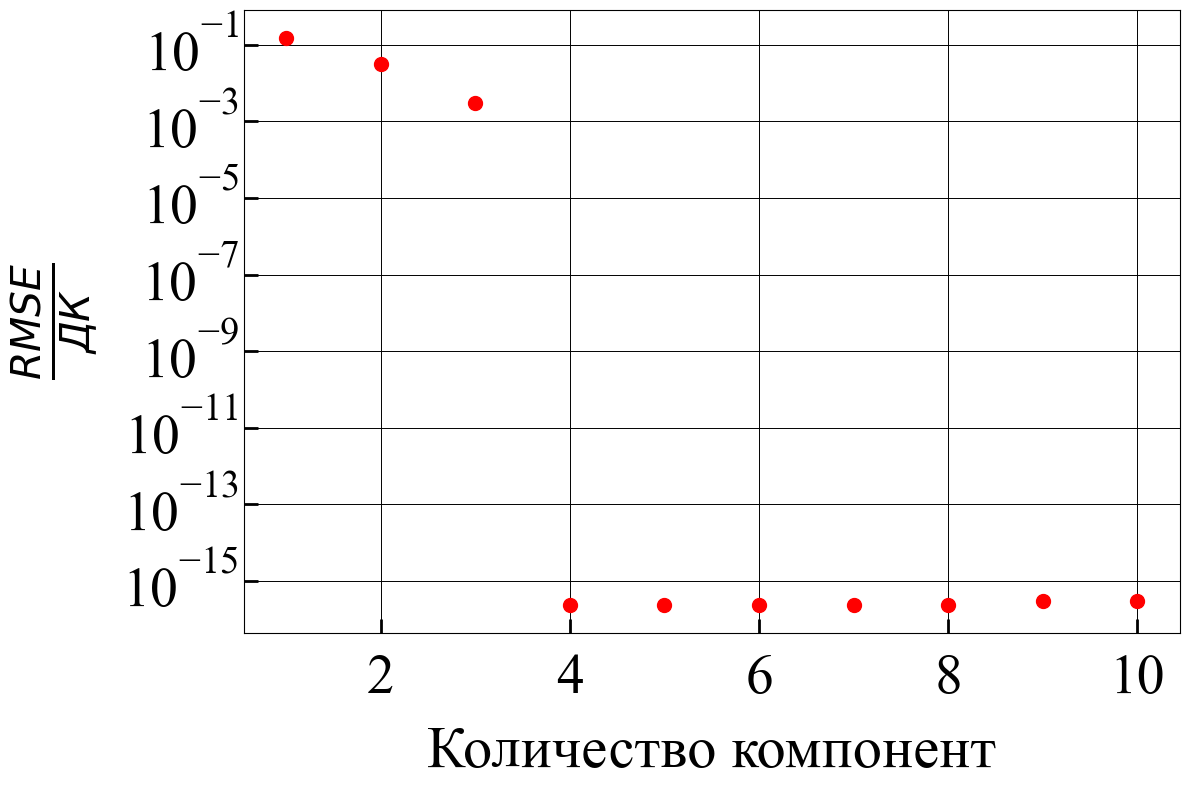

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:261: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:262: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:296: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


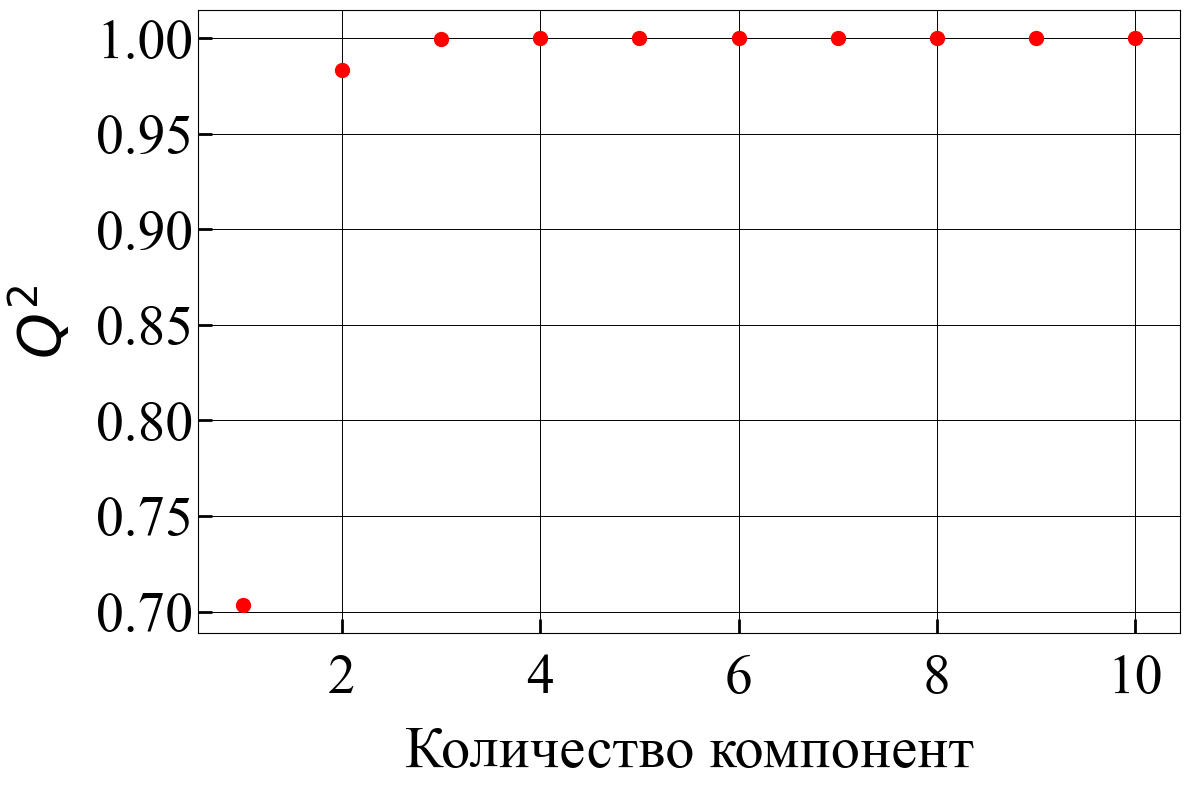

2


/home/ferubkomsu/.local/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/home/ferubkomsu/.local/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/home/ferubkomsu/.local/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/home/ferubkomsu/.local/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/home/ferubkomsu/.local/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is con

Resuming execution.


/home/ferubkomsu/.local/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/home/ferubkomsu/.local/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/home/ferubkomsu/.local/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/home/ferubkomsu/.local/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/home/ferubkomsu/.local/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is con

Q2_CV syn 2 1.0 4
RMSE_CV  1.4863398140407546e-16
RMSE_P  2.192477428139203e-16
Q2_P  1.0





/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:276: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


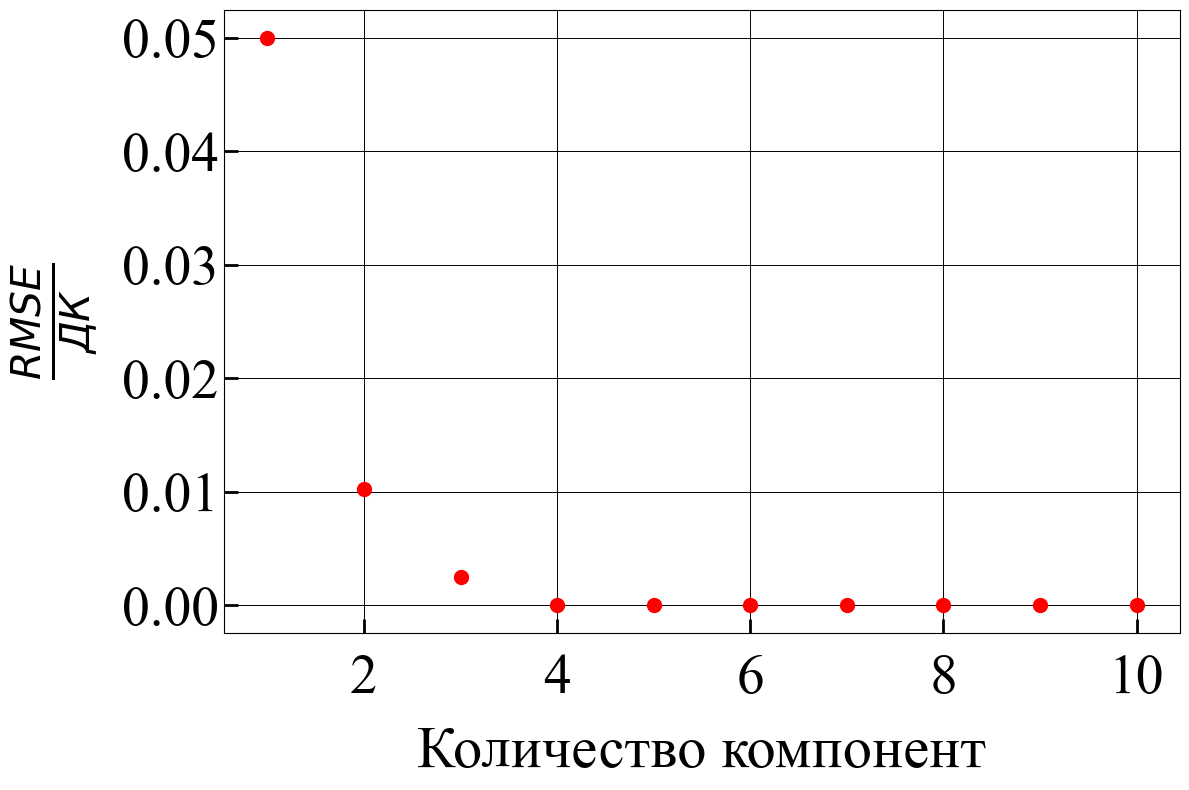

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:232: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:233: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:276: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


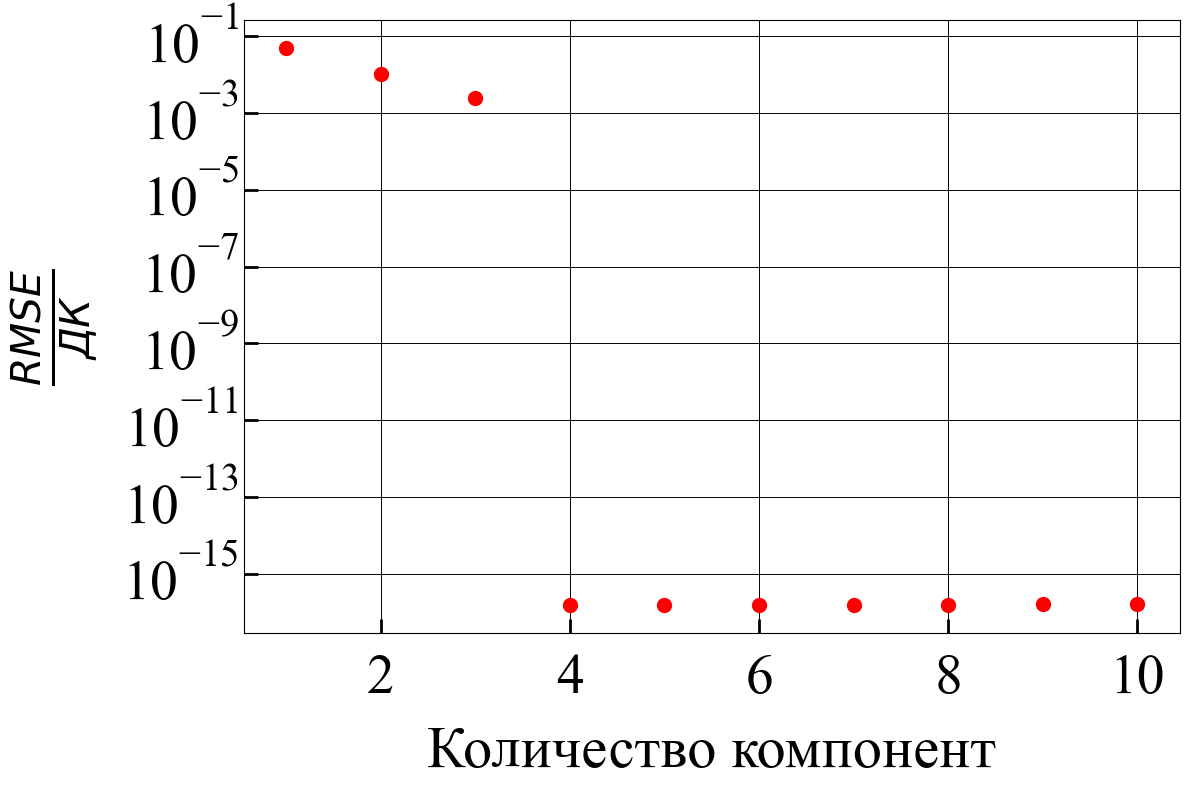

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:261: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:262: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:296: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


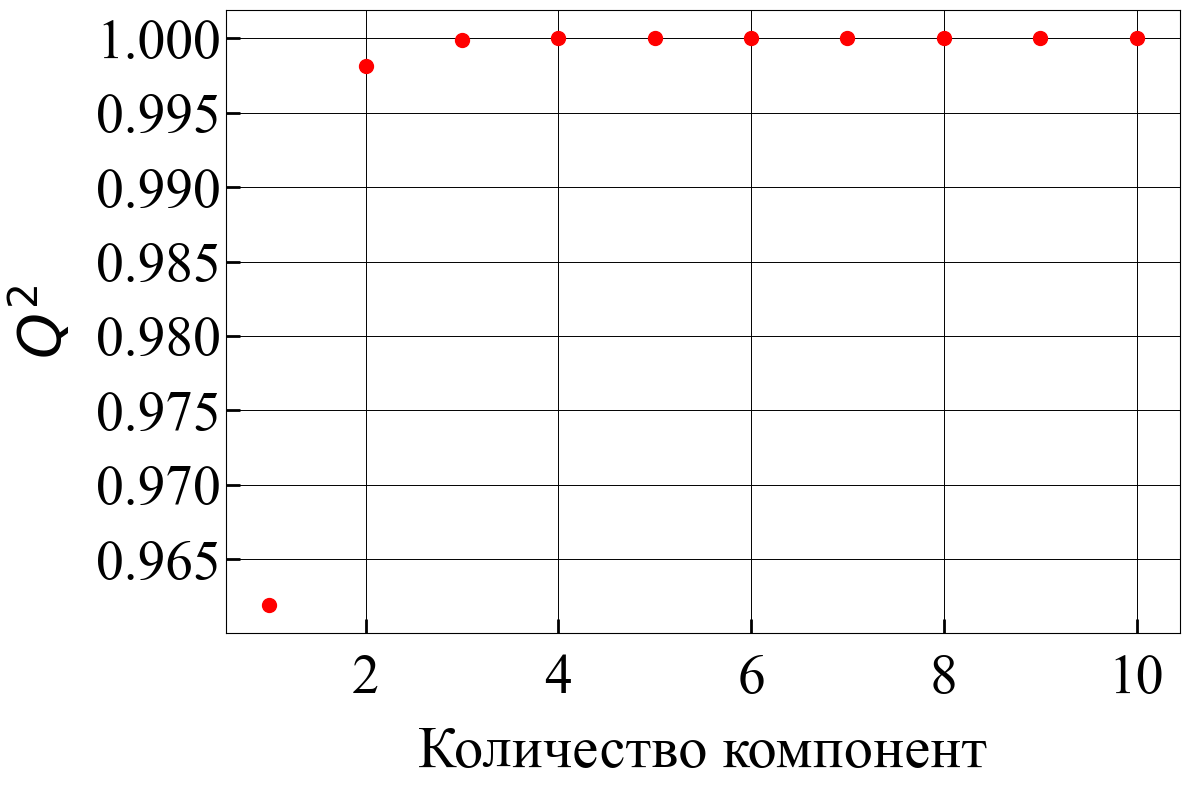

3


/home/ferubkomsu/.local/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/home/ferubkomsu/.local/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/home/ferubkomsu/.local/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/home/ferubkomsu/.local/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/home/ferubkomsu/.local/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is con

High CPU load detected. Cooling down...


/home/ferubkomsu/.local/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/home/ferubkomsu/.local/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/home/ferubkomsu/.local/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/home/ferubkomsu/.local/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/home/ferubkomsu/.local/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is con

Q2_CV syn 3 1.0 4
RMSE_CV  2.5610543075118626e-16
RMSE_P  1.910113282773015e-16
Q2_P  1.0





/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:232: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:233: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:276: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


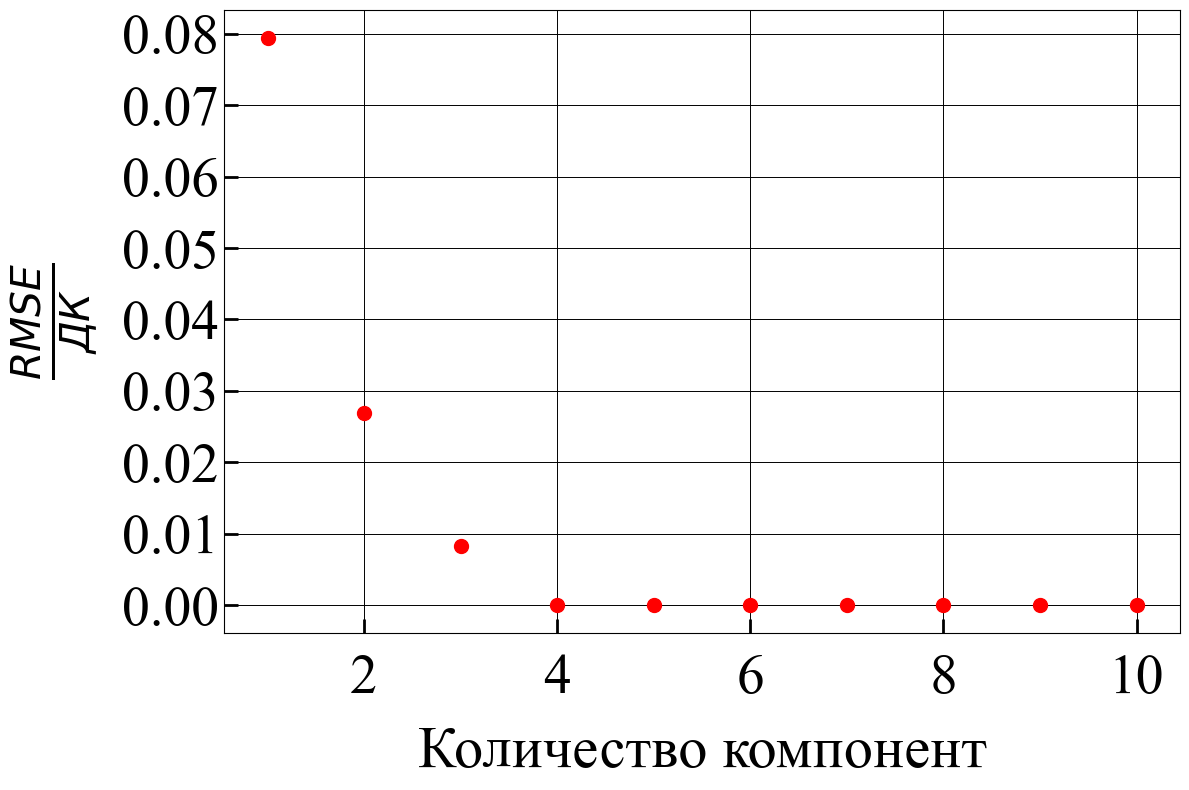

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:232: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:233: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:276: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


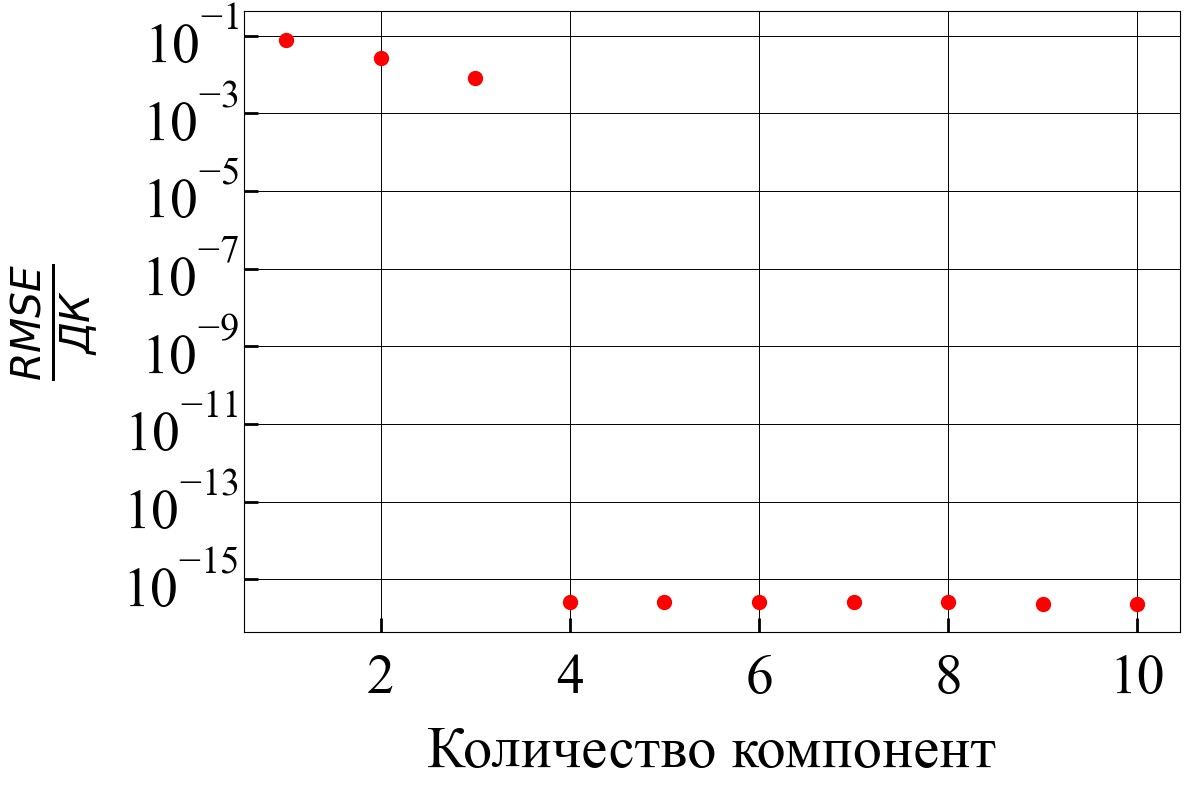

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:261: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:262: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:296: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


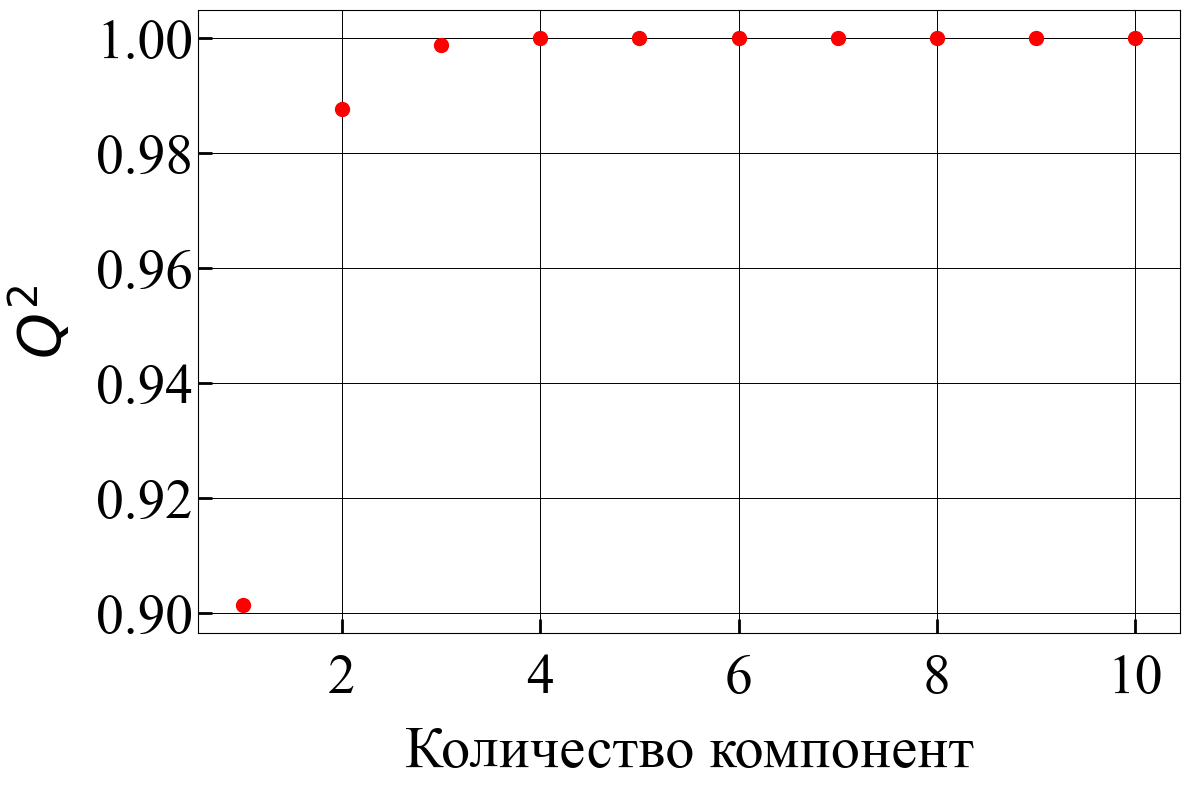

Resuming execution.


KeyboardInterrupt: 

In [6]:
calculation_thread = threading.Thread(target=calculate_pls)
calculation_thread.start()


monitor()

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:133: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:134: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:150: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


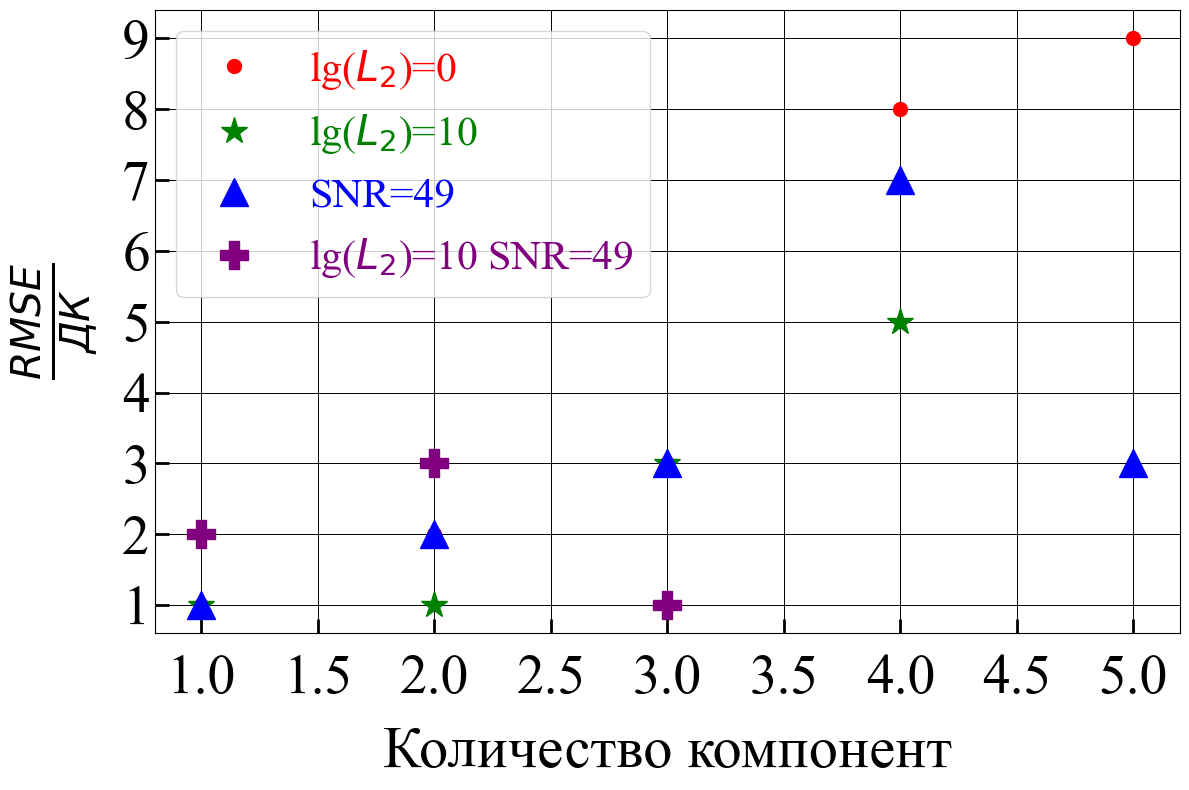

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:133: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:134: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:150: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


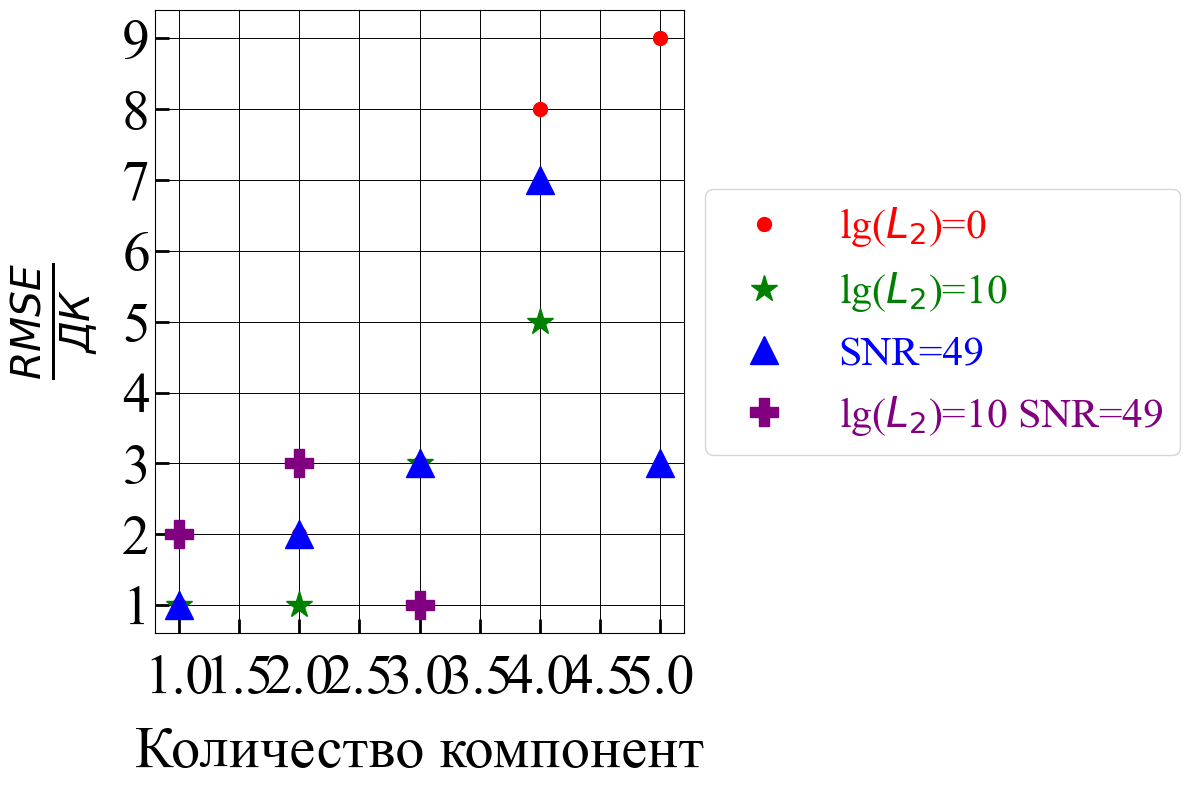

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:133: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:134: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:150: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


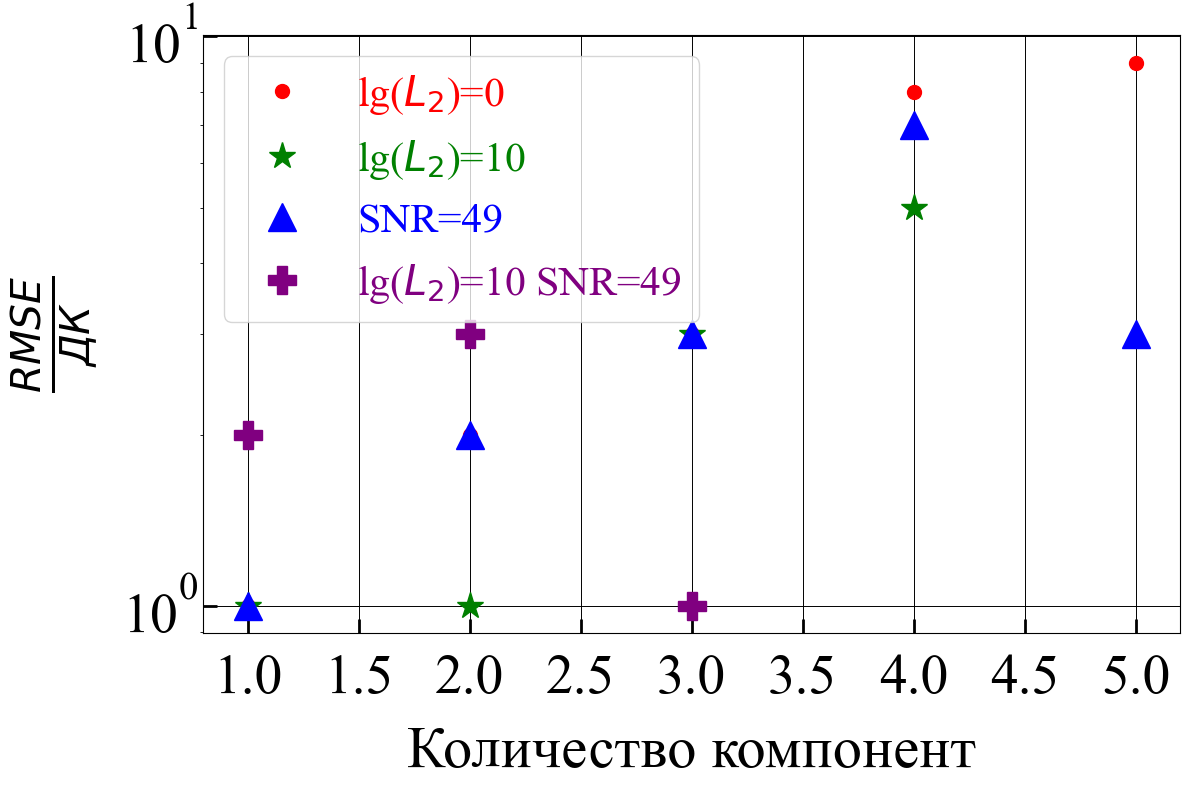

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:133: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:134: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:150: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


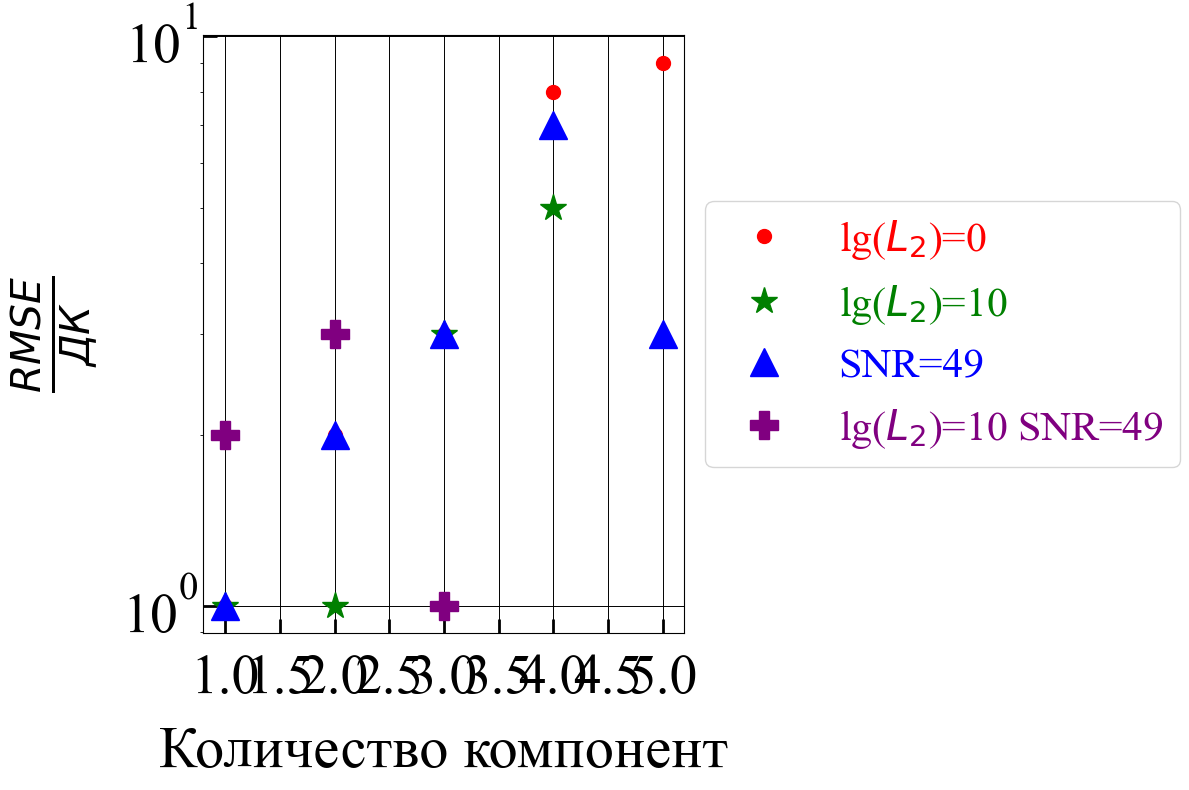

In [3]:
pai=pl()
pai.main(l2=10,snr=49,rmse=np.array([1,2,3,8,9]),
         rmse_l2=np.array([1,1,3,5]),rmse_snr=np.array([1,2,3,7,3]),
         rmse_l2_snr=np.array([2,3,1]),n_comp=np.array([1,2,3,4,5]),
         data_set_name="kkk",fluorophore_name="jhjjh",)

In [ ]:
l2_1=[1,-5,-5]
l2_2=[-5,1,-5]

In [12]:
def calculate3():
        # l2_1=[-4,-5,-2,0,-5,0]
        # l2_2=[-3,-5,-4,-5,-3,1]
        # for k in range(6):
        #         nodel1=box(file_name='asmund',number_of_components=[i for i in range(1,11)],l2_coefs=np.array([10**l2_1[k]]),
        #                 # number_of_column=k,snr=91.7332,norm_func=['evklid'])
        #                 number_of_column=k,snr=-100,norm_func=['evklid'])
        #         nodel1.calc()
        #         nodel1.best_params()
        #         resp1=nodel1.return_resoults()

        #         nodel2=box(file_name='asmund',number_of_components=[i for i in range(1,11)],l2_coefs=np.array([10**l2_2[k]]),
        #                 number_of_column=k,snr=91.7332,norm_func=['evklid'])
        #                 # number_of_column=k,snr=-100,norm_func=['evklid'])
        #         nodel2.calc()
        #         nodel2.best_params()
        #         resp2=nodel2.return_resoults()

        #         paint=pl()
        #         paint.main(l21=l2_1[k],l22=l2_2[k],snr=91.7332,rmse_l2=resp1[1],rmse_l2_snr=resp2[1],
        #                         n_comp=np.array([i for i in range(1,11)]),data_set_name="asmund_",fluorophore_name=str(k),
        #                         save=True)
        l2_1=[-4,-5,-4,3]
        l2_2=[-4,-2,-4,6]
        for k in range(4):
                nodel1=box(file_name='dorrit',number_of_components=[i for i in range(1,11)],l2_coefs=np.array([10**l2_1[k]]),
                        # number_of_column=k,snr=91.7332,norm_func=['evklid'])
                        number_of_column=k,snr=-100,norm_func=['evklid'])
                nodel1.calc()
                nodel1.best_params()
                resp1=nodel1.return_resoults()

                nodel2=box(file_name='dorrit',number_of_components=[i for i in range(1,11)],l2_coefs=np.array([10**l2_2[k]]),
                        number_of_column=k,snr=91.7332,norm_func=['evklid'])
                        # number_of_column=k,snr=-100,norm_func=['evklid'])
                nodel2.calc()
                nodel2.best_params()
                resp2=nodel2.return_resoults()

                paint=pl()
                paint.main(l21=l2_1[k],l22=l2_2[k],snr=91.7332,rmse_l2=resp1[1],rmse_l2_snr=resp2[1],
                                n_comp=np.array([i for i in range(1,11)]),data_set_name="dorrit_",fluorophore_name=str(k),
                                save=True)
        l2_1=[-4,-5,-4,3]
        l2_2=[-4,-2,-4,6]
        for k in range(4):
                nodel1=box(file_name='syn',number_of_components=[i for i in range(1,11)],l2_coefs=np.array([10**l2_1[k]]),
                        # number_of_column=k,snr=91.7332,norm_func=['evklid'])
                        number_of_column=k,snr=-100,norm_func=['evklid'])
                nodel1.calc()
                nodel1.best_params()
                resp1=nodel1.return_resoults()

                nodel2=box(file_name='syn',number_of_components=[i for i in range(1,11)],l2_coefs=np.array([10**l2_2[k]]),
                        number_of_column=k,snr=91.7332,norm_func=['evklid'])
                        # number_of_column=k,snr=-100,norm_func=['evklid'])
                nodel2.calc()
                nodel2.best_params()
                resp2=nodel2.return_resoults()

                paint=pl()
                paint.main(l21=l2_1[k],l22=l2_2[k],snr=91.7332,rmse_l2=resp1[1],rmse_l2_snr=resp2[1],
                                n_comp=np.array([i for i in range(1,11)]),data_set_name="syn_",fluorophore_name=str(k),
                                save=True)
    
    
    
    

Q2_CV dorrit 0 0.9250562147803576 10 -4.0
RMSE_CV  0.008696860625781695
RMSE_P  0.005246046085076706
Q2_P  0.9843218411358918





/home/ferubkomsu/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
26 fits failed out of a total of 27.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ferubkomsu/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ferubkomsu/Рабочий стол/new_n_pls/box_training_algorithm.py", line 108, in fit
    response=self.check_smooth_loadings(w_i=w_i[:,0],excitation_wavelenth=self.excitation_wavelenth,
  File "/home/ferubkomsu/Рабочий стол/new_n_pls/box_training_algorithm.py", line 58, in check_sm

Q2_CV dorrit 0 -14.647752921409218 3 -4.0
RMSE_CV  0.09403177297473407
RMSE_P  0.06449556650959967
Q2_P  -1.369684792969386





/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:133: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:148: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


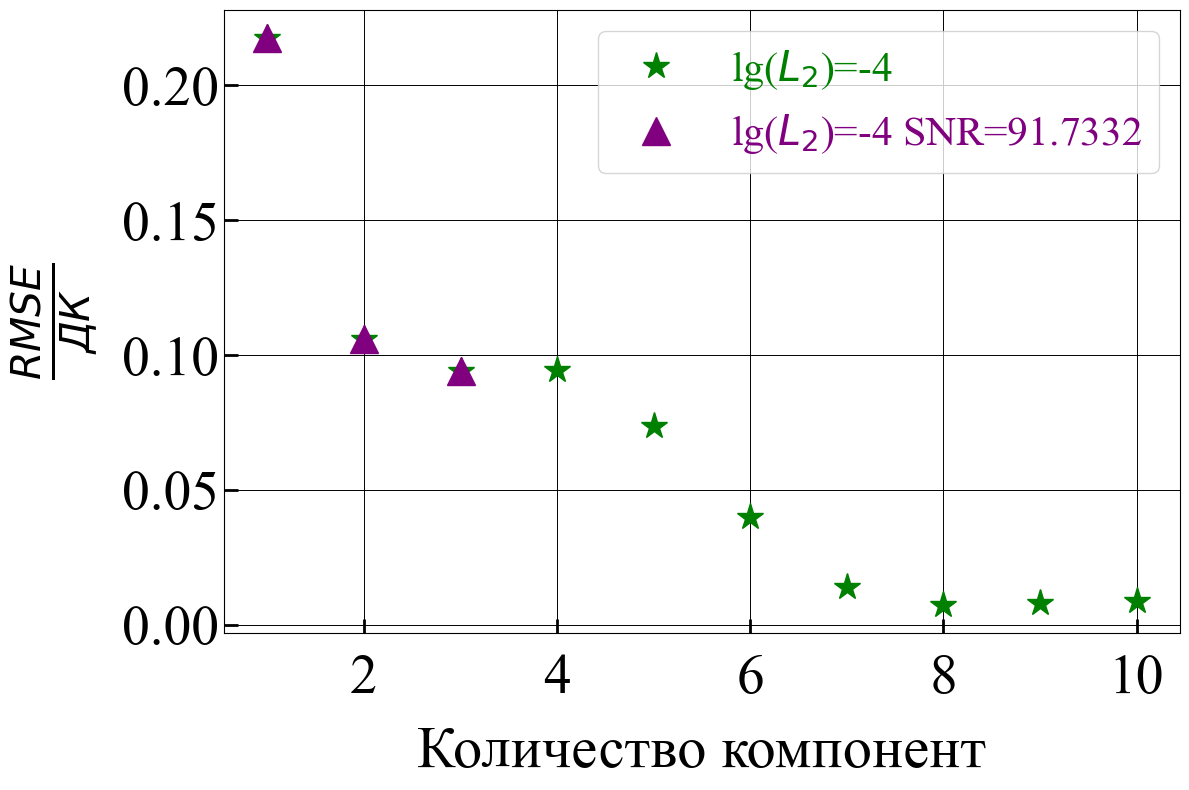

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:133: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:148: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


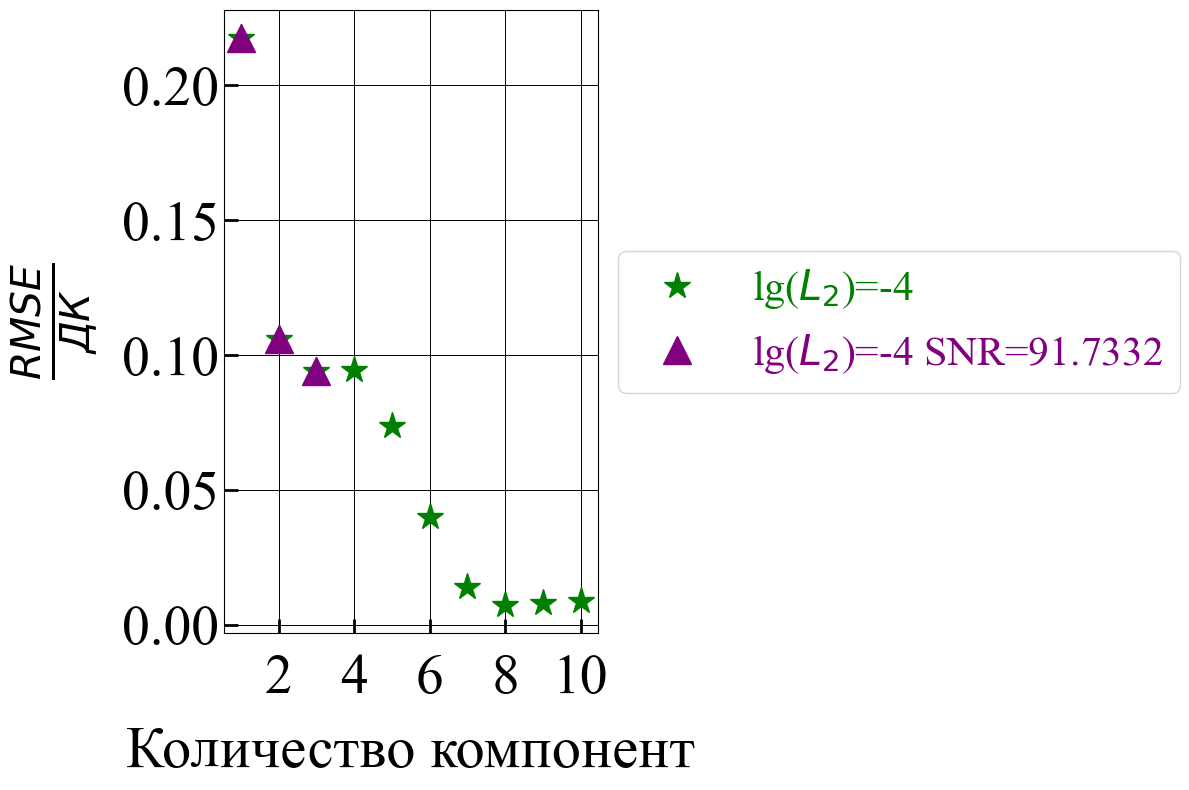

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:133: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:148: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


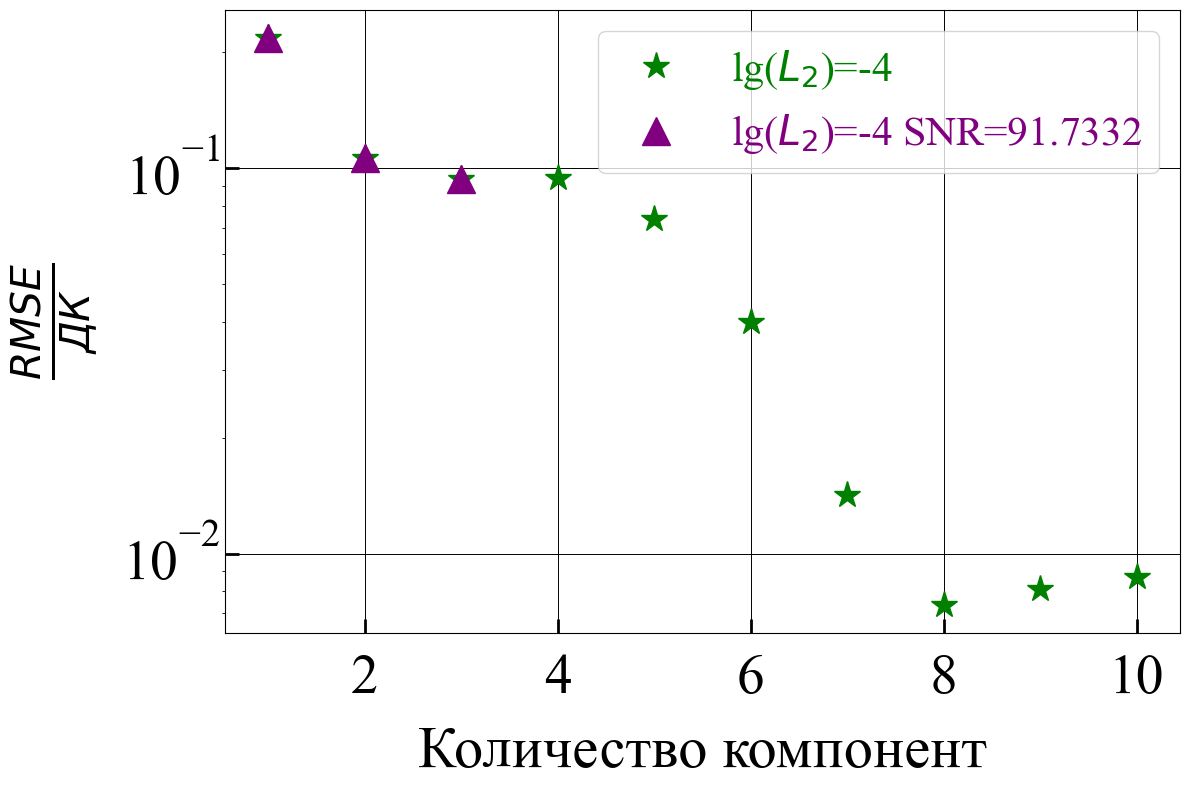

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:133: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:148: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


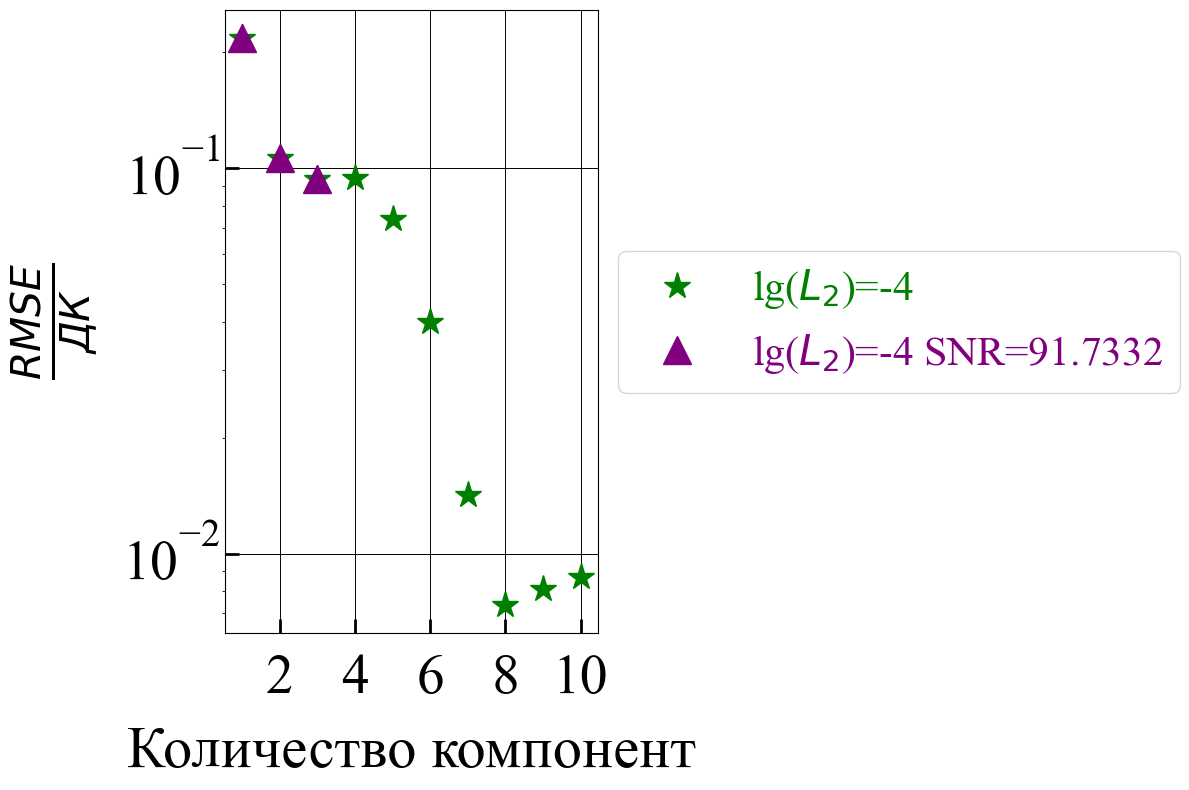

Q2_CV dorrit 1 0.8963299498924626 10 -5.0
RMSE_CV  0.019775328550717546
RMSE_P  0.03079108845830124
Q2_P  0.9448784227647132





/home/ferubkomsu/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
11 fits failed out of a total of 27.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ferubkomsu/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ferubkomsu/Рабочий стол/new_n_pls/box_training_algorithm.py", line 108, in fit
    response=self.check_smooth_loadings(w_i=w_i[:,0],excitation_wavelenth=self.excitation_wavelenth,
  File "/home/ferubkomsu/Рабочий стол/new_n_pls/box_training_algorithm.py", line 58, in check_sm

Q2_CV dorrit 1 -20.129862145255423 2 -2.0
RMSE_CV  0.36831087200815255
RMSE_P  0.14835566012579474
Q2_P  -0.2796163890325769





/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:133: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:148: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


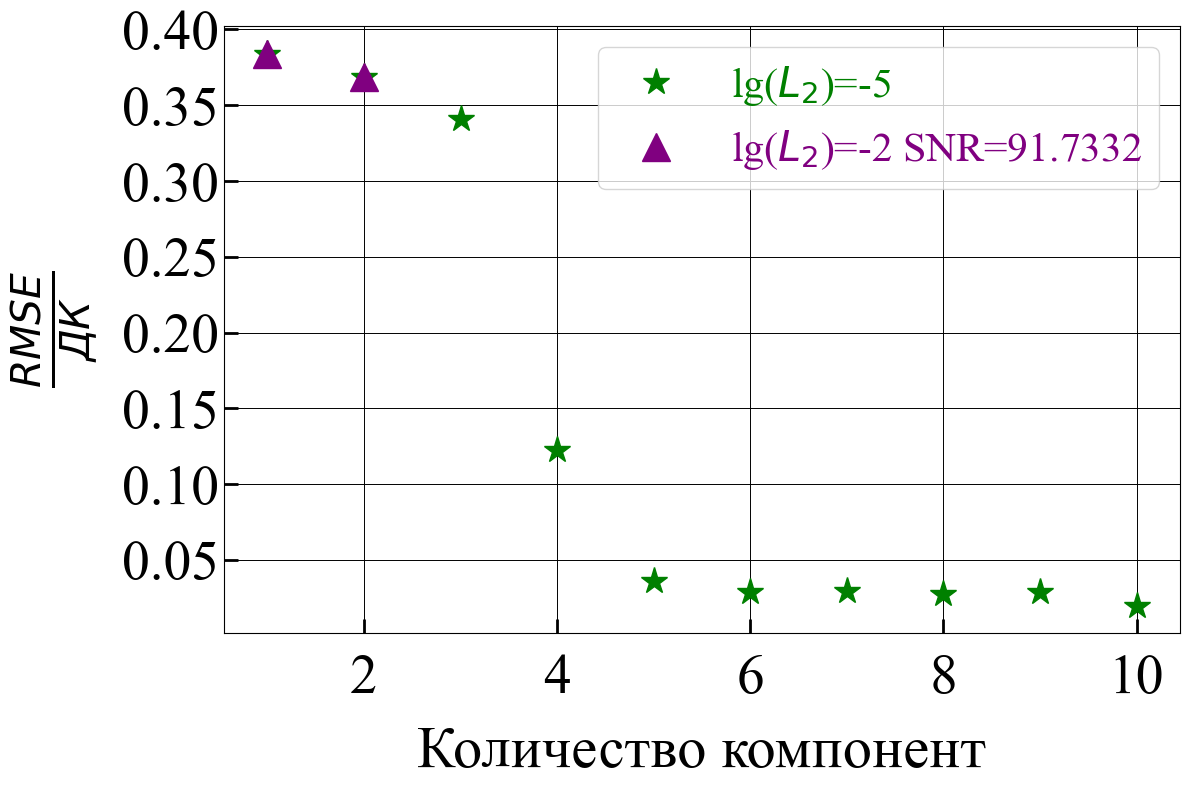

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:133: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:148: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


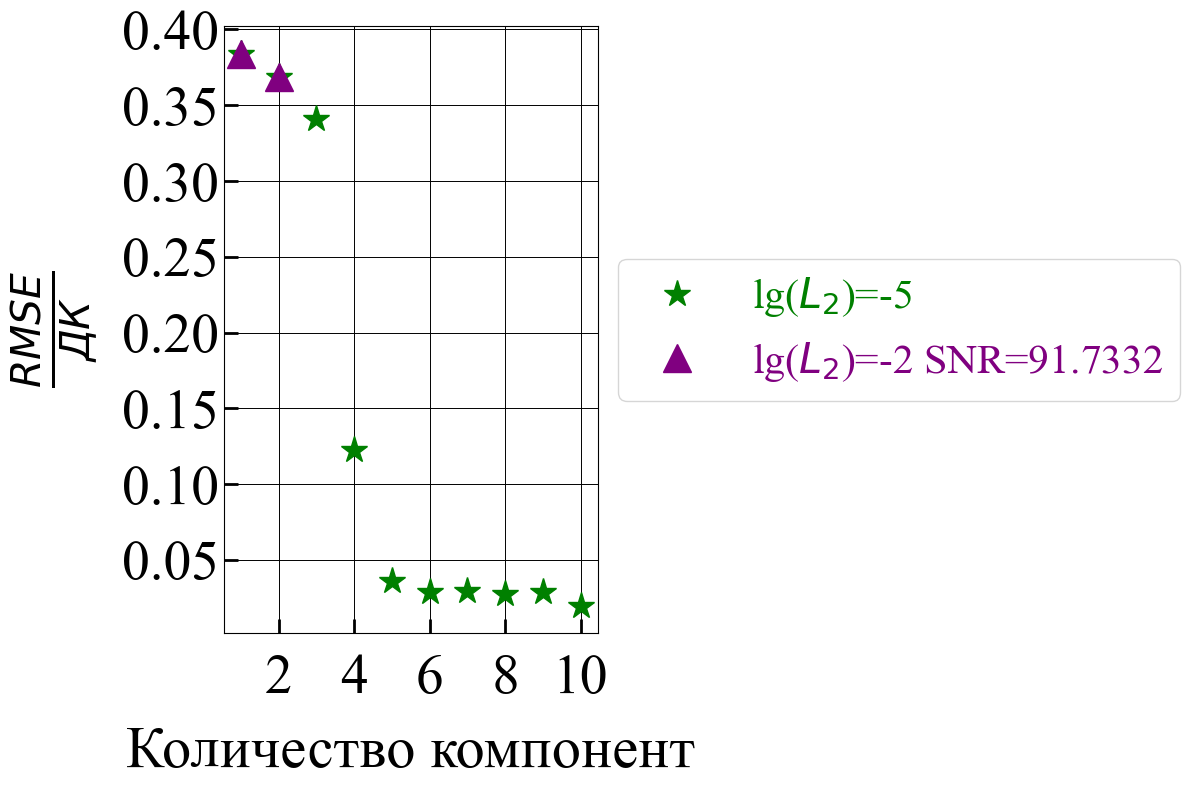

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:133: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:148: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


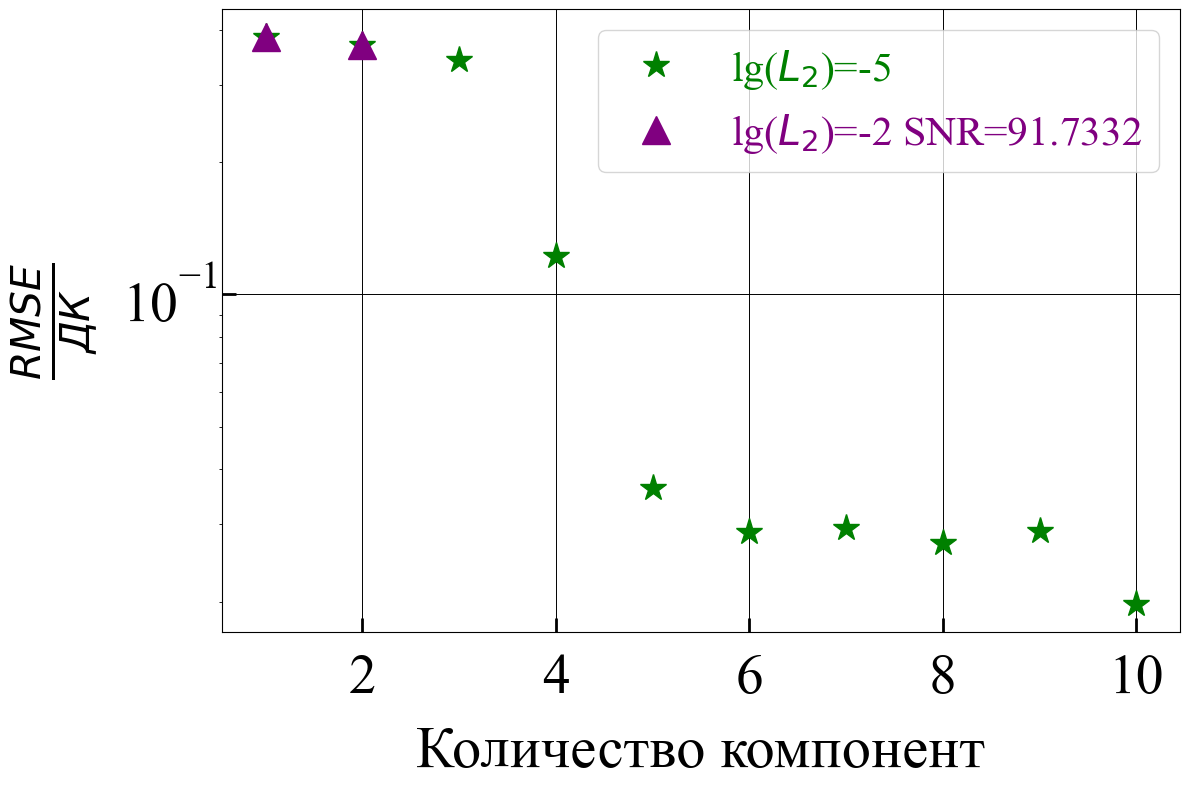

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:133: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:148: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


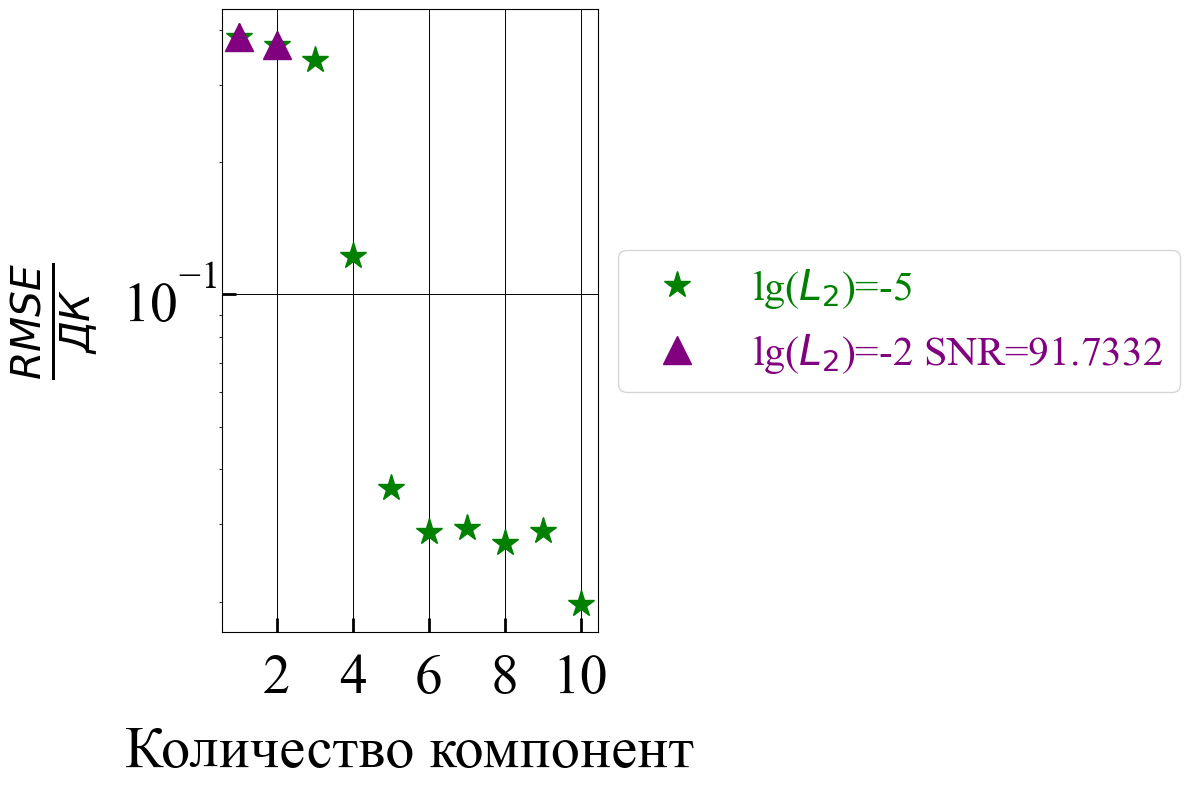

Q2_CV dorrit 2 0.6234127717043637 5 -4.0
RMSE_CV  0.09876668166015455
RMSE_P  0.04404618276125101
Q2_P  0.9871830464192412





/home/ferubkomsu/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1 fits failed out of a total of 27.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ferubkomsu/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ferubkomsu/Рабочий стол/new_n_pls/box_training_algorithm.py", line 108, in fit
    response=self.check_smooth_loadings(w_i=w_i[:,0],excitation_wavelenth=self.excitation_wavelenth,
  File "/home/ferubkomsu/Рабочий стол/new_n_pls/box_training_algorithm.py", line 58, in check_smoo

Q2_CV dorrit 2 -0.09361670364280693 3 -4.0
RMSE_CV  0.14462115892364946
RMSE_P  0.14199208955528178
Q2_P  0.8668023510955757





/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:133: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:148: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


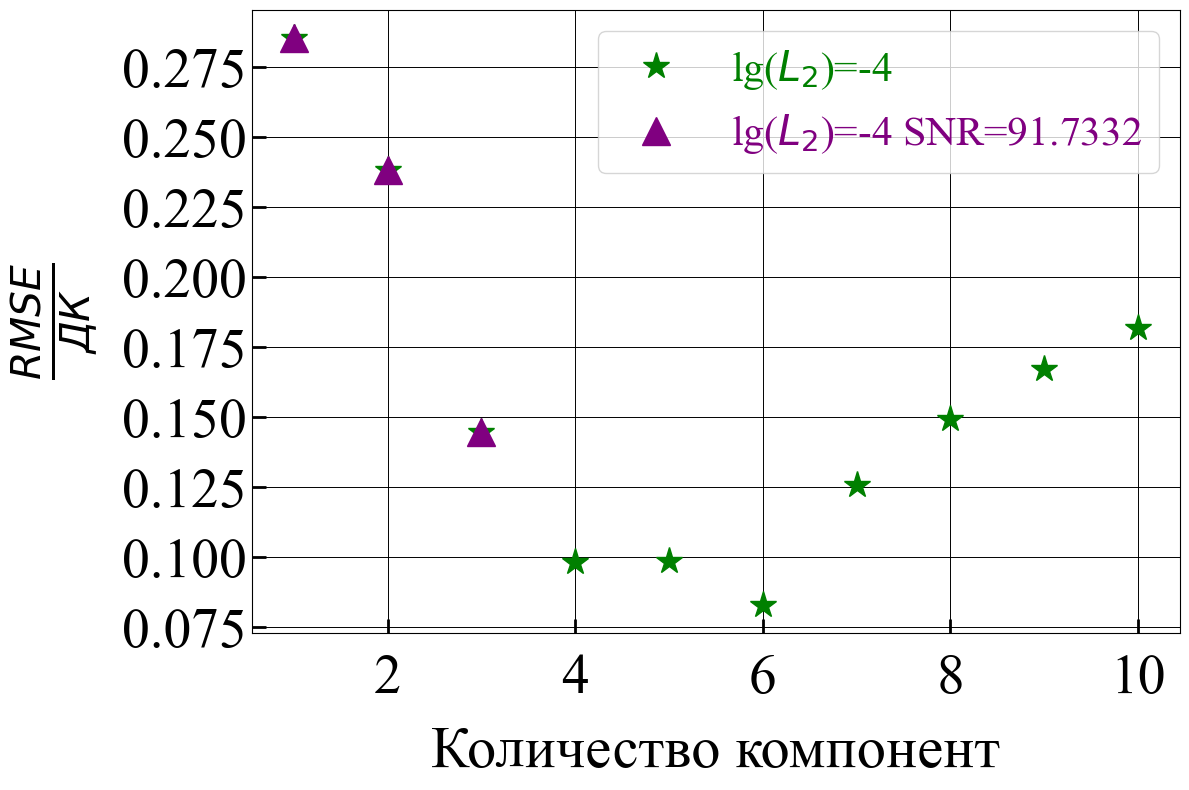

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:133: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:148: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


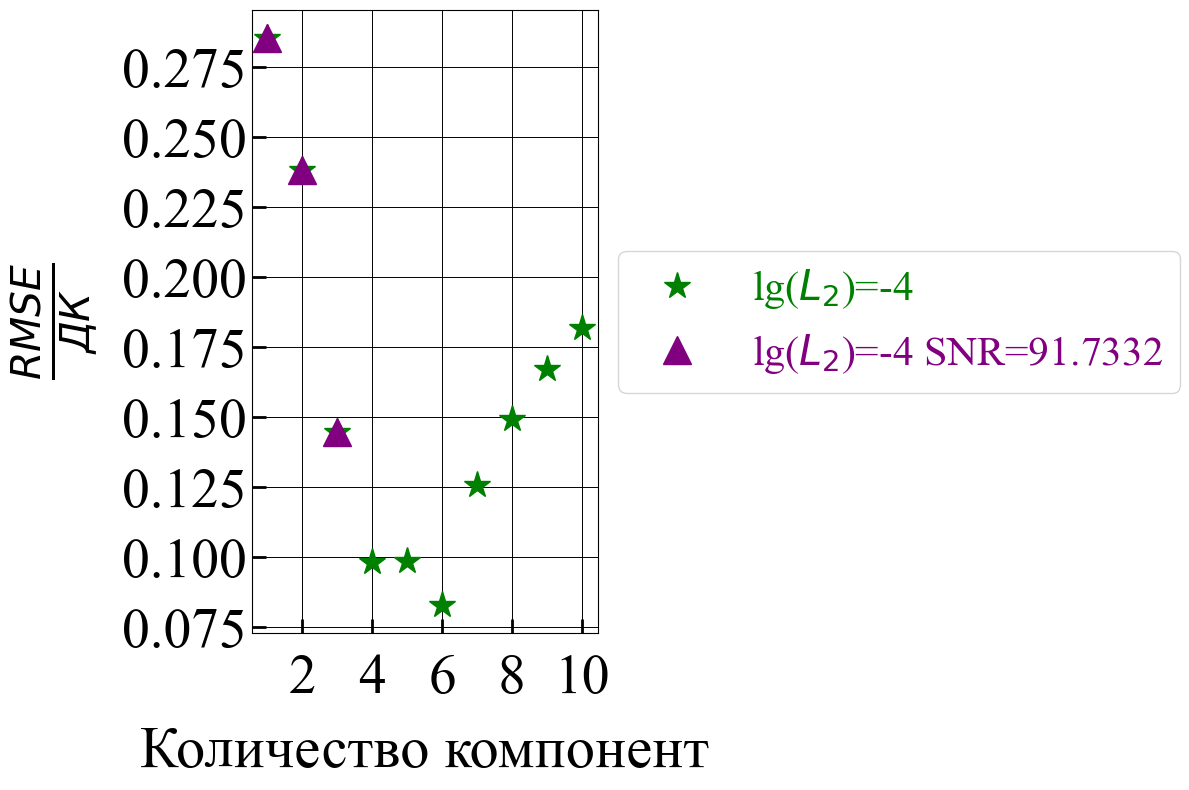

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:133: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:148: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


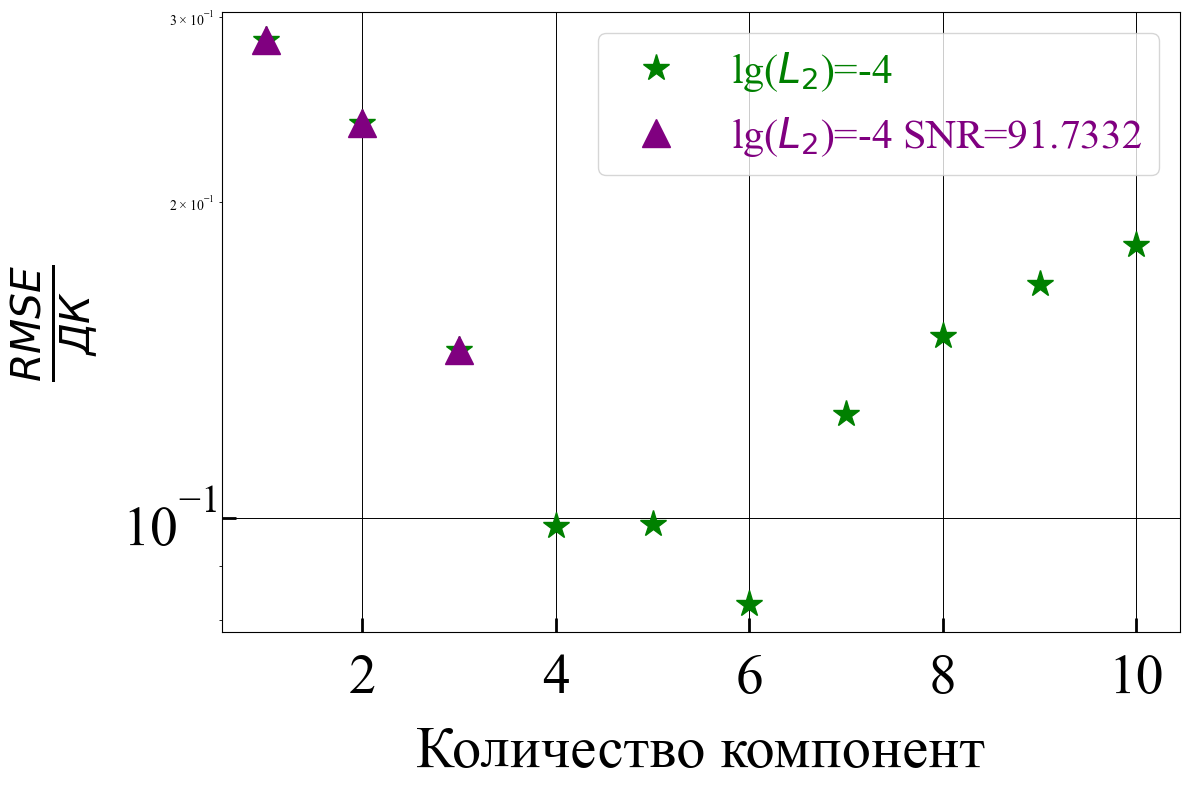

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:133: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:148: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


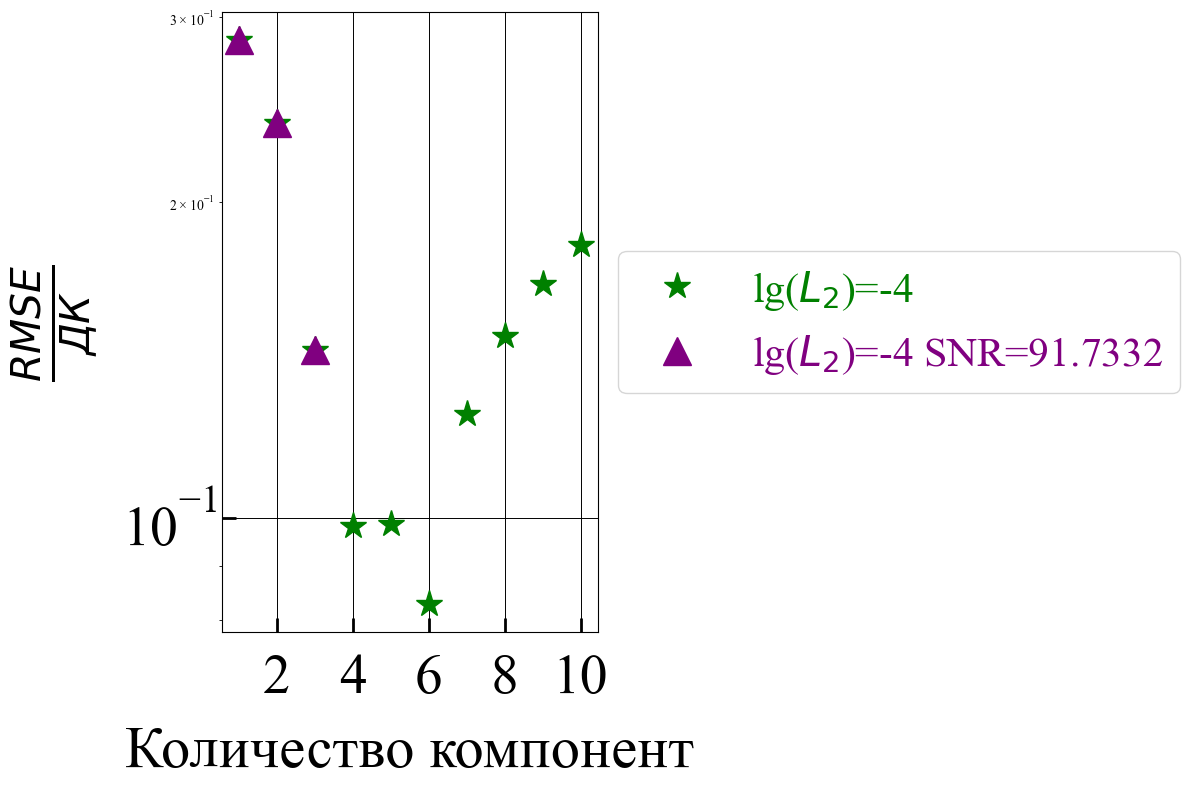

Q2_CV dorrit 3 0.8701274597168102 7 3.0
RMSE_CV  0.01893993282574678
RMSE_P  0.012027668202928396
Q2_P  0.9739892215049095



Q2_CV dorrit 3 0.3903630442784444 4 6.0
RMSE_CV  0.04117846616932312
RMSE_P  0.01772735866615363
Q2_P  0.9434960855482625





/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:133: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:148: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


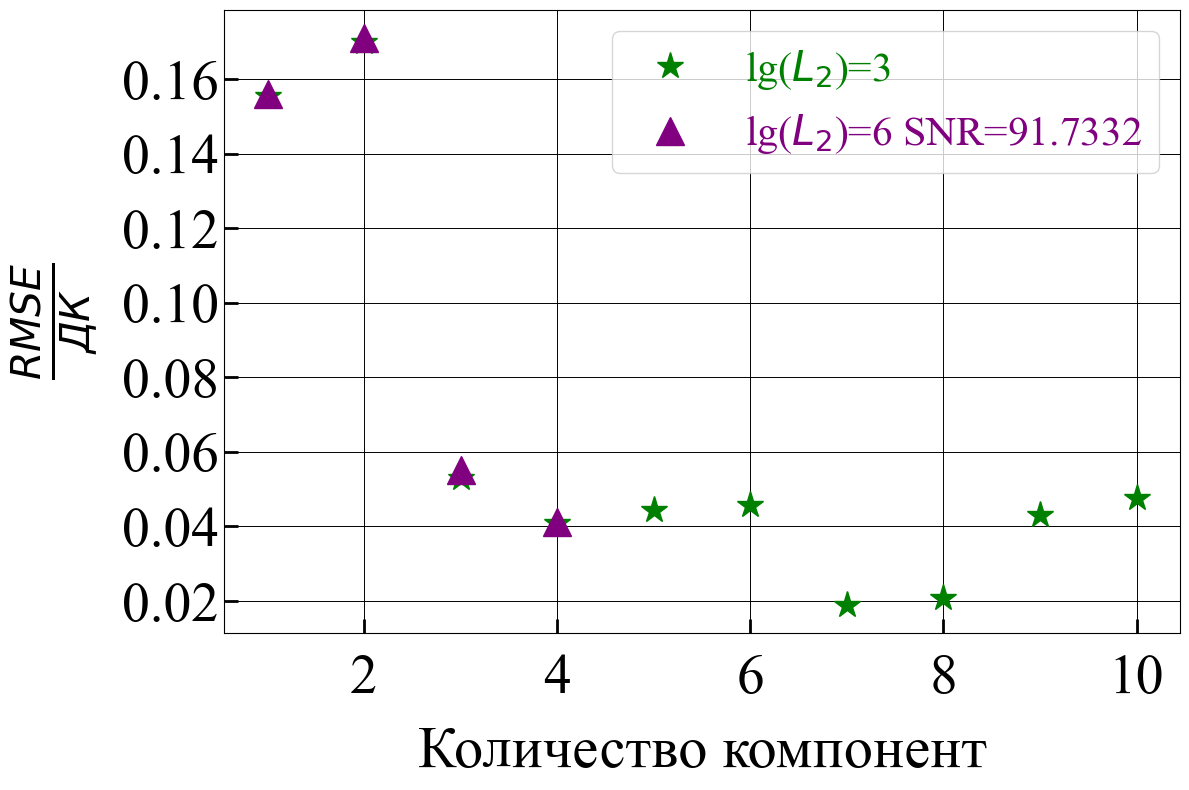

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:133: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:148: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


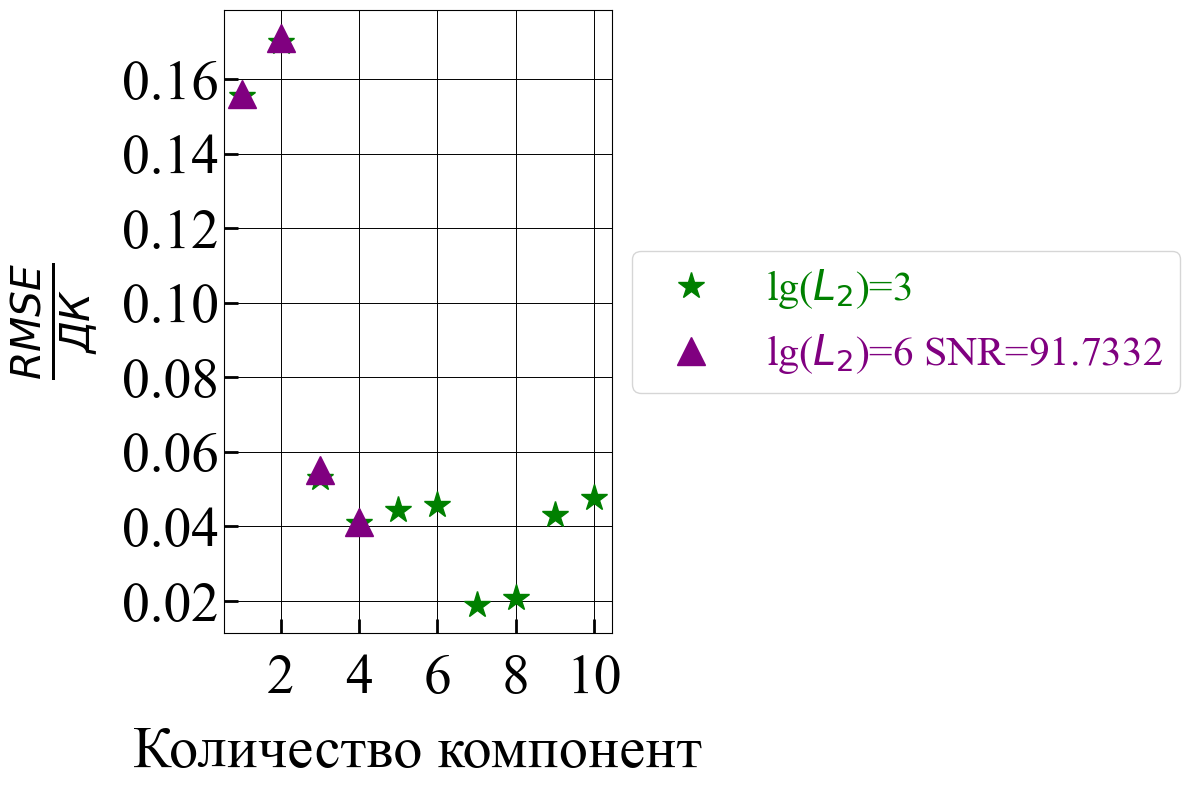

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:133: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:148: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


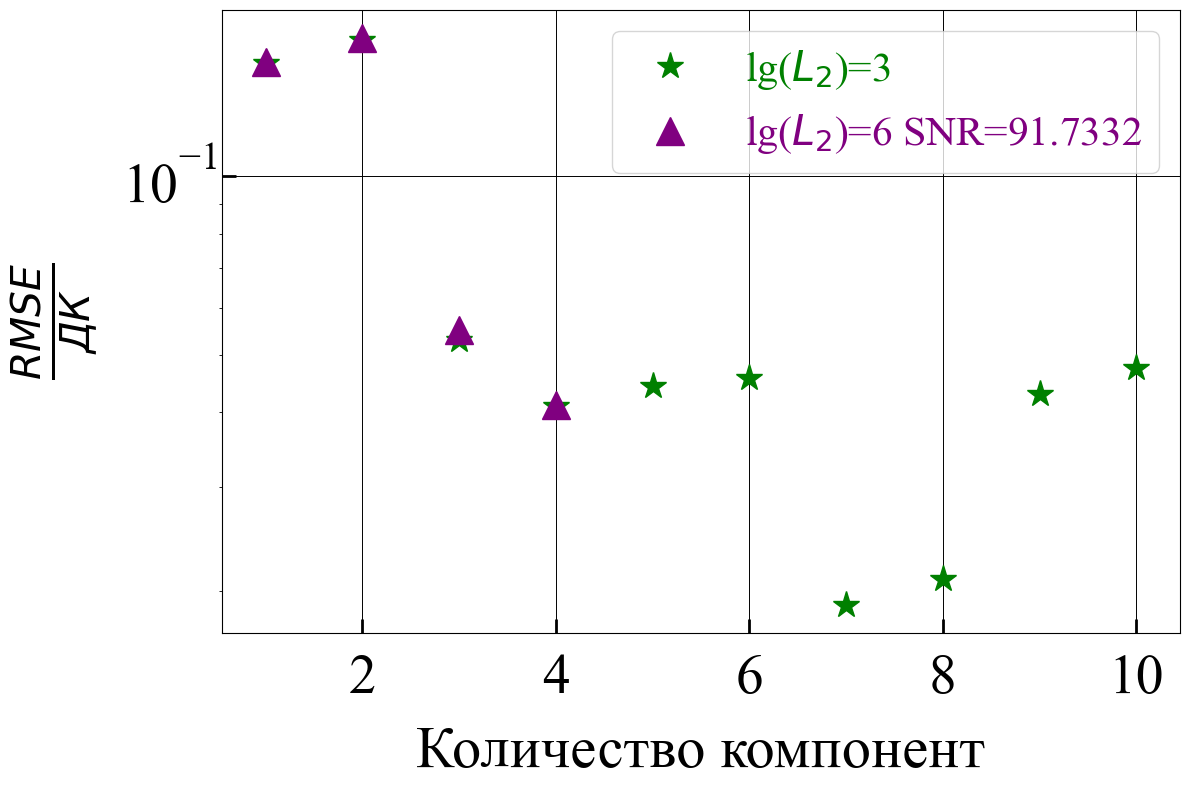

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:133: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:148: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


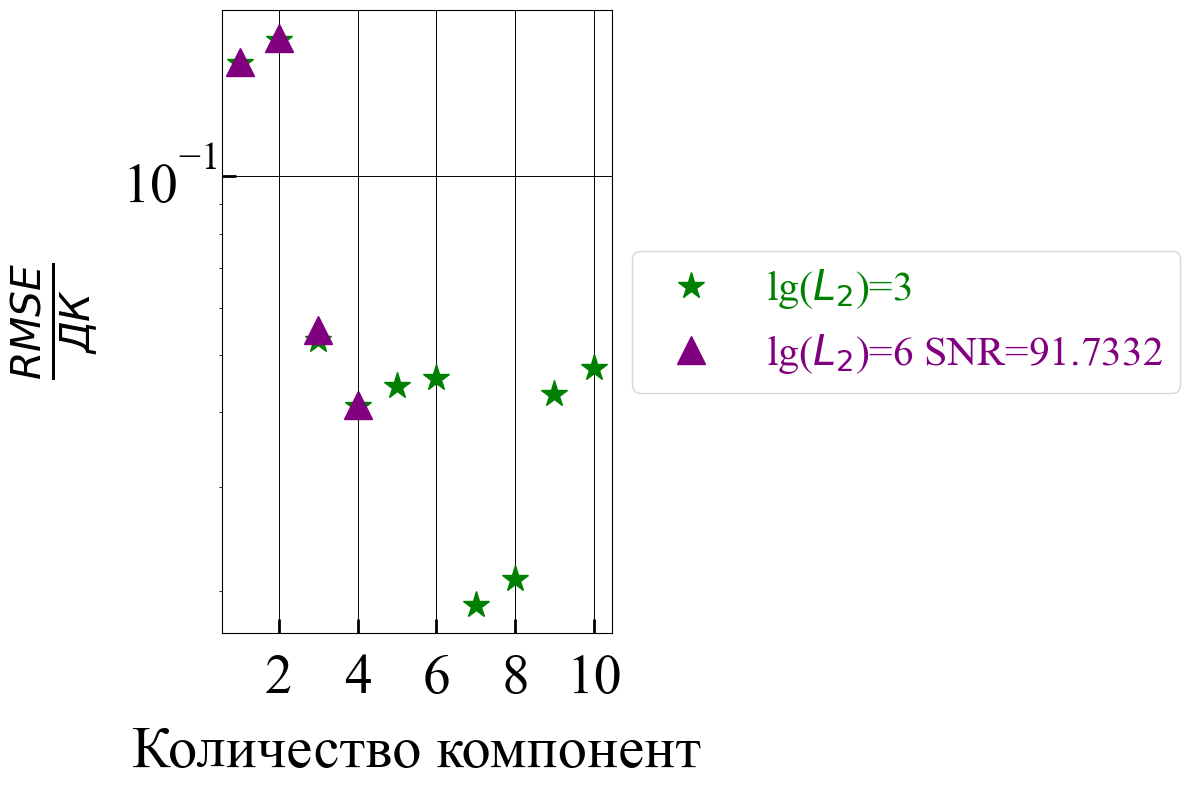

High CPU load detected. Cooling down...
Q2_CV syn 0 1.0 6 -4.0
RMSE_CV  1.1587348210586673e-09
RMSE_P  1.0492291304107082e-09
Q2_P  1.0



Resuming execution.
High CPU load detected. Cooling down...
Resuming execution.
Q2_CV syn 0 1.0 6 -4.0
RMSE_CV  1.1587348210586673e-09
RMSE_P  1.0492291304107082e-09
Q2_P  1.0





/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:133: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:148: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


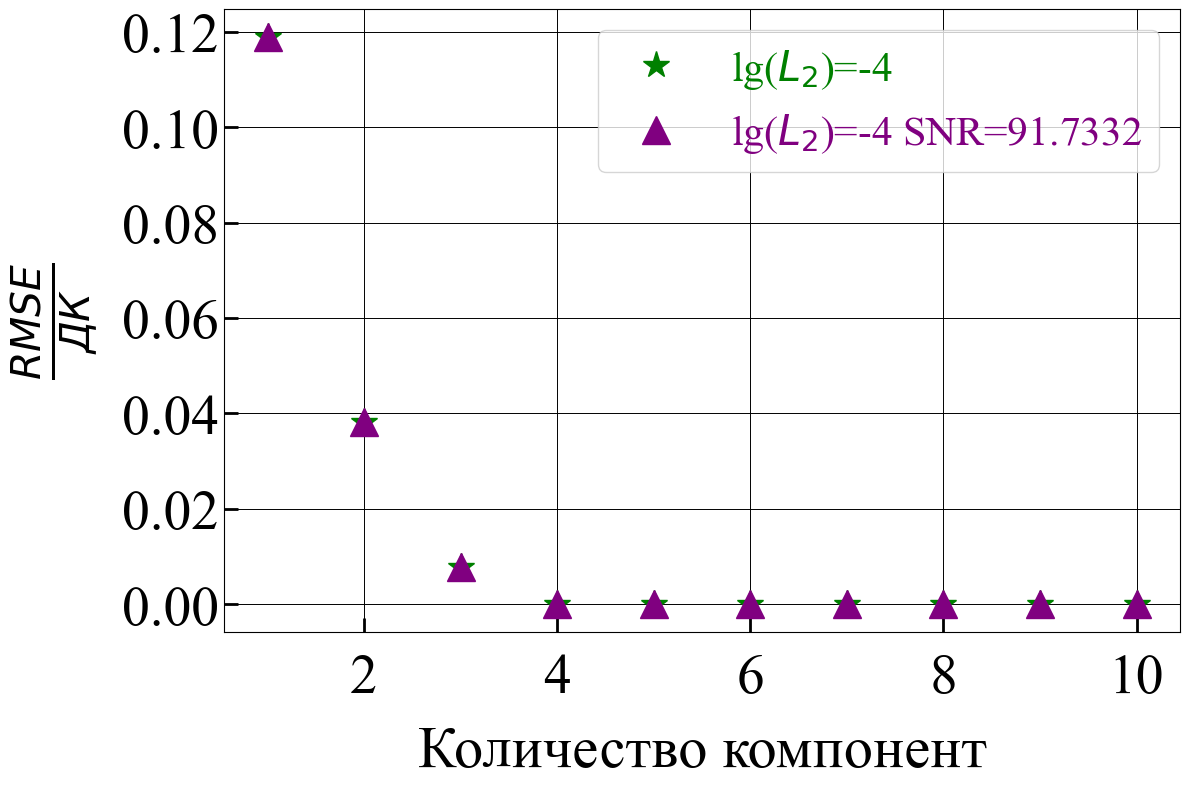

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:133: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:148: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


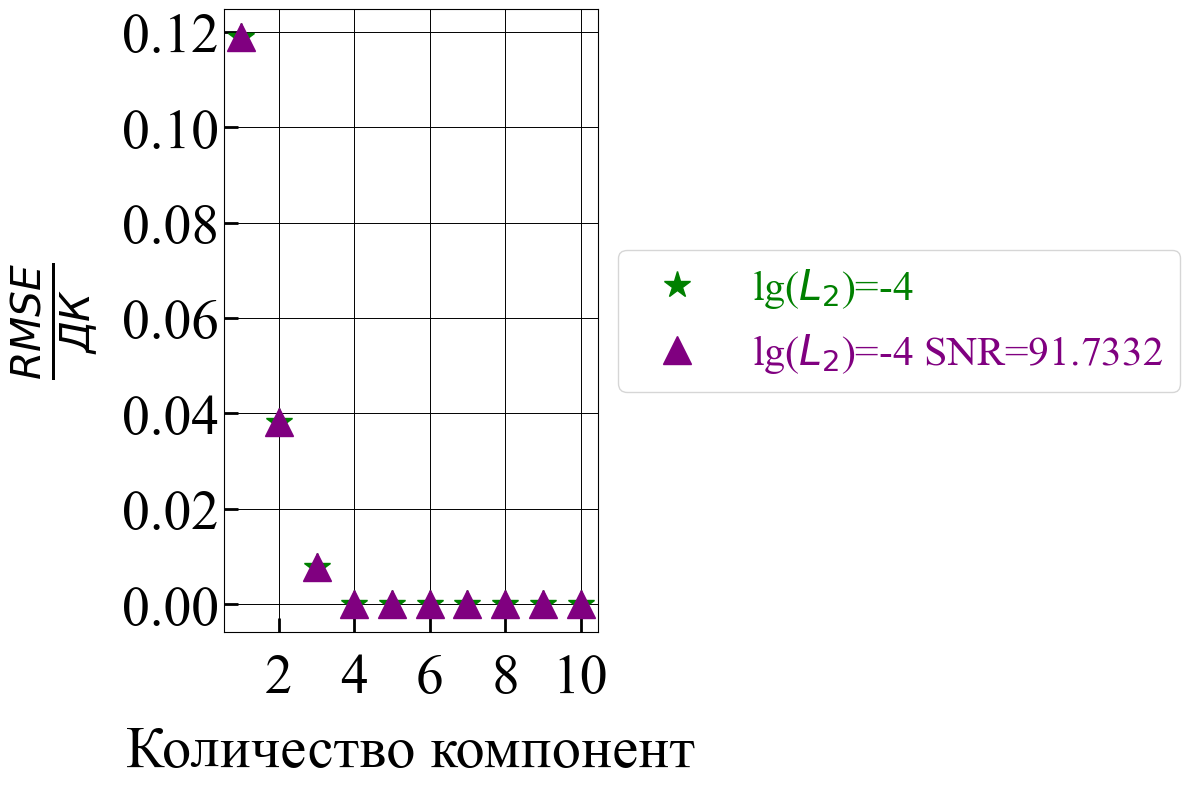

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:133: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:148: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


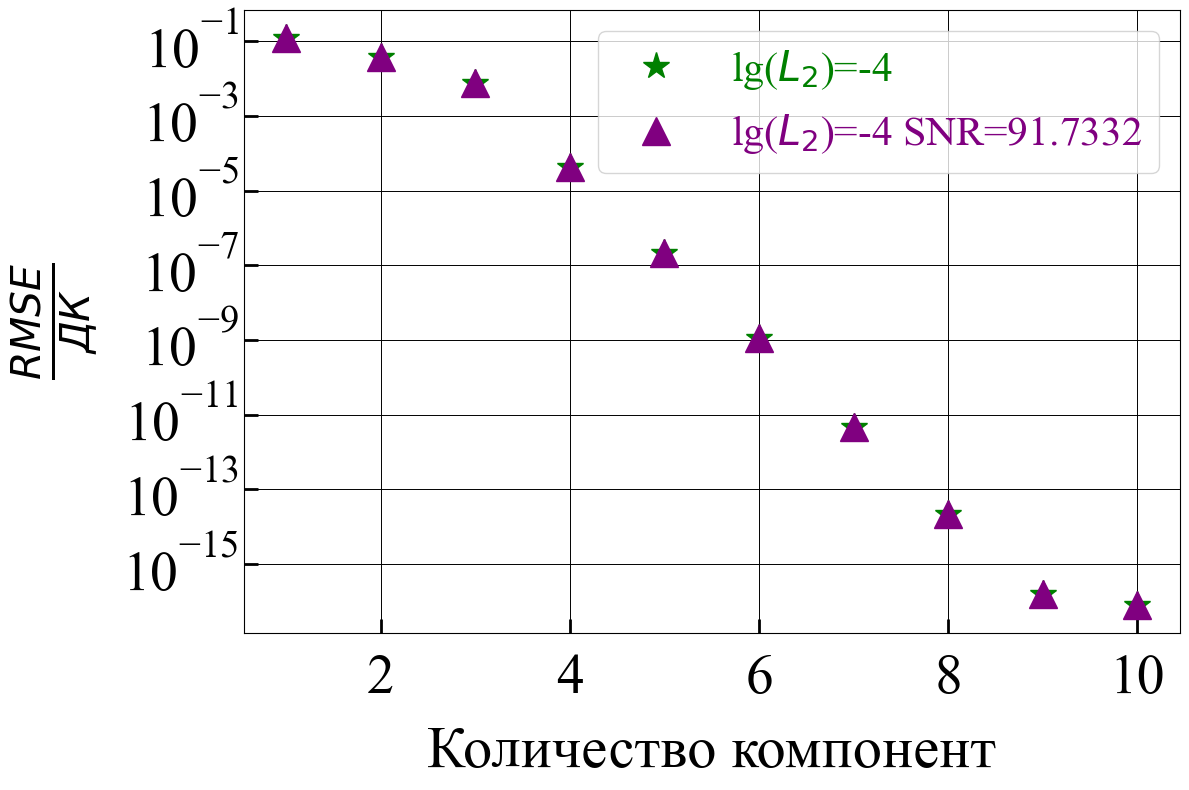

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:133: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:148: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


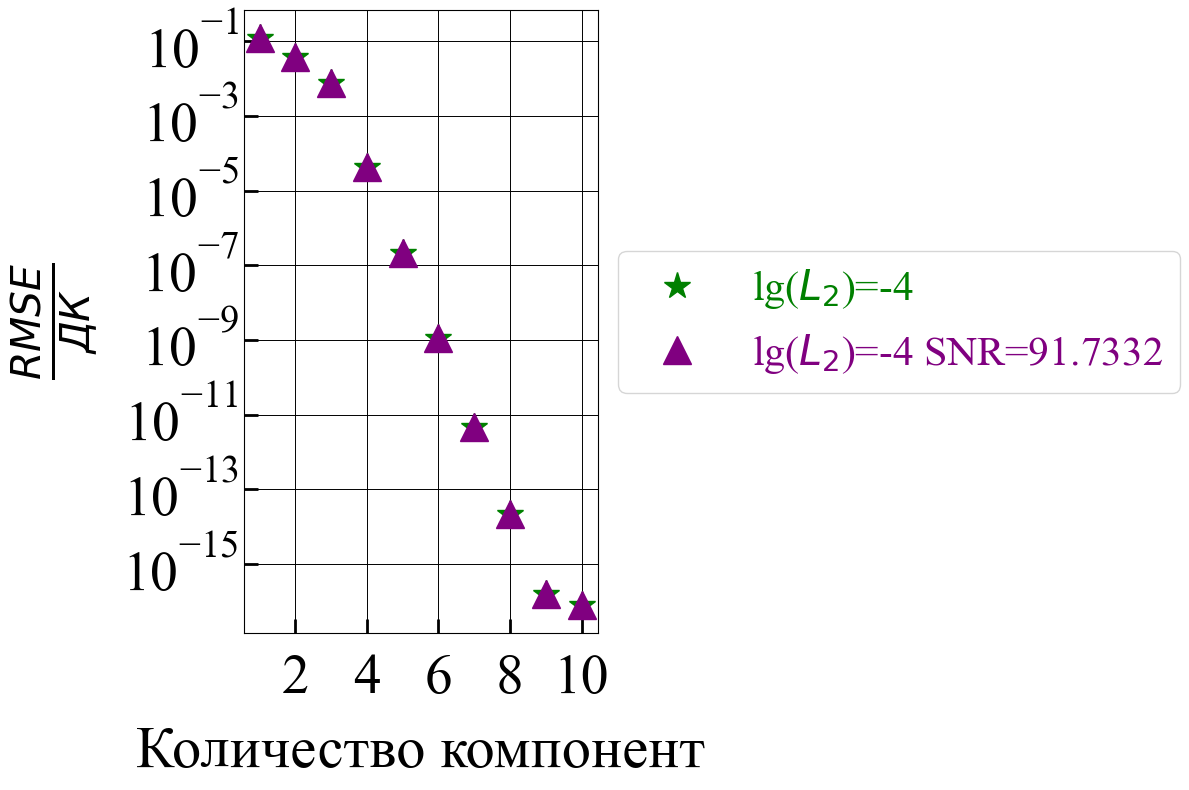

High CPU load detected. Cooling down...
Resuming execution.
Q2_CV syn 1 1.0 9 -5.0
RMSE_CV  7.842187660961401e-10
RMSE_P  1.0071386807740724e-10
Q2_P  1.0



High CPU load detected. Cooling down...
Resuming execution.
Q2_CV syn 1 1.0 5 -2.0
RMSE_CV  7.472336438006296e-11
RMSE_P  2.0362091612224777e-11
Q2_P  1.0





/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:133: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:148: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


High CPU load detected. Cooling down...


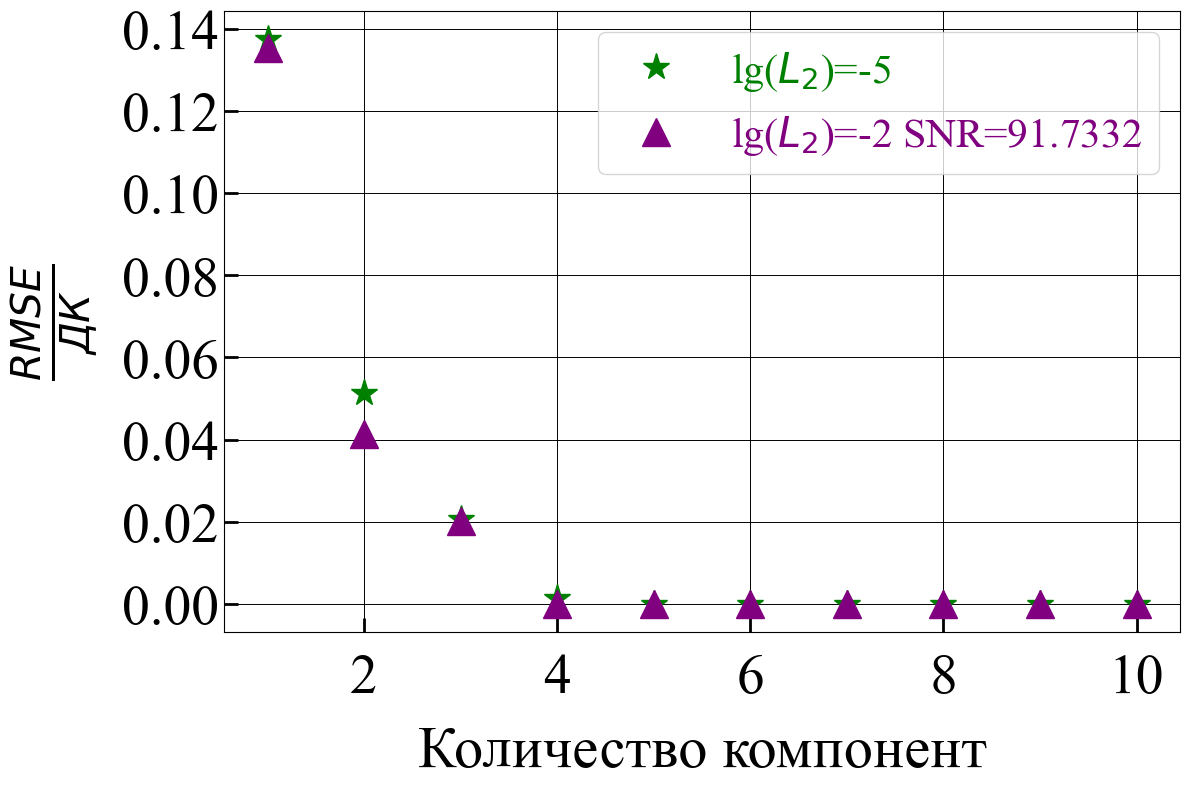

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:133: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:148: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


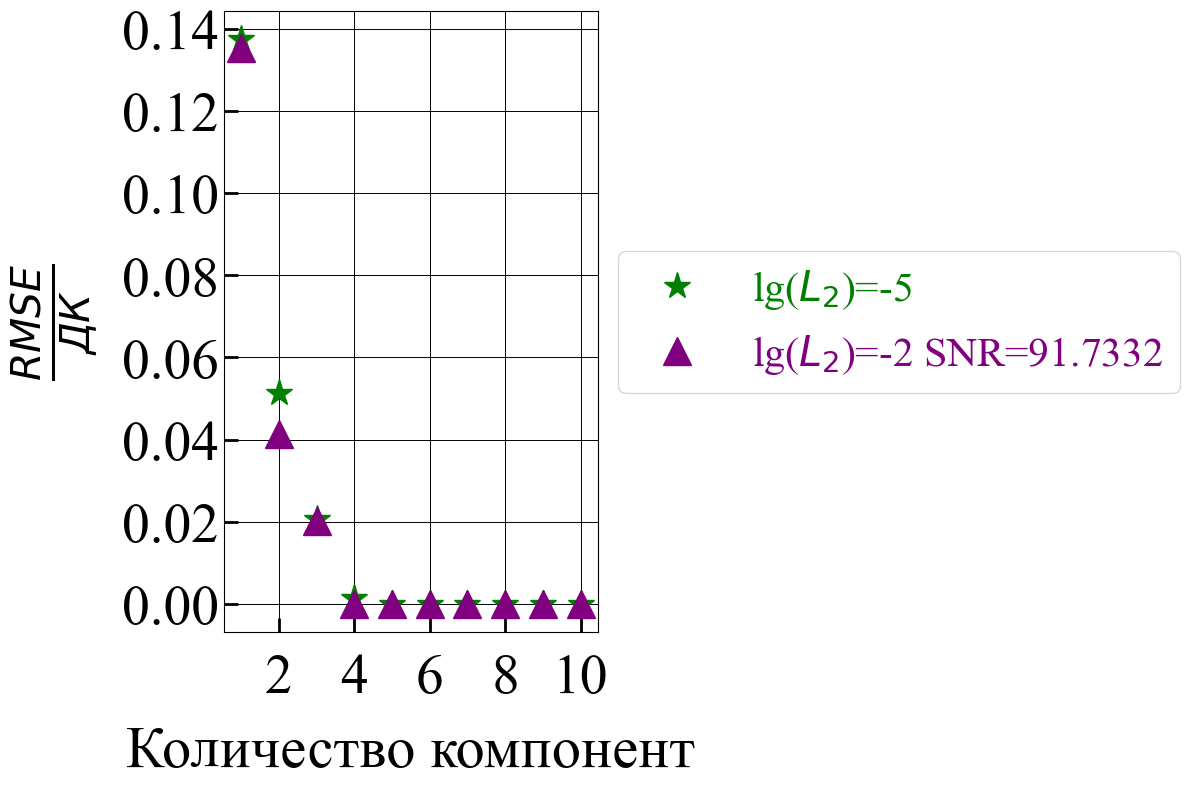

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:133: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:148: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


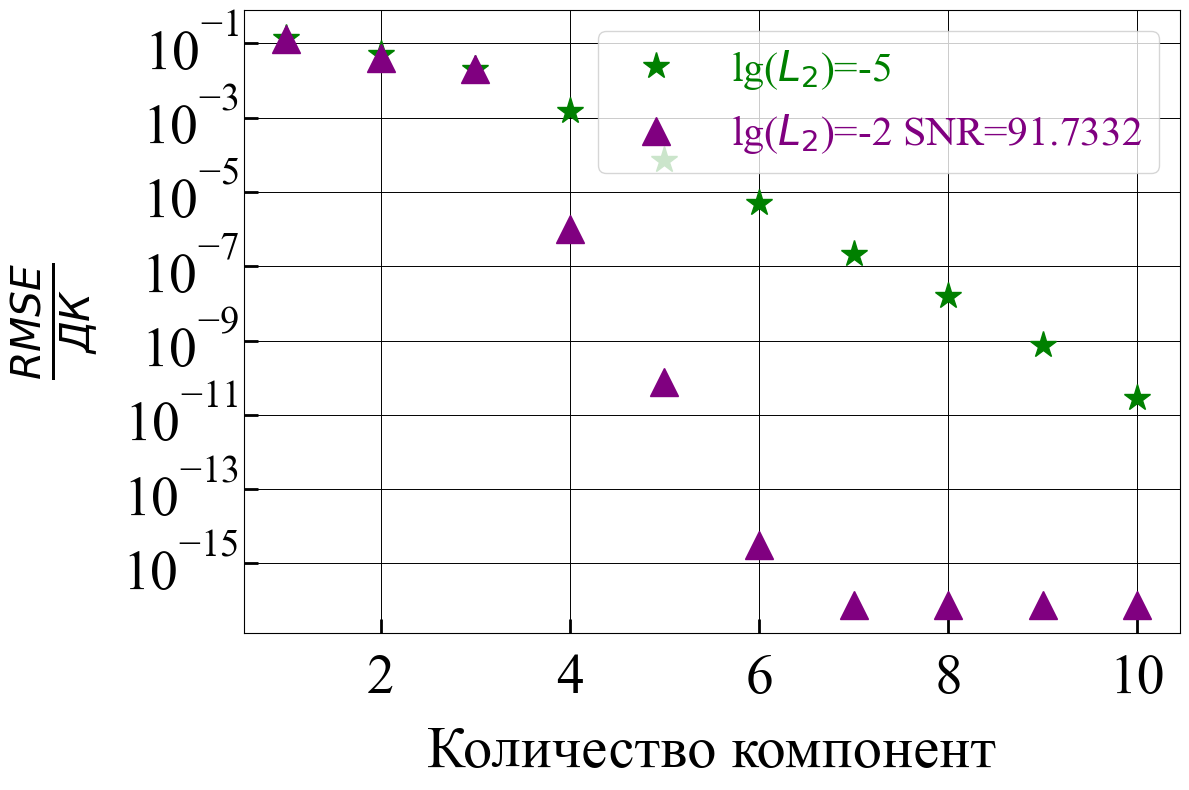

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:133: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:148: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


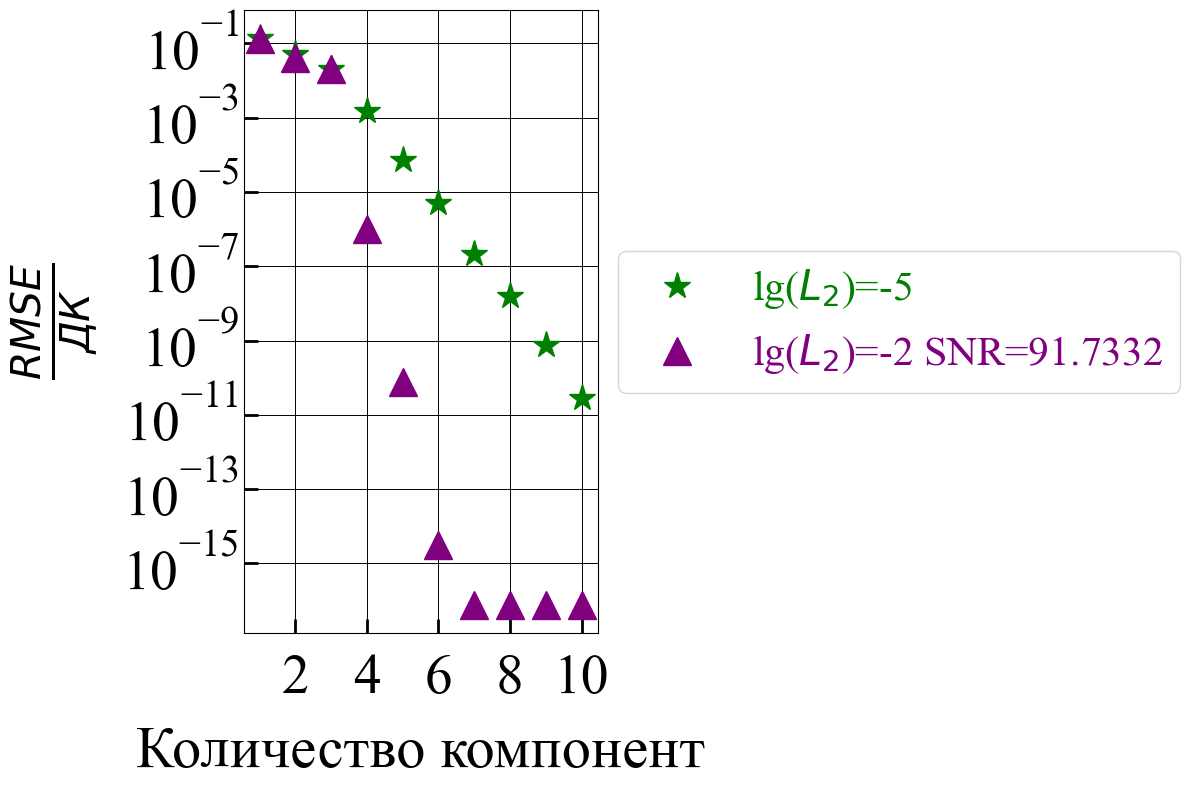

Resuming execution.
High CPU load detected. Cooling down...
Q2_CV syn 2 1.0 6 -4.0
RMSE_CV  2.2361465160508153e-10
RMSE_P  1.0834131630304117e-10
Q2_P  1.0



Resuming execution.
High CPU load detected. Cooling down...
Q2_CV syn 2 1.0 6 -4.0
RMSE_CV  2.2361465160508153e-10
RMSE_P  1.0834131630304117e-10
Q2_P  1.0





/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:133: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:148: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


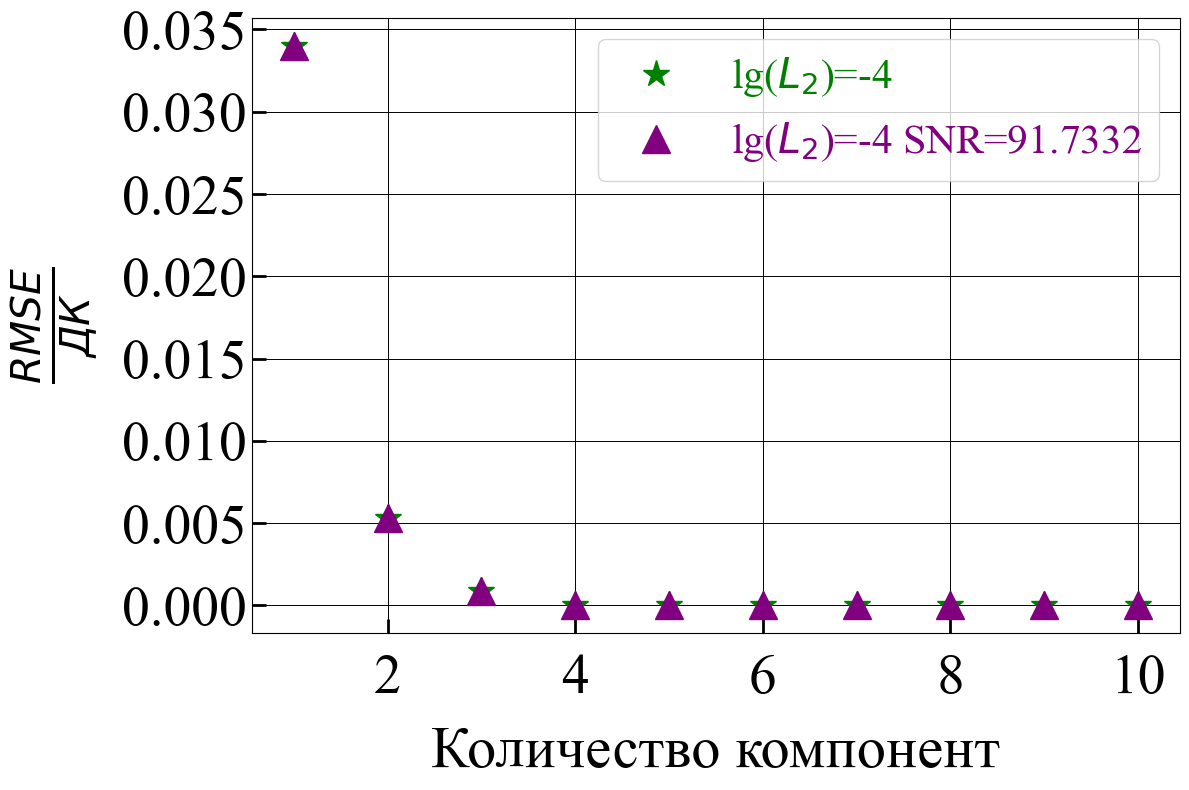

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:133: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:148: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


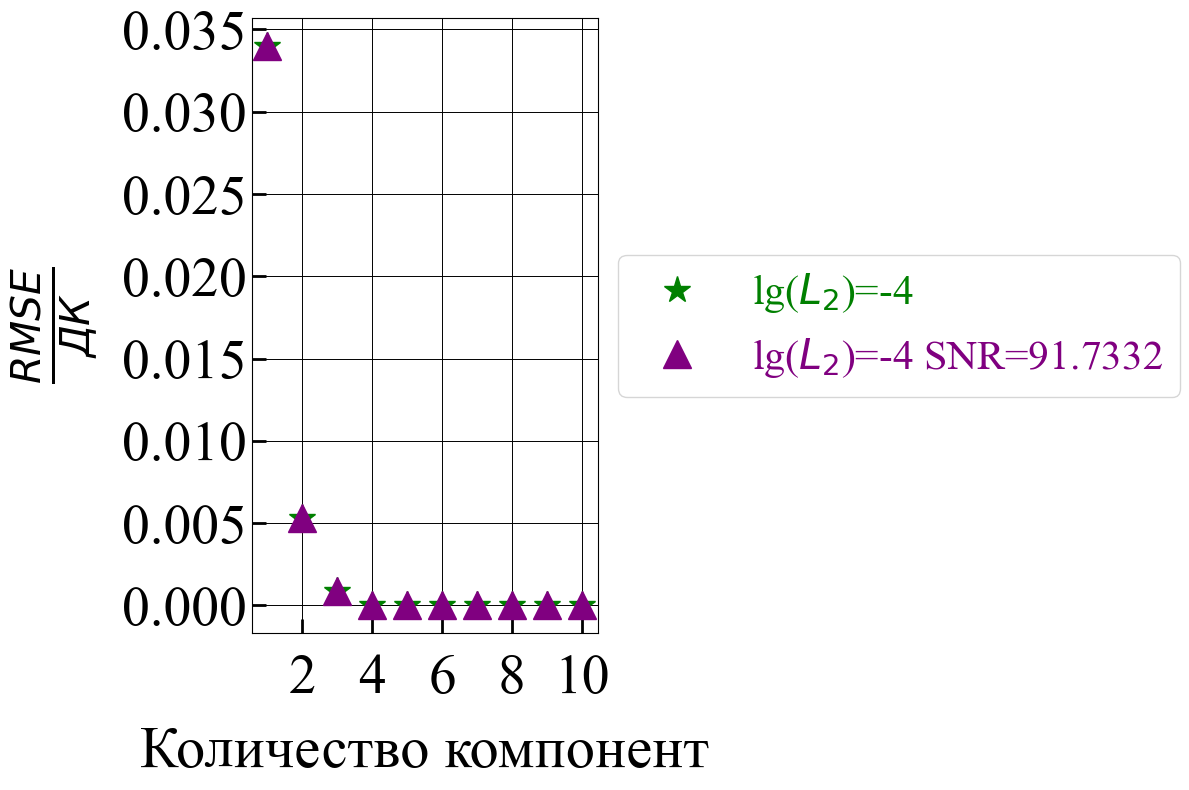

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:133: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:148: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


Resuming execution.


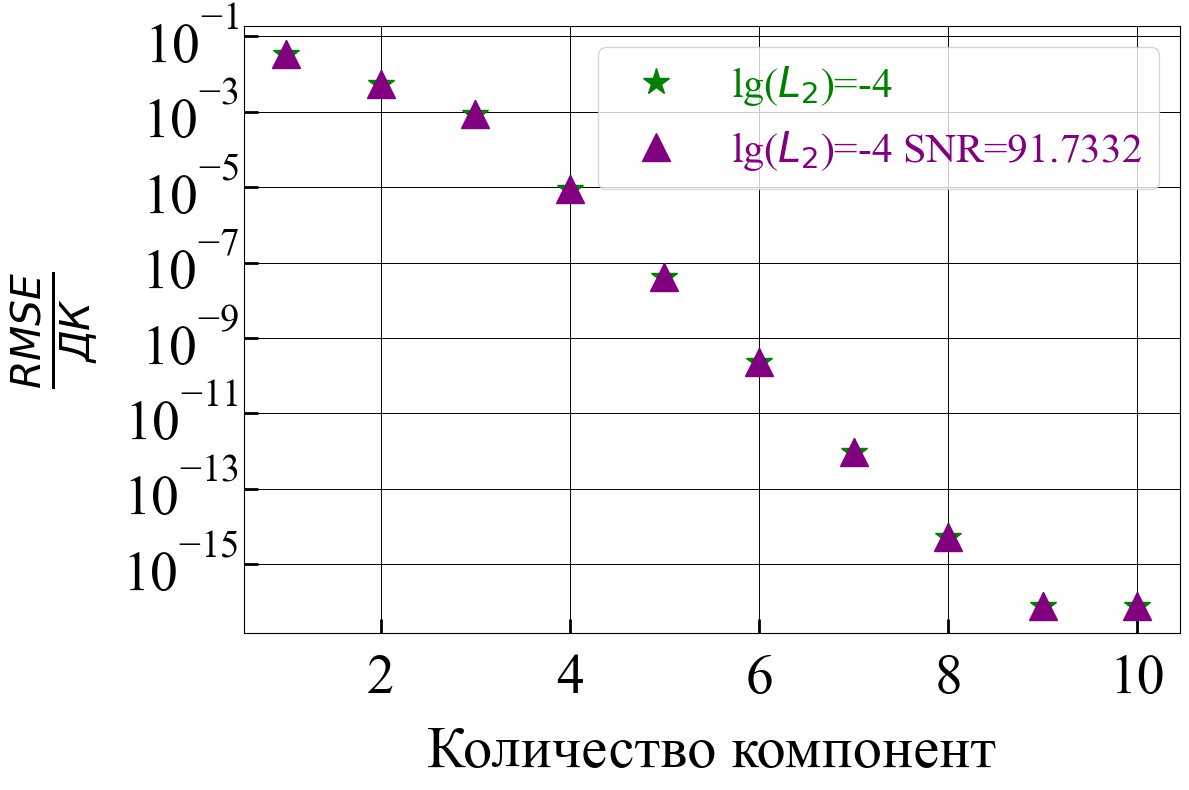

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:133: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:148: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


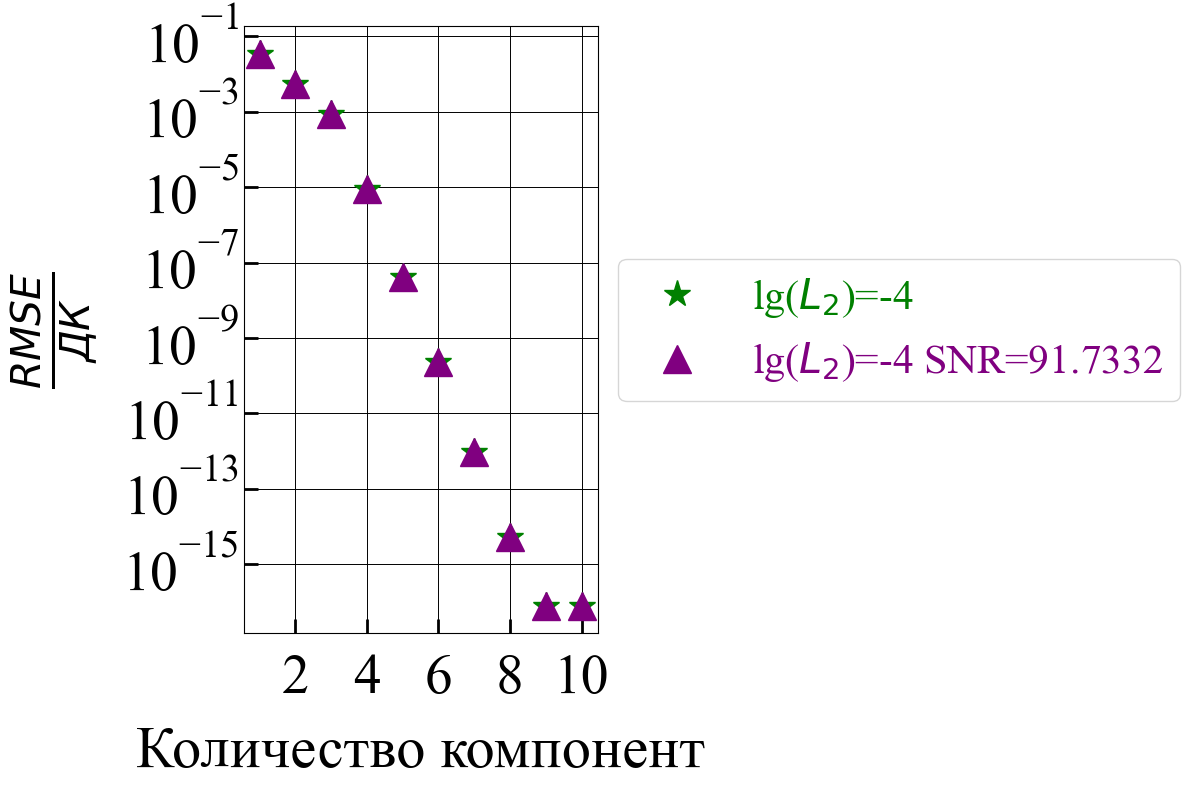

High CPU load detected. Cooling down...
Resuming execution.
Q2_CV syn 3 1.0 4 3.0
RMSE_CV  5.751056547484299e-10
RMSE_P  2.01510017191237e-10
Q2_P  1.0



High CPU load detected. Cooling down...
Resuming execution.
Q2_CV syn 3 1.0 5 6.0
RMSE_CV  1.3406037450630732e-10
RMSE_P  3.002329149083597e-11
Q2_P  1.0





/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:133: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:148: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


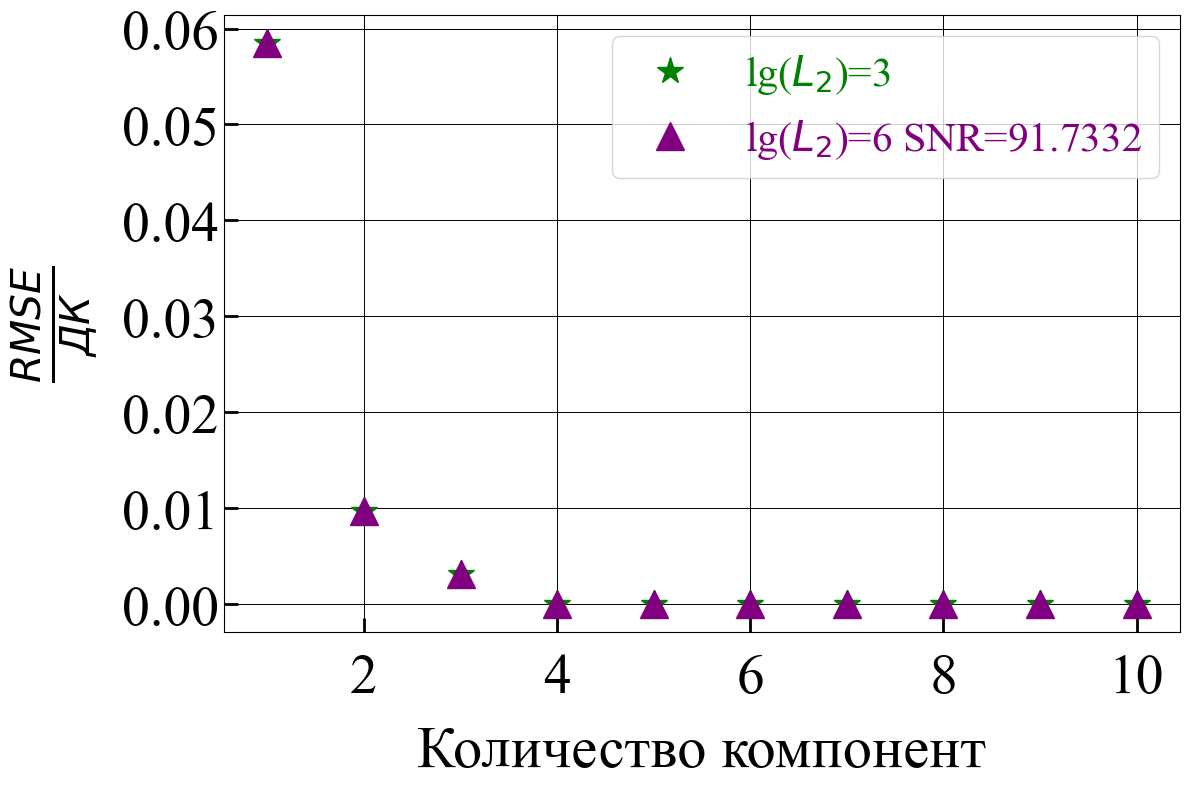

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:133: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:148: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


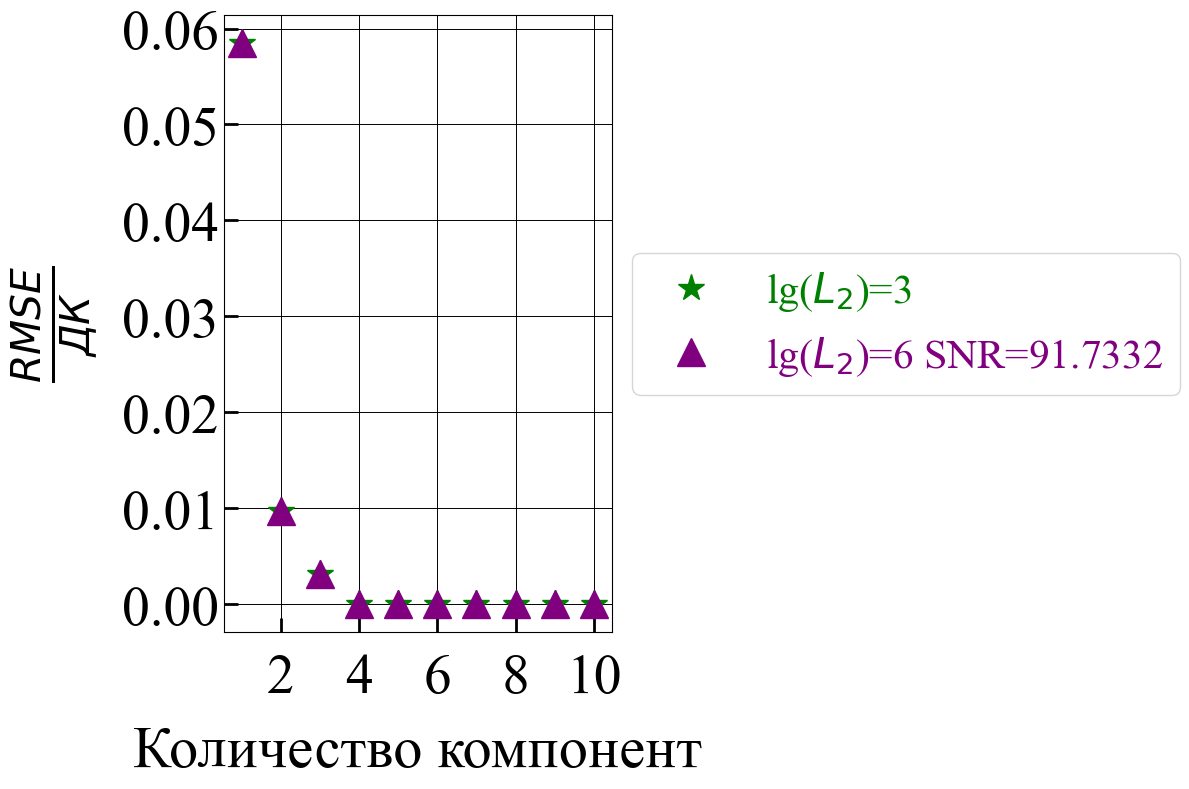

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:133: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:148: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


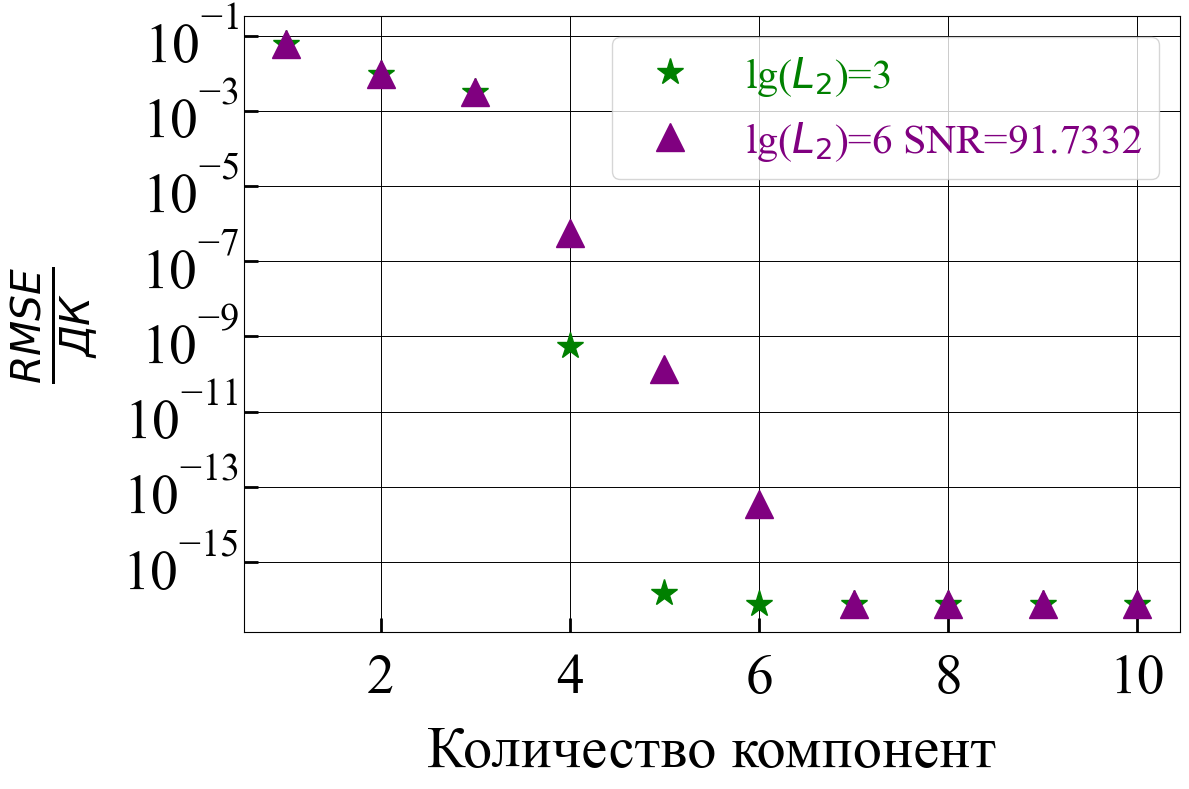

/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_xticklabels(self.ax.get_xticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:133: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(self.ax.get_yticklabels(), fontsize=self.ax_label_number_font)
/home/ferubkomsu/Рабочий стол/new_n_pls/paint_scripts/rmse_plot.py:148: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=5,w_pad=5)


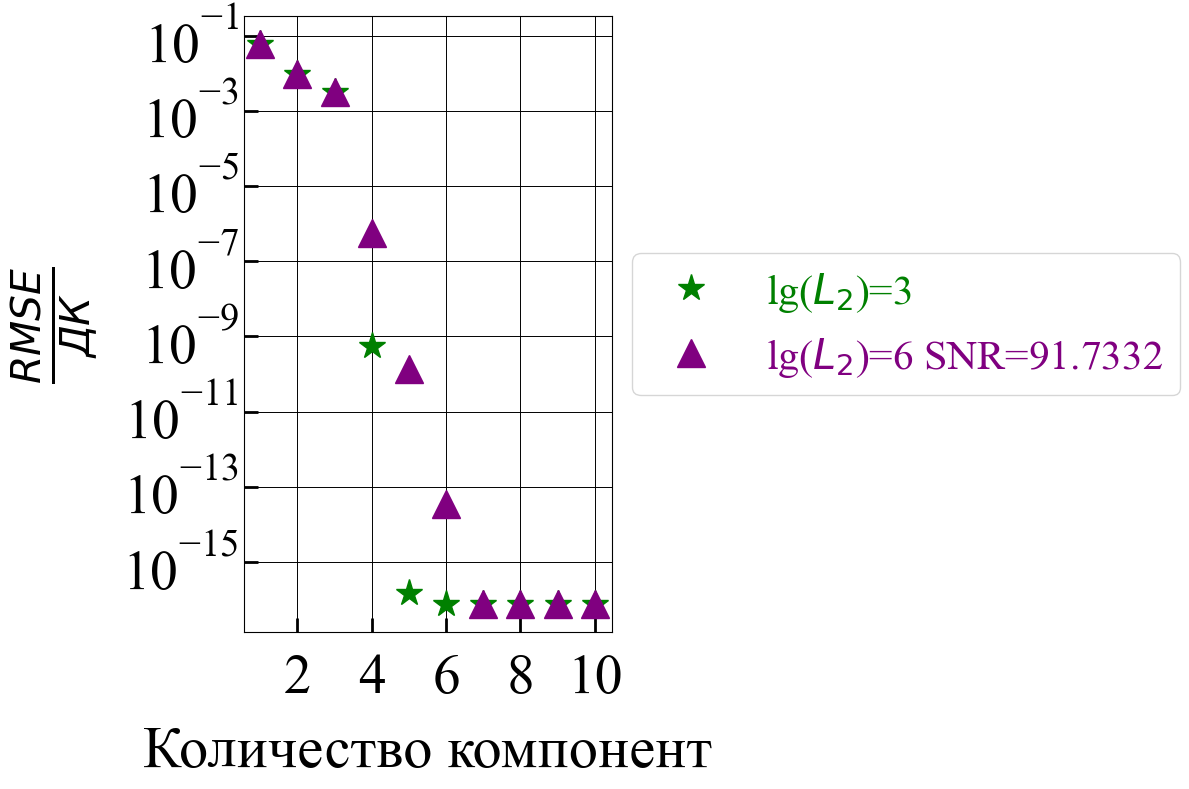

KeyboardInterrupt: 

In [13]:
calculation_thread = threading.Thread(target=calculate3)
calculation_thread.start()


monitor()